In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [3]:
approved_df = pd.read_csv('https://raw.githubusercontent.com/AndreasPetrou/UCL_dissertation.github.io/main/TA-cancer-recommendations.csv')
world_trials = pd.read_csv('https://www.dropbox.com/scl/fi/16p9f92b9sxwyenvb37aj/all_countries_20.csv?rlkey=195nkhqonc9ufxahpbz2s3iwe&dl=1')
world_trials_results_dummy = pd.read_csv('https://www.dropbox.com/scl/fi/t54fq8nm67dkymuh3tt6c/uk_results.csv?rlkey=3uyu3ak4tqjl37fz1pmq51vvb&dl=1')
interventions = pd.read_csv('https://www.dropbox.com/scl/fi/61azua3h4gpf0buh16zvm/interventions.csv?rlkey=rp5w07cwzhl27sdcoqk26dmez&dl=1')
countries = pd.read_csv('https://www.dropbox.com/scl/fi/bysv5hg5t2ia69suzxjo1/countries.csv?rlkey=uu3mm228whu7xjz28684jbw6g&dl=1')
baseline = pd.read_csv('https://www.dropbox.com/scl/fi/2thduro77e68h1uiw4ugo/baseline_measurements.csv?rlkey=gxafeel0gdz9yr8h6sd1kntib&dl=1')

/tmp/ipykernel_268/3791590101.py:2: DtypeWarning: Columns (53,68) have mixed types. Specify dtype option on import or set low_memory=False.
  world_trials = pd.read_csv('https://www.dropbox.com/scl/fi/16p9f92b9sxwyenvb37aj/all_countries_20.csv?rlkey=195nkhqonc9ufxahpbz2s3iwe&dl=1')
/tmp/ipykernel_268/3791590101.py:6: DtypeWarning: Columns (10,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  baseline = pd.read_csv('https://www.dropbox.com/scl/fi/2thduro77e68h1uiw4ugo/baseline_measurements.csv?rlkey=gxafeel0gdz9yr8h6sd1kntib&dl=1')


# World Trials dataframe

In [4]:
world_trials_results_dummy.head()

,Unnamed: 0,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results
0,0,NCT04311983,2020-03-31,Interventions to Help More Low-income Smokers ...,Expanding Population-level Interventions to He...,"Active, not recruiting",Not Applicable,1982.0,Actual,2.0,0
1,1,NCT04841135,2021-06-03,Blood Microbiota Signature of Alzheimer's Disease,Analysis of the Blood Signature of the Microbi...,Recruiting,Not Applicable,120.0,Anticipated,3.0,0
2,2,NCT03228355,2017-05-24,Headache Inducing Effect of Cromakalim in Migr...,The Effects of Levcromakalim on Cerebral Hemod...,Completed,Not Applicable,16.0,Actual,2.0,0
3,3,NCT05021289,2021-02-01,Guided Imagery on the Perceived Stress Level i...,Effect of the Practice of Guided Imagery on th...,Completed,Not Applicable,128.0,Actual,2.0,0
4,4,NCT03228277,2017-07-17,Olmutinib Trial in T790M (+) NSCLC Patients De...,"Phase II, Multicenter, Single-arm, Open-label ...",Completed,Phase 2,25.0,Actual,1.0,0


In [5]:
world_trials_results_dummy.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
world_trials.head()

,nct_id,nlm_download_date_description,study_first_submitted_date,results_first_submitted_date,disposition_first_submitted_date,last_update_submitted_date,study_first_submitted_qc_date,study_first_posted_date,study_first_posted_date_type,results_first_submitted_qc_date,...,plan_to_share_ipd,plan_to_share_ipd_description,created_at,updated_at,source_class,delayed_posting,expanded_access_nctid,expanded_access_status_for_nctid,fdaaa801_violation,baseline_type_units_analyzed
0,NCT04311983,NaN,2020-03-10,NaN,NaN,2023-02-21,2020-03-16,2020-03-17,Actual,NaN,...,Yes,The HCRL Data Center will make the datasets an...,2023-05-30 00:49:23.56095,2023-05-30 00:49:23.56095,OTHER,NaN,NaN,NaN,NaN,NaN
1,NCT04841135,NaN,2021-04-08,NaN,NaN,2023-04-18,2021-04-08,2021-04-12,Actual,NaN,...,NaN,NaN,2023-05-30 00:49:24.204439,2023-05-30 00:49:24.204439,OTHER,NaN,NaN,NaN,NaN,NaN
2,NCT03228355,NaN,2017-07-08,NaN,NaN,2018-06-18,2017-07-21,2017-07-24,Actual,NaN,...,Undecided,NaN,2023-05-29 01:34:59.555663,2023-05-29 01:34:59.555663,OTHER,NaN,NaN,NaN,NaN,NaN
3,NCT05021289,NaN,2021-08-18,NaN,NaN,2021-08-25,2021-08-23,2021-08-25,Actual,NaN,...,No,NaN,2023-05-29 01:35:01.096183,2023-05-29 01:35:01.096183,OTHER,NaN,NaN,NaN,NaN,NaN
4,NCT03228277,NaN,2017-07-17,NaN,NaN,2019-08-25,2017-07-20,2017-07-24,Actual,NaN,...,No,NaN,2023-05-29 01:35:01.729592,2023-05-29 01:35:01.729592,OTHER,NaN,NaN,NaN,NaN,NaN


In [7]:
nct_id_list = world_trials['nct_id'].tolist()

In [8]:
world_trials.nct_id.nunique()

322824

# Intevretions dataframe

In [9]:
interventions.head()

,id,nct_id,intervention_type,name,description
0,41203722,NCT01578434,Drug,Vitamin D,Vitamin D: 6 lakh IU single im dose Calcium: 7...
1,41203723,NCT01578434,Drug,Calcium Carbonate,Calcium: 75 mg/kg calcium daily for 3 months
2,41203724,NCT01578434,Drug,Vitamin D and Calcium,Vitamin D: 6 lakh IU single im dose. along wit...
3,40903586,NCT03663959,Procedure,Laparoscopic Pectocolpopexy procedure,"First, the peritoneal layer above and lateral ..."
4,40903587,NCT02836574,Biological,Renal Autologous Cell Therapy (REACT),Autologous selected renal cells (SRC).


In [10]:
filtered_interventions = interventions[interventions['nct_id'].isin(nct_id_list)]

In [11]:
filtered_interventions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636561 entries, 0 to 771641
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 636561 non-null  int64 
 1   nct_id             636561 non-null  object
 2   intervention_type  636561 non-null  object
 3   name               636559 non-null  object
 4   description        571675 non-null  object
dtypes: int64(1), object(4)
memory usage: 29.1+ MB


In [12]:
filtered_interventions.nct_id.nunique()

322824

In [13]:
filtered_interventions['name'] = filtered_interventions['name'].str.lower()

/tmp/ipykernel_268/4024314354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_interventions['name'] = filtered_interventions['name'].str.lower()


In [14]:
# keep only the trials that have reported race/ethnicity to create a dataframe including only those.
race_df = baseline[baseline['title'].str.contains(r'Race|Ethnicity', case=True, regex=True)]

# exclude rows that have 'median' and 'mean' in param_type column
race_df = race_df[race_df['param_type'].isin(['Count of Participants', 'Count of Units', 'Number'])]

race_df = race_df.iloc[:, [1,5,6,8,9,10]]

race_df.head()

,nct_id,category,title,units,param_type,param_value
13,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0
14,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0
15,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,1.0
16,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0
17,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0


In [15]:
race_df.category.isna().sum()

race_df.nct_id.nunique()

race_df = race_df.dropna(subset=['category'])

race_df.nct_id.nunique()

110890

31593

22932

In [16]:
race_df.head()

,nct_id,category,title,units,param_type,param_value
13,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0
14,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0
15,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,1.0
16,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0
17,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0


# Approved drugs dataframe

In [17]:
approved_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Rec no.                                       494 non-null    int64 
 1   TA ID                                         494 non-null    object
 2   Year of Publication                           494 non-null    object
 3   Process                                       494 non-null    object
 4   Technology                                    494 non-null    object
 5   Technology type                               494 non-null    object
 6   Indication                                    494 non-null    object
 7   Categorisation (for specific recommendation)  494 non-null    object
 8   Comment                                       494 non-null    object
dtypes: int64(1), object(8)
memory usage: 34.9+ KB


In [18]:
approved_df["Categorisation (for specific recommendation)"].value_counts()

Recommended                              208
Optimised                                 76
Terminated Appraisal - non submission     63
Not Recommended                           42
Not recommended                           42
Recommended (CDF)                         42
Optimised (CDF)                           11
Only in Research                           9
Terminated appraisal - non submission      1
Name: Categorisation (for specific recommendation), dtype: int64

In [19]:
desired_inputs = ['Recommended', 'Optimised', 'Recommended (CDF)', 'Optimised (CDF)']
approved_df = approved_df[approved_df['Categorisation (for specific recommendation)'].isin(desired_inputs)]

In [20]:
approved_df['Year of Publication'] = approved_df['Year of Publication'].astype(str).str[:4]

In [21]:
approved_df.head()

,Rec no.,TA ID,Year of Publication,Process,Technology,Technology type,Indication,Categorisation (for specific recommendation),Comment
0,3,TA003,2000,MTA,Paclitaxel,Pharmaceutical,Ovarian cancer,Recommended,Guidance has been replaced by TA55. Recommenda...
2,6,TA006,2000,MTA,Docetaxel,Pharmaceutical,Advanced breast cancer,Recommended,Guidance has been replaced by TA30. Recommenda...
3,7,TA006,2000,MTA,Paclitaxel,Pharmaceutical,Advanced breast cancer,Recommended,Guidance has been replaced by TA30. Recommenda...
5,35,TA023,2001,MTA,Temozolomide,Pharmaceutical,Brain cancer (recurrent),Recommended,Recommendation in line with marketing authoris...
6,42,TA025,2001,MTA,Gemcitabine (1st line),Pharmaceutical,Pancreatic cancer,Recommended,Recommended in line with clinical practice.


In [22]:
# Convert 'year of publication' column to datetime
approved_df['Year of Publication'] = pd.to_datetime(approved_df['Year of Publication'], format='%Y')

# Extract the year
approved_df['year'] = approved_df['Year of Publication'].dt.year

In [23]:
# Assuming the column name is 'column_name'
duplicates = approved_df.duplicated(subset=['Technology'], keep=False)

# Filter the dataframe to show only the duplicate rows
duplicate_rows = approved_df[duplicates]

In [24]:
duplicate_rows.head()

,Rec no.,TA ID,Year of Publication,Process,Technology,Technology type,Indication,Categorisation (for specific recommendation),Comment,year
0,3,TA003,2000-01-01,MTA,Paclitaxel,Pharmaceutical,Ovarian cancer,Recommended,Guidance has been replaced by TA55. Recommenda...,2000
2,6,TA006,2000-01-01,MTA,Docetaxel,Pharmaceutical,Advanced breast cancer,Recommended,Guidance has been replaced by TA30. Recommenda...,2000
3,7,TA006,2000-01-01,MTA,Paclitaxel,Pharmaceutical,Advanced breast cancer,Recommended,Guidance has been replaced by TA30. Recommenda...,2000
5,35,TA023,2001-01-01,MTA,Temozolomide,Pharmaceutical,Brain cancer (recurrent),Recommended,Recommendation in line with marketing authoris...,2001
6,42,TA025,2001-01-01,MTA,Gemcitabine (1st line),Pharmaceutical,Pancreatic cancer,Recommended,Recommended in line with clinical practice.,2001


## Creating yearly dataframes

In [25]:
approved_df['year'].describe()

count     337.000000
mean     2015.320475
std         6.188841
min      2000.000000
25%      2012.000000
50%      2017.000000
75%      2020.000000
max      2022.000000
Name: year, dtype: float64

In [26]:
# Get unique years
unique_years = approved_df['Year of Publication'].dt.year.unique()

# Create separate dataframes based on each year
yearly_dataframes = {}
for year in unique_years:
    yearly_dataframes[year] = approved_df[approved_df['Year of Publication'].dt.year == year].copy()

In [27]:
yearly_dataframes[2022]

,Rec no.,TA ID,Year of Publication,Process,Technology,Technology type,Indication,Categorisation (for specific recommendation),Comment,year
450,1119,TA783,2022-01-01,STA,Daratumumab monotherapy for treating relapsed ...,Pharmaceutical,Relapsed and refractory multiple myeloma,Optimised,CDF review of TA510 Optimised recommenation fo...,2022
451,1120,TA784,2022-01-01,STA,Niraparib,Pharmaceutical,"Maintenance treatment of relapsed, platinum-se...",Optimised,CDF review of TA528. Optimised recommendation ...,2022
453,1122,TA786,2022-01-01,STA,Tucatinib with trastuzumab and capecitabine,Pharmaceutical,HER2-positive advanced breast cancer after 2 o...,Recommended,Recommended in line with marketing authorisati...,2022
454,1123,TA787,2022-01-01,STA,Venetoclax with low dose cytarabine,Pharmaceutical,Untreated acute myeloid leukaemia when intensi...,Optimised,Optimised recommendation for venetoclax with l...,2022
455,1124,TA788,2022-01-01,STA,Avelumab,Pharmaceutical,Maintenance treatment of locally advanced or m...,Optimised,Optimised recommendation for avelumab for main...,2022
456,1125,TA789,2022-01-01,STA,Tepotinib,Pharmaceutical,Advanced non-small-cell lung cancer with MET g...,Recommended,Recommended in line with the marketing authori...,2022
458,1132,TA796,2022-01-01,STA,Venetoclax,Pharmaceutical,Chronic lymphocytic leukaemia,Recommended,CDF review of TA487 Recommended in line with t...,2022
460,1134,TA798,2022-01-01,STA,Durvalumab,Pharmaceutical,Maintenance treatment of unresectable non-smal...,Optimised,CDF review of TA578 Optimised recommendation f...,2022
461,1137,TA801,2022-01-01,STA,Pembrolizumab plus chemotherapy,Pharmaceutical,"Untreated, triple-negative, locally recurrent...",Optimised,Optimised recommendation for pembrolizumab plu...,2022
462,1138,TA802,2022-01-01,STA,Cemiplimab,Pharmaceutical,Advanced cutaneous squamous cell carcinoma,Optimised,CDF review of TA592 Optimised recommendation f...,2022


In [28]:
yearly_dataframes[2022].to_csv('/project/approved_drugs_charts_data/drugs_approved_2022.csv')

## Niraparib
### Maintenance treatment of relapsed, platinum-sensitive ovarian, fallopian tube and peritoneal cancer

In [29]:
# define the synonyms
drug_names = [
    "Niraparib",
    "1038915-60-4",
    "MK-4827",
    "(S)-2-(4-(piperidin-3-yl)phenyl)-2H-indazole-7-carboxamide",
    "MK4827",
    "Niraparib [USAN]",
    "2-{4-[(3s)-piperidin-3-yl]phenyl}-2h-indazole-7-carboxamide",
    "2-[4-[(3S)-piperidin-3-yl]phenyl]indazole-7-carboxamide",
    "MK 4827",
    "HMC2H89N35",
    "CHEMBL1094636",
    "C19H20N4O",
    "Niraparib (USAN)",
    "ZL-2306",
    "JNJ-64091742",
    "(S)-2-(4-(piperidin-3-yl)phenyl)-2H-indazole-7-carboxamide;MK-4827",
    "Niraparib [USAN:INN]",
    "UNII-HMC2H89N35",
    "MK 4827 (Base)",
    "3JD",
    "Zejula (TN)",
    "NIRAPARIB [INN]"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")


Trials found with the following drug names:
niraparib
mk-4827


In [30]:
drug_names = [
    "Niraparib",
    "1038915-60-4",
    "MK-4827",
    "(S)-2-(4-(piperidin-3-yl)phenyl)-2H-indazole-7-carboxamide",
    "MK4827",
    "Niraparib [USAN]",
    "2-{4-[(3s)-piperidin-3-yl]phenyl}-2h-indazole-7-carboxamide",
    "2-[4-[(3S)-piperidin-3-yl]phenyl]indazole-7-carboxamide",
    "MK 4827",
    "HMC2H89N35",
    "CHEMBL1094636",
    "C19H20N4O",
    "Niraparib (USAN)",
    "ZL-2306",
    "JNJ-64091742",
    "(S)-2-(4-(piperidin-3-yl)phenyl)-2H-indazole-7-carboxamide;MK-4827",
    "Niraparib [USAN:INN]",
    "UNII-HMC2H89N35",
    "MK 4827 (Base)",
    "3JD",
    "Zejula (TN)",
    "NIRAPARIB [INN]"
]

drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [31]:
matching_trials

,id,nct_id,intervention_type,name,description
1571,40781890,NCT03891615,Drug,niraparib,"Niraparib is a type of drug called a ""PARP inh..."
1780,41061453,NCT03806049,Drug,niraparib,given orally once daily
8616,41063002,NCT05261269,Drug,niraparib,Administered orally once daily
13127,41063965,NCT03221400,Drug,niraparib,Niraparib
21735,41066266,NCT04376073,Drug,niraparib,Niraparib 300mg(Body Weigh ≥77 kg)/200mg (Body...
...,...,...,...,...,...
752822,41052751,NCT04826198,Drug,niraparib,Unit dose: Hard capsule containing 100mg of Ni...
754123,40899233,NCT04475939,Drug,niraparib,Niraparib will be administered
759961,41057876,NCT03925350,Drug,niraparib,300 mg PO daily
765165,41201513,NCT03983993,Drug,niraparib,Given PO


In [32]:
matching_trials.nct_id.nunique()

119

In [33]:
niraparib_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [34]:
niraparib_uk.nct_id.nunique()

119

In [35]:
niraparib_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT04313504,2020-11-04,Study Evaluating the Efficacy of Niraparib and...,"An Open-label, Phase II Study Evaluating the E...","Active, not recruiting",Phase 2,23.0,Anticipated,1.0,0,41126445,Drug,niraparib,Niraparib & Dostarlimab combination
1,NCT03329937,2018-04-12,Study Evaluating the Antitumor Activity and Sa...,"An Open-Label, Single-arm Pilot Study Evaluati...",Completed,Phase 1,21.0,Actual,1.0,1,41126646,Drug,niraparib,"Niraparib is a potent, orally active, highly s..."
2,NCT02354586,2015-03-23,A Study of Niraparib in Patients With Ovarian ...,"A Phase 2, Open-Label, Single-Arm Study to Eva...",Completed,Phase 2,463.0,Actual,1.0,1,41127991,Drug,niraparib,NaN
3,NCT04080284,2019-12-30,Trial of Maintenance With Niraparib- Uterine S...,Trial of Maintenance With Niraparib in Patient...,Recruiting,Phase 2,45.0,Anticipated,1.0,0,41416240,Drug,niraparib,Study treatment will be administered orally Q ...
4,NCT04068753,2020-02-26,Niraparib in Combination With Dostarlimab in P...,Phase II Trial of Niraparib in Combination Wit...,Recruiting,Phase 2,66.0,Anticipated,1.0,0,41130568,Drug,niraparib,"Niraparib: 200 mg, oral, once daily, days 1-21"


In [36]:
niraparib_uk.results.value_counts()

0    107
1     16
Name: results, dtype: int64

## Avelumab
### Maintenance treatment of locally advanced or metastatic urothelial cancer after platinum-based chemotherapy

In [37]:
drug_names = [
    "Avelumab",
    "1537032-82-8",
    "Bavencio",
    "KXG2PJ551I",
    "MSB-0010718C",
    "Immunoglobulin G1-lambda1, Anti-(Homo sapiens CD274 (Programmed Death Ligand 1, PDL1, pd-l1, B7 Homolog 1, B7H1)), Homo sapiens Monoclonal Antibody",
    "MSB0010718C",
    "MSB-0010682",
    "AVELUMAB (PURPLE BOOK CDER)",
    "L01XC31",
    "MSB0010682",
    "UNII-KXG2PJ551I",
    "avelumabum"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
avelumab
msb0010718c


In [38]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [39]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
3218,41061745,NCT03483883,Drug,avelumab,Avelumab IV 10 mg/kg every 2 weeks
6233,40906139,NCT03647423,Drug,avelumab,injection
6854,40782775,NCT03563170,Biological,avelumab,Recombinant human anti-PD-L1 IgG1 monoclonal a...
7189,40906796,NCT03147404,Drug,avelumab,Avelumab 10 mg/kg i.v. every 2 weeks (Q2W)
11451,40908213,NCT03387111,Drug,avelumab,Recombinant human anti-PD-L1 IgG1 monoclonal a...


In [40]:
matching_trials.nct_id.nunique()

200

In [41]:
avelumab_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [42]:
avelumab_uk.nct_id.nunique()

200

In [43]:
avelumab_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT05327686,2022-06-30,Testing the Addition of Stereotactic Radiation...,Randomized Phase II Stereotactic Ablative Radi...,Recruiting,Phase 2,240.0,Anticipated,2.0,0,41415842,Biological,avelumab,Given IV
1,NCT03964532,2019-04-17,TALAVE: Induction Talazoparib Followed by Comb...,TALAVE: A Pilot Trial of Induction Talazoparib...,"Active, not recruiting",Phase 1/Phase 2,24.0,Actual,1.0,0,41128512,Drug,avelumab,Avelumab (formerly MSB0010718C) is a human imm...
2,NCT05600127,2022-12-31,Chemotherapy and Sequential Immunotherapy for ...,Chemotherapy and Sequential Immunotherapy for ...,Not yet recruiting,Phase 2,64.0,Anticipated,1.0,0,41128765,Drug,avelumab,"3 cycles of avelumab (800mg, every 2 weeks)"
3,NCT03046953,2017-11-14,Avelumab in Relapsed and Refractory Peripheral...,"A Phase 2a Trial of Avelumab, an Anti-PDL1 Ant...",Completed,Phase 2,34.0,Actual,1.0,0,40967077,Drug,avelumab,anti-PDL1 antibody
4,NCT04173507,2020-02-14,Combination Treatment (Talazoparib Plus Avelum...,A Phase II Study of Talazoparib Plus Avelumab ...,"Active, not recruiting",Phase 2,47.0,Actual,1.0,1,41132101,Drug,avelumab,Given IV


In [44]:
avelumab_uk.results.value_counts()

0    161
1     46
Name: results, dtype: int64

## Tepotinib
### Advanced non-small-cell lung cancer with MET gene alterations

In [45]:
# Define the drug names you want to search for
drug_names = [
    "Tepotinib",
    "1100598-32-0",
    "EMD-1214063",
    "EMD 1214063",
    "Tepotinib [INN]",
    "EMD1214063",
    "MSC2156119",
    "MSC-2156119J",
    "Tepmetko",
    "Tepotinib [USAN]",
    "MSC-2156119",
    "MSC2156119J",
    "3-[1-[[3-[5-[(1-methylpiperidin-4-yl)methoxy]pyrimidin-2-yl]phenyl]methyl]-6-oxopyridazin-3-yl]benzonitrile",
    "1IJV77EI07",
    "Tepotinib(EMD-1214063)",
    "Tepotinib (EMD 1214063)",
    "3-(1-(3-(5-((1-methylpiperidin-4-yl)methoxy)pyrimidin-2-yl)benzyl)-6-oxo-1,6-dihydropyridazin-3-yl)benzonitrile",
    "Benzonitrile, 3-(1,6-dihydro-1-((3-(5-((1-methyl-4-piperidinyl)methoxy)-2-pyrimidinyl)phenyl)methyl)-6-oxo-3-pyridazinyl)-",
    "Benzonitrile, 3-[1,6-dihydro-1-[[3-[5-[(1-methyl-4-piperidinyl)methoxy]-2-pyrimidinyl]phenyl]methyl]-6-oxo-3-pyridazinyl]-",
    "3-[1-(3-{5-[(1-Methylpiperidin-4-Yl)methoxy]pyrimidin-2-Yl}benzyl)-6-Oxo-1,6-Dihydropyridazin-3-Yl]benzonitrile",
    "UNII-1IJV77EI07",
    "Tepotinib (USAN/INN)",
    "Tepotinib [USAN:INN]",
    "TEPOTINIB [WHO-DD]",
    "MLS006010785",
    "GTPL8293",
    "SCHEMBL1296895",
    "CHEMBL3402762",
    "DTXSID70149132",
    "EX-A394",
    "WHO 9934",
    "BDBM50065457",
    "MFCD18452823",
    "NSC758244",
    "NSC781256",
    "NSC800945",
    "s7067",
    "CCG-269632",
    "CS-0647",
    "DB15133",
    "NSC-758244",
    "NSC-781256",
    "NSC-800945",
    "SB16609",
    "compound 22 [PMID: 25736998]",
    "NCGC00345793-01",
    "NCGC00345793-08",
    "AC-35185",
    "AS-16915",
    "HY-14721",
    "SMR004701471",
    "D11717",
    "J-002366",
    "Q27088961",
    "1100598-30-8",
    "3-(1-(3-(5-((1-Methyl-4-piperidinyl)methoxy)-2-pyrimidinyl)benzyl)-6-oxo-1,6-dihydro-3-pyridazinyl)benzonitrile",
    "3-(1-{3-[5-(1-methylpiperidin-4-yl-methoxy)pyrimidin-2-yl]benzyl}-6-oxo-1,6-dihydropyridazin-3-yl)benzonitrile",
    "3-(1-{3-[5-(1-methylpiperidin-4-ylmethoxy)pyrimidin-2-yl]benzyl}-6-oxo-1,6-dihydropyridazin-3-yl)benzonitrile",
    "3-[1,6-Dihydro-1-[[3-[5-[(1-methyl-4-piperidinyl)methoxy]-2-pyrimidinyl]phenyl]methyl]-6-oxo-3-pyridazinyl]benzonitrile",
    "3E8"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
tepotinib
msc2156119j


In [46]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [47]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
44397,41071402,NCT03492437,Drug,tepotinib,Participants will receive single oral dose of ...
61580,41078409,NCT02115373,Drug,tepotinib,Participants received a single oral dose of Te...
61581,41078410,NCT02115373,Drug,tepotinib,Participants received a single oral dose of Te...
122835,41089301,NCT03546608,Drug,tepotinib,Participants will receive a single oral dose o...
302786,41004486,NCT01988493,Drug,tepotinib,Participants randomized to receive Tepotinib r...


In [48]:
matching_trials.nct_id.nunique()

15

In [49]:
tepotinib_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [50]:
tepotinib_uk.nct_id.nunique()

15

In [51]:
tepotinib_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT03531762,2018-05-14,Effect of a Proton Pump Inhibitor on the Pharm...,"Phase I, Open-label, Three-Period Crossover St...",Completed,Phase 1,12.0,Actual,6.0,0,41161934,Drug,tepotinib,Participants will receive single oral dose of ...
1,NCT01014936,2009-11-30,"First-in-Man, Dose-escalation Trial of C-met K...","A Phase I Open-label, Non-randomized, Dose-esc...",Completed,Phase 1,149.0,Actual,3.0,1,41164681,Drug,msc2156119j,NaN
2,NCT04591431,2020-10-07,The Rome Trial From Histology to Target: the R...,The Rome Trial From Histology to Target: the R...,"Active, not recruiting",Phase 2,384.0,Anticipated,2.0,0,41201253,Drug,tepotinib,TT arm
3,NCT01988493,2014-01-06,"Efficacy, Safety, and Pharmacokinetic of MSC21...","A Multicenter, Randomized, Phase Ib/II Trial t...",Completed,Phase 1/Phase 2,117.0,Actual,5.0,1,41004486,Drug,tepotinib,Participants randomized to receive Tepotinib r...
4,NCT04647838,2020-01-16,Tepotinib in Solid Tumors Harboring MET Altera...,A Phase II Study of Tepotinib in Patients With...,Recruiting,Phase 2,100.0,Anticipated,2.0,0,41303137,Drug,tepotinib,Tepotinib 500mg (2 tablets of 250mg) per day D...


In [52]:
tepotinib_uk.results.value_counts()

0    9
1    7
Name: results, dtype: int64

## Venetoclax
### Chronic lymphocytic leukaemia

In [53]:
# Define the drug names you want to search for
drug_names = [
    "Venetoclax",
    "1257044-40-8",
    "ABT-199",
    "Venclexta",
    "GDC-0199",
    "ABT199",
    "ABT 199",
    "RG7601",
    "Venetoclax (ABT199)",
    "GDC 0199",
    "RG-7601",
    "Venetoclax; Abt-199",
    "Venetoclax(ABT-199)",
    "4-[4-[[2-(4-chlorophenyl)-4,4-dimethylcyclohexen-1-yl]methyl]piperazin-1-yl]-N-[3-nitro-4-(oxan-4-ylmethylamino)phenyl]sulfonyl-2-(1H-pyrrolo[2,3-b]pyridin-5-yloxy)benzamide",
    "Venetoclax (ABT-199)",
    "N54AIC43PW",
    "ABT-199 (GDC-0199)",
    "2-(1H-Pyrrolo[2,3-b]pyridin-5-yloxy)-4-(4-((2-(4-chlorophenyl)-4,4-dimethylcyclohex-1-enyl)methyl)piperazin-1-yl)-N-(3-nitro-4-((tetrahydro-2H-pyran-4-yl)methy",
    "4-(4-((2-(4-chlorophenyl)-4,4-dimethylcyclohex-1-enyl)methyl)piperazin-1-yl)-N-((3-nitro-4-((tetrahydro-2H-pyran-4-ylmethyl)amino)phenyl)sulfonyl)-2-(1H-pyrrolo(2,3-b)pyridin-5-yloxy)benzamide",
    "benzamide, 4-(4-((2-(4-chlorophenyl)-4,4-dimethyl-1-cyclohexen-1-yl)methyl)-1-piperazinyl)-n-((3-nitro-4-(((tetrahydro-2H-pyran-4-yl)methyl)amino)phenyl)sulfonyl)-2-(1h-pyrrolo(2,3-b)pyridin-5-yloxy)-",
    "venclyxto",
    "BDBM189459",
    "UNII-N54AIC43PW",
    "4-(4-{[2-(4-chlorophenyl)-4,4-dimethylcyclohex-1-en-1-yl]methyl}piperazin-1-yl)-N-({3-nitro-4-[(oxan-4-yl)methyl]amino}benzene)sulfonyl)-2-{1H-pyrrolo[2,3-b]pyridin-5-yloxy}benzamide",
    "4-(4-{[2-(4-chlorophenyl)-4,4-dimethylcyclohex-1-en-1-yl]methyl}piperazin-1-yl)-n-({3-nitro-4-[(tetrahydro-2h-pyran-4-yl)methyl]amino]phenyl}sulfonyl)-2-(1h-pyrrolo[2,3-b]pyridin-5-yloxy)benzamide",
    "4-{4-[(4'-chloro-5,5-dimethyl[3,4,5,6-tetrahydro[1,1'-biphenyl]]-2-yl)methyl]piperazin-1-yl}-N-(3-nitro-4-{[(oxan-4-yl)methyl]amino}benzene-1-sulfonyl)-2-[(1H-pyrrolo[2,3-b]pyridin-5-yl)oxy]benzamide",
    "Venetoclax [USAN:INN]",
    "Venclexta (TN)",
    "Benzamide, 4-[4-[[2-(4-chlorophenyl)-4,4-dimethyl-1-cyclohexen-1-yl]methyl]-1-piperazinyl]-N-[[3-nitro-4-[[(tetrahydro-2H-pyran-4-yl)methyl]amino]phenyl]sulfonyl]-2-(1H-pyrrolo[2,3-b]pyridin-5-yloxy)-",
    "VENETOCLAX [MI]",
    "VENETOCLAX [INN]",
    "VENETOCLAX [JAN]",
    "VENETOCLAX [USAN]",
    "VENETOCLAX [WHO-DD]",
    "4-[4-[[2-(4-Chlorophenyl)-4,4-dimethyl-1-cyclohexen-1-yl]methyl]-1-piperazinyl]-N-[[3-nitro-4-[[(tetrahydro-2H-pyran-4-yl)methyl]amino]phenyl]sulfonyl]-2-(1H-pyrrolo[2,3-b]pyridin-5-yloxy)-benzamide",
    "MLS006010298",
    "SCHEMBL523816",
    "Venetoclax (JAN/USAN/INN)",
    "AMY343",
    "GTPL8318",
    "CHEMBL3137309",
    "SCHEMBL19236295",
    "VENETOCLAX [ORANGE BOOK]",
    "BDBM60828",
    "DTXSID30154863",
    "EX-A168",
    "CHEBI:133021",
    "HMS3653J06",
    "HMS3745E07",
    "BCP06811",
    "BDBM50162774",
    "MFCD23160052",
    "NSC766270",
    "AKOS025289539",
    "CCG-270543",
    "CS-1155",
    "DB11581",
    "KS-1470",
    "NSC-766270",
    "SB16499",
    "NCGC00345789-01",
    "NCGC00345789-05",
    "NCGC00345789-10",
    "NCGC00345789-11",
    "AC-28754",
    "DA-35360",
    "HY-15531",
    "SMR004701366",
    "FT-0699586",
    "S8048",
    "SW219672-1",
    "J3.516.625D",
    "D10679",
    "US9174982, 5",
    "EN300-7399830",
    "A850921",
    "US9174982, 369",
    "J-005269",
    "Q23671272",
    "Z2037279542",
    "2-((1H-Pyrrolo[2,3-b]pyridin-5-yl)oxy)-4-(4-((4'-chloro-5,5-dimethyl-3,4,5,6-tetrahydro-[1,1'-biphenyl]-2-yl)methyl)piperazin-1-yl)-N-((3-nitro-4-(((tetrahydro-2H-pyran-4-yl)methyl)amino)phenyl)sulfonyl)benzamide",
    "4-(4-((2-(4-CHLOROPHENYL)-4,4-DIMETHYLCYCLOHEX-1-EN-1-YL)METHYL)PIPERAZIN-1-YL)-N-((3-NITRO-4-((TETRAHYDRO-2HPYRAN-4-YLMETHYL) AMINO)PHENYL)SULFONYL)-2-(1H-PYRROLO(2,3-B)PYRIDIN-5-YLOXY)BENZAMIDE",
    "4-(4-{[2-(4-chlorophenyl)-4,4-dimethylcyclohex-1-en-1-yl]methyl}piperazin-1-yl)-N-(3-nitro-4-{[(oxan-4-yl)methyl]amino}benzenesulfonyl)-2-{1H-pyrrolo[2,3-b]pyridin-5-yloxy}benzamide",
    "4-[4-[[2-(4-Chlorophenyl)-4,4-dimethyl-cyclohexen-1-yl]methyl]piperazin-1-yl]-N-[3-nitro-4-(tetrahydropyran-4-ylmethylamino)phenyl]sulfonyl-2-(1H-pyrrolo[2,3-b]pyridin-5-yloxy)benzamide"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
venetoclax
abt-199
abt199


In [54]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [55]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
2053,40904268,NCT04450173,Drug,venetoclax,Given PO
2518,41204387,NCT01594229,Drug,abt-199,ABT-199 is taken orally once daily for 3 days ...
5557,40905606,NCT04266795,Drug,venetoclax,Venetoclax tablets.
5808,40905795,NCT05053659,Drug,venetoclax,Participants will receive venetoclax at target...
7976,41062682,NCT03379051,Drug,venetoclax,BCL-2 Inhibitor


In [56]:
matching_trials.nct_id.nunique()

325

In [57]:
venetoclax_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [58]:
venetoclax_uk.nct_id.nunique()

325

In [59]:
venetoclax_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT04493099,2020-10-31,Alvocidib in Combination With Decitabine and V...,A Phase 1/2 Study of Alvocidib in Combination ...,Withdrawn,Phase 1/Phase 2,0.0,Actual,1.0,0,40962516,Drug,venetoclax,Given PO
1,NCT03312530,2017-11-13,A Study of Cobimetinib Administered as Single ...,A Phase Ib/II Study of Cobimetinib Administere...,Completed,Phase 1/Phase 2,49.0,Actual,5.0,1,41128985,Drug,venetoclax,Venetoclax will be administered as per the sch...
2,NCT04447768,2020-12-03,The Combination of Venetoclax and Obinutuzumab...,A Phase II: Venetoclax-Based Therapy for the T...,Recruiting,Phase 2,100.0,Anticipated,1.0,0,41130503,Drug,venetoclax,"Cycle 1, Day 22 to 28 -20 mg daily\n\nCycle 2,..."
3,NCT03801525,2019-05-16,Study to Assess the Efficacy and Safety of Ubl...,Phase 2/3 Randomized Study to Assess the Effic...,Terminated,Phase 2/Phase 3,271.0,Actual,7.0,0,41130599,Drug,venetoclax,B-cell lymphoma 2 (BCL-2) inhibitor\nTablet fo...
4,NCT02756611,2016-06-22,A Study to Evaluate the Efficacy of Venetoclax...,"Open-Label, Single Arm, Phase 3b, Multi-Center...",Completed,Phase 3,258.0,Actual,1.0,1,41130696,Drug,venetoclax,Tablets for oral administration


In [60]:
venetoclax_uk.results.value_counts()

0    302
1     26
Name: results, dtype: int64

## Durvalumab
### Maintenance treatment of unresectable non-small-cell lung cancer after platinum-based chemoradiation

In [61]:
# Define the drug names you want to search for
drug_names = [
    'Durvalumab',
    "1428935-60-7",
    'Imfinzi',
    'MEDI4736',
    '28X28X9OKV',
    "IMMUNOGLOBULIN G1, ANTI-(HUMAN PROTEIN B7-H1) (HUMAN MONOCLONAL MEDI4736 HEAVY CHAIN), DISULFIDE WITH HUMAN MONOCLONAL MEDI4736 kappa-CHAIN, DIMER",
    "Immunoglobulin G1, anti-(human cd antigen cd274) (human monoclonal MEDI4736 heavy chain), disulfide with human monoclonal MEDI4736 kappa-chain, dimer",
    "DURVALUMAB (PURPLE BOOK CDER)",
    "L01XC28",
    "MEDI 4736",
    "UNII-28X28X9OKV",
    "anti-B7H1 monoclonal antibody",
    "durvalumabum"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
durvalumab
medi4736


In [62]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [63]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
2480,40904413,NCT02899195,Drug,durvalumab,On Day 1 of each 21 day cycle: Durvalumab 1120...
5167,40905354,NCT03446547,Drug,durvalumab,durvalumab 1500 mg i.v. every fourth week for ...
6172,40906082,NCT03419559,Drug,durvalumab,PD-L1 antagonist monoclonal antibody
7823,40782951,NCT03872505,Drug,durvalumab,IV administration of 5 treatments;every 2 week...
9845,40907707,NCT02520453,Drug,durvalumab,NaN


In [64]:
matching_trials.nct_id.nunique()

467

In [65]:
durvalumab_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [66]:
durvalumab_uk.nct_id.nunique()

467

In [67]:
durvalumab_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT03141359,2017-05-12,Use of High Dose Radiation Followed by Chemoth...,LCI-LUN-NSC-SBRT-001: Phase II Prospective Tri...,"Active, not recruiting",Phase 2,61.0,Actual,1.0,0,41125820,Drug,durvalumab,adjuvant immunotherapy
1,NCT04866017,2021-06-17,A Study to Compare Ociperlimab Plus Tislelizum...,"A Phase 3, Randomized, Open-Label Study to Com...",Recruiting,Phase 3,700.0,Anticipated,3.0,0,41416014,Drug,durvalumab,administered by intravenous infusion
2,NCT05327582,2022-04-12,"An Open-label, Phase I/II Study of PLENA Regim...","A Phase I/II, Open-label, One-arm, Single-cent...",Recruiting,Phase 1/Phase 2,65.0,Anticipated,1.0,0,41127677,Drug,durvalumab,"Administered intravenously, 1000 mg on day 1 i..."
3,NCT03004105,2018-05-31,MEDI4736 With Selumetinib for KRAS Mutant Non-...,Phase II Trial of Immunotherapy With Durvaluma...,Withdrawn,Phase 2,0.0,Actual,3.0,0,41128975,Drug,durvalumab,"Safety Run-In, Intermittent Arm, Continuous Ar..."
4,NCT03732677,2018-11-16,Durvalumab+ Gemcitabine/Cisplatin (Neoadjuvant...,"A Phase III, Randomized, Open-Label, Multi-Cen...","Active, not recruiting",Phase 3,1063.0,Actual,2.0,0,40964454,Drug,durvalumab,Anti- PD-L1 Antibody


In [68]:
durvalumab_uk.results.value_counts()

0    393
1     75
Name: results, dtype: int64

## Cemiplimab
### Advanced cutaneous squamous cell carcinoma

In [69]:
# Define the drug names you want to search for
drug_names = [
    'Cemiplomab',
    'CEMIPLIMAB',
    "1801342-60-8",
    "CEMIPLIMAB [JAN]",
    "CEMIPLIMAB [MI]",
    "CEMIPLIMAB [USAN]",
    "Cemiplimab [WHO-DD]",
    "IMMUNOGLOBULIN G4, ANTI-(HUMAN PROGRAMMED CELL DEATH PROTEIN 1) (HUMAN MONOCLONAL REGN2810 HEAVY CHAIN), DISULFIDE WITH HUMAN MONOCLONAL REGN2810 .KAPPA.-CHAIN, DIMER",
    "REGN-2810",
    "REGN2810",
    "cemiplimab [INN]",
    "6QVL057INT"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
cemiplimab
regn2810


In [70]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [71]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
16956,41404715,NCT04526899,Biological,cemiplimab,IV infusion
19319,40910142,NCT04465487,Drug,cemiplimab,Administered by IV infusion
20120,40910307,NCT03969004,Drug,cemiplimab,Intravenous (IV) infusion over 30 minutes
25922,41211409,NCT03294083,Biological,cemiplimab,Cemiplimab is a monoclonal antibody to Program...
28907,41068027,NCT04913220,Drug,cemiplimab,Solution for infusion: intravenous infusion


In [72]:
matching_trials.nct_id.nunique()

67

In [73]:
cemiplimab_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [74]:
cemiplimab_uk.nct_id.nunique()

67

In [75]:
cemiplimab_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT05125016,2021-11-30,A Trial to Find Out if REGN4336 is Safe and Ho...,Phase 1/2 Study of REGN4336 (a PSMAXCD3 Bispec...,Recruiting,Phase 1/Phase 2,199.0,Anticipated,2.0,0,41415907,Drug,cemiplimab,Administered concomitantly every 3 weeks (Q3W)...
1,NCT04339062,2020-07-15,Cemiplimab in AlloSCT/SOT Recipients With CSCC,Safety and Efficacy of Cemiplimab (PD-1 Blocka...,"Active, not recruiting",Phase 1,12.0,Anticipated,2.0,0,41416173,Drug,cemiplimab,"Cemiplimab: via IV, flat predetermined dosage ..."
2,NCT04706715,2022-01-18,LAG3 PET Imaging in Advanced Solid Tumors,ImmunoPET Imaging With 89Zr-DFO-REGN3767 in Pa...,Recruiting,Phase 1/Phase 2,38.0,Anticipated,2.0,0,40964547,Drug,cemiplimab,Cemiplimab 350 mg every 3 weeks with or withou...
3,NCT04543071,2020-11-09,"Chemo4METPANC Combination Chemokine Inhibitor,...",A Phase 2 Study With Combination Chemotherapy ...,Recruiting,Phase 2,10.0,Anticipated,1.0,0,40972466,Drug,cemiplimab,350 mg intravenous (IV) once every 21 days
4,NCT04243616,2020-03-05,Cemiplimab in High Risk or Locally Advanced Ho...,Phase II Study of PD-1 Inhibition With Cemipli...,Recruiting,Phase 2,36.0,Anticipated,1.0,0,41139167,Drug,cemiplimab,"350 mg, IV, Day 1 of Cycle 1-2 (3-week cycle)"


In [76]:
cemiplimab_uk.results.value_counts()

0    63
1     4
Name: results, dtype: int64

## Asciminib
### Chronic myeloid leukaemia after 2 or more tyrosine kinase inhibitors

In [77]:
# Define the drug names you want to search for
drug_names = [
    "(R)-N- (4-(chlorodifluoromethoxy)phenyl)- 6-(3- hydroxypyrrolidin-1- yl)-5- (1H-pyrazol- 5-yl)nicotinamide",
    "(R)-N-(4-(Chloro difluoromethoxy)phenyl)-6-(3-hydroxypyrrolidin-1-yl)-5-(1H-pyrazol-5-yl)nicotinamide",
    "(R)-N-(4-(Chlorodifluoromethoxy)phenyl)-6-(3-hydroxypyrrolidin-1-yl)-5-(1H-pyrazol-3-yl)nicotinamide",
    "(R)-N-(4-(Chlorodifluoromethoxy)phenyl)-6-(3-hydroxypyrrolidin-1-yl)-5-(1H-pyrazol-5-yl)nicotinamide",
    "1492952-76-7",
    "1492952-76-7 (free base)",
    "3-Pyridinecarboxamide, N-(4-(chlorodifluoromethoxy)phenyl)-6-((3R)-3-hydroxy-1-pyrrolidinyl)-5-(1H-pyrazol-3-yl)-",
    "3-Pyridinecarboxamide, N-[4-(chlorodifluoromethoxy)phenyl]-6-[(3R)-3-hydroxy-1-pyrrolidinyl]-5-(1H-pyrazol-3-yl)-",
    "A910986",
    "ABL-001",
    "ABL-001-NX",
    "ABL001",
    "ABL001-NX",
    "Asciminib",
    "Asciminib (ABL001)",
    "Asciminib (USAN/INN)",
    "ASCIMINIB [INN]",
    "Asciminib [USAN]",
    "ASCIMINIB [WHO-DD]",
    "Asciminib free base",
    "AT30330",
    "AY7",
    "BA166957",
    "BDBM50459091",
    "BS-15538",
    "CCG-269232",
    "CHEMBL4208229",
    "compound 1 [PMID: 30137981]",
    "CS-7655",
    "D11403",
    "DB12597",
    "EX-A3030",
    "Example 9",
    "GTPL8962",
    "HY-104010",
    "L1F3R18W77",
    "N-(4-(CHLORODIFLUOROMETHOXY)PHENYL)-6-((3R)-3- HYDROXYPYRROLIDIN-1-YL)-5-(1H-PYRAZOL-3-YL)PYRIDINE- 3-CARBOXAMIDE",
    "N-[4-(chlorodifluoromethoxy)phenyl]-6-[(3r)-3-hydroxypyrrolidin-1-yl]-5-(1h-pyrazol-3-yl)pyridine-3-carboxamide",
    "N-[4-[chloro(difluoro)methoxy]phenyl]-6-[(3R)-3-hydroxypyrrolidin-1-yl]-5-(1H-pyrazol-5-yl)pyridine-3-carboxamide",
    "NSC-789925",
    "NSC789925",
    "NVP-ABL001",
    "Q27074535",
    "s8555",
    "Scemblix",
    "SCHEMBL15388306",
    "TQP0925",
    "UNII-L1F3R18W77"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
abl001
asciminib


In [78]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [79]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
11835,41205813,NCT04877522,Drug,asciminib,"Taken orally, once daily, in the morning with ..."
56261,41074336,NCT03874858,Drug,asciminib,Asciminib orally at a dose of 40 mg BID film-c...
60108,41077264,NCT03106779,Drug,asciminib,40 mg tablets was taken orally twice a day (BID)
60132,40920629,NCT03605277,Drug,asciminib,40 mg single dose
119945,41087929,NCT04838041,Drug,asciminib,40 mg by mouth (PO) twice a day (BID).


In [80]:
matching_trials.nct_id.nunique()

16

In [81]:
asciminib_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [82]:
asciminib_uk.nct_id.nunique()

16

In [83]:
asciminib_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT05384587,2022-08-29,"Asciminib Monotherapy, With Dose Escalation, f...","A Phase II Multicenter, Open-label, Single-arm...",Recruiting,Phase 2,92.0,Anticipated,1.0,0,41138112,Drug,asciminib,Supplied in 20 mg and 40 mg tablets for oral u...
1,NCT04971226,2021-10-06,A Study of Oral Asciminib Versus Other TKIs in...,"A Phase III, Multi-center, Open-label, Randomi...","Active, not recruiting",Phase 3,404.0,Actual,2.0,0,41171111,Drug,asciminib,Comes in 40 mg tablets and taken orally
2,NCT04666259,2021-05-19,Asciminib in Monotherapy for Chronic Myeloid L...,"An Open Label, Multi-center Phase IIIb Study o...","Active, not recruiting",Phase 3,115.0,Anticipated,3.0,0,40992513,Drug,abl001,Asciminib will be supplied as 20 mg or 40 mg s...
3,NCT05143840,2022-04-22,Asciminib as Initial Therapy for Patients With...,Asciminib as Initial Therapy for Patients With...,Recruiting,Phase 2,8.0,Anticipated,1.0,0,41287377,Drug,asciminib,Potent tyrosine kinase inhibitor that displays...
4,NCT02081378,2014-04-24,A Phase I Study of Oral ABL001 in Patients Wit...,"A Phase I, Multicenter, Open-label Study of Or...",Completed,Phase 1,326.0,Actual,5.0,0,41290029,Drug,abl001,ABL001 will be administered orally in a dose e...


In [84]:
asciminib_uk.results.value_counts()

0    16
1     1
Name: results, dtype: int64

## Nivolumab
### Invasive urothelial cancer at high risk of recurrence

In [85]:
# Define the drug names you want to search for
drug_names = [
    'Nivolumab',
    'Opdivo',
    '946414-94-4',
    'BMS-936558',
    'MDX-1106',
    'ONO-4538',
    '31YO63LBSN',
    'UNII-31YO63LBSN',
    'Anti-PD-1 human monoclonal antibody MDX-1106',
    'Anti-PD-1 human monoclonal antibody MDX-1106.',
    'BMS-986213 COMPONENT NIVOLUMAB',
    'BMS-986298',
    'CMAB819',
    'HSDB 8256',
    'L01XC17',
    'NIVO',
    'NIVOLUMAB (PURPLE BOOK CDER)',
    'NIVOLUMAB COMPONENT OF OPDUALAG',
    'Nivolumab Biosimilar CMAB819',
    'OPDUALAG COMPONENT NIVOLUMAB',
    'nivolumabum'
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
nivolumab
opdivo
bms-936558
mdx-1106
ono-4538
cmab819


In [86]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [87]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
259,40781620,NCT05116917,Drug,nivolumab,3 mg/kg (up to 240 mg maximum) will be given o...
3978,41061958,NCT05130684,Drug,nivolumab,adding nivolumab to conventional neoadjuvant CRT
4510,40782405,NCT05498480,Biological,nivolumab,Specified dose on specified days
6624,40906392,NCT02357732,Drug,nivolumab,NaN
7810,40907104,NCT03149120,Biological,nivolumab,Nivolumab will be given as an intravenous infu...


In [88]:
matching_trials.nct_id.nunique()

1108

In [89]:
nivolumab_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [90]:
nivolumab_uk.nct_id.nunique()

1108

In [91]:
nivolumab_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT05327686,2022-06-30,Testing the Addition of Stereotactic Radiation...,Randomized Phase II Stereotactic Ablative Radi...,Recruiting,Phase 2,240.0,Anticipated,2.0,0,41415847,Biological,nivolumab,Given IV
1,NCT03317327,2017-09-09,REirradiation and Programmed Cell Death Protei...,REPORT; REirradiation and PD-1 Blockade On Rec...,Recruiting,Phase 1/Phase 2,20.0,Anticipated,1.0,0,40962687,Drug,nivolumab,Nivolumab is a humanized antibody used in canc...
2,NCT03220009,2017-11-03,Nivolumab or Expectant Observation Following I...,A Randomized Phase II Trial of Adjuvant Nivolu...,Withdrawn,Phase 2,0.0,Actual,2.0,0,40962798,Biological,nivolumab,Given IV
3,NCT03711188,2018-10-04,A Study of IMM-101 in Combination With Checkpo...,A Study of the Safety and Efficacy of IMM-101 ...,Completed,Phase 2,16.0,Actual,1.0,0,41126967,Drug,nivolumab,Nivolumab is to be administered as a 3 mg/kg I...
4,NCT03161756,2017-12-07,Evaluation of Denosumab in Combination With Im...,A Phase Ib/II Trial of Ipilimumab-Nivolumab-De...,"Active, not recruiting",Phase 1/Phase 2,72.0,Anticipated,2.0,0,41127051,Drug,nivolumab,Nivolumab is a human monoclonal antibody that ...


In [92]:
nivolumab_uk.results.value_counts()

0    898
1    228
Name: results, dtype: int64

## Sacituzumab govitecan
### Unresectable triple-negative advanced breast cancer after 2 or more therapies

In [93]:
# Define the drug names you want to search for
drug_names = [
    '1491917-83-9'
    'CYSTEINYL CL2A-SN-38',
    'DA64T2C2IO',
    'DTXSID401335985',
    'EX-A4354',
    'F82944',
    'GOVITECAN CYSTEINYL CONJUGATE',
    'hRS 7SN38',
    'hRS7-SN38',
    'IMMU 132',
    'IMMU-132',
    'M9BYU8XDQ6',
    'Sacituzumab govitecan',
    'Sacituzumab govitecan [USAN]',
    'sacituzumab-govitecan',
    'Satralizumab linker',
    'SN-38 CYSTEINYL CONJUGATE',
    'UNII-M9BYU8XDQ6'
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
immu-132
sacituzumab govitecan


In [94]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [95]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
18002,40909851,NCT05143229,Drug,sacituzumab govitecan,Trop-2-directed antibody and topoisomerase inh...
34486,41214959,NCT04559230,Drug,sacituzumab govitecan,Sacituzumab Govitecan will be administered by ...
41434,40915497,NCT04986579,Drug,sacituzumab govitecan,Intravenous Infusion
79019,41238295,NCT05327530,Drug,sacituzumab govitecan,Participants will receive sacituzumab goviteca...
140850,40937703,NCT03725761,Drug,immu-132,IMMU-132 is a novel Antibody Drug Conjugate (A...


In [96]:
matching_trials.nct_id.nunique()

24

In [97]:
sacituzumab_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [98]:
sacituzumab_uk.nct_id.nunique()

24

In [99]:
sacituzumab_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT04595565,2020-10-28,Sacituzumab Govitecan in Primary HER2-negative...,Phase III Postneoadjuvant Study Evaluating Sac...,Recruiting,Phase 3,1332.0,Anticipated,2.0,0,41132039,Drug,sacituzumab govitecan,"10 mg/kg body weight on days 1, 8 q3w"
1,NCT04448886,2020-09-23,Sacituzumab Govitecan +/- Pembrolizumab In HR+...,Saci-IO HR+: Randomized Phase II Study of Saci...,Recruiting,Phase 2,110.0,Anticipated,3.0,0,41140622,Drug,sacituzumab govitecan,"(iv) fixed dose, administered twice per cycle"
2,NCT03869190,2019-06-01,Study Evaluating the Efficacy and Safety of Mu...,"A Phase Ib/II, Open-Label, Multicenter, Random...",Recruiting,Phase 1/Phase 2,645.0,Anticipated,16.0,0,41146893,Drug,sacituzumab govitecan,Sacituzumab Govitecan will be administered at ...
3,NCT04230109,2020-07-07,Sacituzumab Govitecan In TNBC,A Phase 2 Study of Response-guided Neoadjuvant...,"Active, not recruiting",Phase 2,51.0,Actual,2.0,0,40979708,Drug,sacituzumab govitecan,"Sacituzumab Govitecan via iv, predetermined do..."
4,NCT05097599,2021-11-19,Strata PATH™ (Precision Indications for Approv...,Strata PATH™ (Precision Indications for Approv...,Recruiting,Phase 2,700.0,Anticipated,8.0,0,40995191,Drug,sacituzumab govitecan,This arm of the Strata PATH trial will assess ...


In [100]:
sacituzumab_uk.results.value_counts()

0    23
1     1
Name: results, dtype: int64

## Atezolizumab
### Adjuvant treatment of resected non-small-cell lung cancer

In [101]:
# Define the drug names you want to search for
drug_names = [
    'ATEZOLIZUMAB',
    '1380723-44-3',
    '0INE2SFD9E',
    'AN ANTIBODY TO PROGRAMMED DEATH LIGAND 1 FOR CANCER THERAPY',
    "ATEZOLIZUMAB [JAN]",
    'ATEZOLIZUMAB [MI]',
    'ATEZOLIZUMAB [PURPLE BOOK CDER]',
    'ATEZOLIZUMAB [USAN]',
    'Atezolizumab [WHO-DD]',
    'IMMUNOGLOBULIN G1, ANTI-(HUMAN CD ANTIGEN CD274) (HUMAN MONOCLONAL MPDL3280A HEAVY CHAIN), DISULFIDE WITH HUMAN MONOCLONAL MPDL3280A .KAPPA.-CHAIN, DIMER',
    'MPDL-3280A',
    'MPDL3280A',
    'RG-7446',
    'RG7446',
    'TECENTRIQ',
    'atezolizumab [INN]',
    '52CMI0WC3Y'
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
atezolizumab
mpdl3280a


In [102]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [103]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
702,40903800,NCT04471415,Biological,atezolizumab,atezolizumab administered intravenously over 1...
5993,40905953,NCT02451423,Drug,atezolizumab,1200 mg Given IV
7149,40906763,NCT03618953,Biological,atezolizumab,monoclonal antibody; checkpoint inhibitor
7658,41062540,NCT03395899,Drug,atezolizumab,PD-L1 antibody
7697,40907057,NCT03616691,Drug,atezolizumab,Stage I: The dose level of atezolizumab propos...


In [104]:
matching_trials.nct_id.nunique()

454

In [105]:
atezolizumab_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [106]:
atezolizumab_uk.nct_id.nunique()

454

In [107]:
atezolizumab_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT04923776,2021-09-20,Liver Directed RT + Chemo-immunotherapy for ES...,A Phase II Trial of Atezolizumab + Carboplatin...,Recruiting,Phase 2,18.0,Anticipated,1.0,0,41127752,Drug,atezolizumab,The dosage for this drug is 1200 mg Intravenou...
1,NCT03312530,2017-11-13,A Study of Cobimetinib Administered as Single ...,A Phase Ib/II Study of Cobimetinib Administere...,Completed,Phase 1/Phase 2,49.0,Actual,5.0,1,41128986,Drug,atezolizumab,Atezolizumab will be administered as per the s...
2,NCT03059667,2017-03-13,Immunotherapy as Second-line in Patient With S...,A Randomized Non-comparative Phase II Study of...,Completed,Phase 2,73.0,Actual,2.0,0,40965825,Drug,atezolizumab,Atezolizumab at 1200 mg IV every 3 weeks
3,NCT04356729,2020-08-06,A Phase II Trial of PD-L1 Therapy Combined Wit...,A Phase II Trial of PD-L1 Therapy Combined Wit...,Recruiting,Phase 2,30.0,Anticipated,1.0,0,40968341,Drug,atezolizumab,Atezolizumab will be administered intravenousl...
4,NCT02596971,2015-12-22,A Study of Atezolizumab in Combination With Ei...,A Phase IB/II Study Evaluating the Safety and ...,Completed,Phase 1/Phase 2,91.0,Actual,3.0,1,40968537,Drug,atezolizumab,Atezo-G-Benda: Atezolizumab 840 milligrams (mg...


In [108]:
atezolizumab_uk.results.value_counts()

0    406
1     55
Name: results, dtype: int64

## Pembrolizumab 
### Adjuvant treatment of renal cell carcinoma
### Adjuvant treatment of resected stage 2B or 2C melanoma
### Neoadjuvant and adjuvant treatment of triple-negative early or locally advanced breast cancer

In [109]:
# Define the drug names you want to search for
drug_names = [
    'Pembrolizumab',
    '1374853-91-4',
    'Keytruda',
    'DPT0O3T46P',
    'MK-3475',
    "Immunoglobulin G4, anti-(human programmed cell death 1); humanized mouse monoclonal (228-L-proline(H10-S>P))gamma 4 heavy chain (134-218')-disulfide with humanized mouse monoclonal kappa light chain dimer (226-226'':229-229'')-bisdisulfide",
    "Immunoglobulin G4, anti-(human protein PDCD1 (programmed cell death 1)) (human-Mus musculus monoclonal heavy chain), disulfide with human-Mus musculus monoclonal light chain, dimer",
    'MK 3475',
    'SCH-900475',
    'Sch 900475',
    'UNII-DPT0O3T46P',
    'HSDB 8257',
    'KEYLYNK-010 COMPONENT PEMBROLIZUMAB',
    'L01XC18',
    'MK 7684A COMPONENT PEMBROLIZUMAB',
    'MK-1308A COMPONENT PEMBROLIZUMAB',
    'Merck 3475',
    'PEMBROLIZUMAB (PURPLE BOOK CDER)',
    'PEMBROLIZUMAB COMPONENT OF KEYLYNK-010',
    'pembrolizumabum'
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
pembrolizumab
keytruda
mk-3475


In [110]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [111]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
2315,41061577,NCT05547321,Drug,pembrolizumab,The investigational product is OMTX705 adminis...
3246,40904716,NCT04373265,Drug,pembrolizumab,Pembrolizumab 400 mg infusion every 6 weeks
4533,40905139,NCT02499952,Drug,pembrolizumab,200mg IV every 3 weeks until progressive disea...
6308,41404554,NCT05174832,Drug,pembrolizumab,200 mg IV every 21 days
8753,41063072,NCT03836352,Drug,pembrolizumab,IV Infusion (q3w)


In [112]:
matching_trials.nct_id.nunique()

1407

In [113]:
pembrolizumab_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [114]:
pembrolizumab_uk.nct_id.nunique()

1407

In [115]:
pembrolizumab_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT05327686,2022-06-30,Testing the Addition of Stereotactic Radiation...,Randomized Phase II Stereotactic Ablative Radi...,Recruiting,Phase 2,240.0,Anticipated,2.0,0,41415848,Biological,pembrolizumab,Given IV
1,NCT03534635,2018-06-01,Analysis of the Modulation of the Tumor Microe...,An Interventional Phase II Study to Analyze th...,"Active, not recruiting",Phase 2,30.0,Anticipated,1.0,0,41126476,Drug,pembrolizumab,Pembrolizumab monotherapy at 200 mg every 3 we...
2,NCT03463161,2018-03-23,Epacadostat and Pembrolizumab in Patients With...,A Phase II Study of Epacadostat + Pembrolizuma...,Terminated,Phase 2,2.0,Actual,2.0,1,41126548,Drug,pembrolizumab,Pembrolizumab (200mg/kg) given by intravenous ...
3,NCT04746924,2021-06-08,A Study of Ociperlimab With Tislelizumab Compa...,"A Phase 3, Randomized, Double-Blind Study of O...",Recruiting,Phase 3,660.0,Anticipated,3.0,0,41416073,Drug,pembrolizumab,Pembrolizumab is a monoclonal antibody formula...
4,NCT04432857,2020-08-20,AN0025 and Pembrolizumab Combination in Advanc...,An Open-Label Multicenter Phase Ib Study of AN...,Recruiting,Phase 1,84.0,Anticipated,6.0,0,41416148,Drug,pembrolizumab,Infusion


In [116]:
pembrolizumab_uk.results.value_counts()

0    1123
1     292
Name: results, dtype: int64

## Cabozantinib 
### Adjuvant treatment of resected stage 2B or 2C melanoma

In [117]:
# Define the drug names you want to search for
drug_names = [
    'Cabozantinib',
    '849217-68-1',
    'Cometriq',
    'XL184',
    'XL-184',
    'BMS-907351',
    'XL 184',
    'BMS 907351',
    'XL-184 free base',
    'Cabometyx',
    "Cabozantinib (XL184, BMS-907351)",
    "Cabozantinib [USAN]",
    "CHEBI:72317",
    "Cabozantinib [USAN:INN]",
    'UNII-1C39JW444G',
    "1C39JW444G",
    "BMS-907351 FREE BASE",
    'MFCD20926324',
    "Cabozantinib (USAN)",
    "N'-[4-[(6,7-DIMETHOXY-4-QUINOLINYL)OXY]PHENYL]-N-(4-FLUOROPHENYL)-1,1-CYCLOPROPANEDICARBOXAMIDE",
    "XL-184 (Cabozantinib,BMS907351)",
    'Cabometyx (TN)',
    "Cometriq (TN)",
    "1-N-[4-(6,7-dimethoxyquinolin-4-yl)oxyphenyl]-1-N'-(4-fluorophenyl)cyclopropane-1,1-dicarboxamide",
    "n-(4-((6,7-dimethoxy-4-quinolinyl)oxy)phenyl)-n'-(4-fluorophenyl)-1,1-cyclopropanedicarboxamide",
    "1,1-Cyclopropanedicarboxamide, N'-[4-[(6,7-dimethoxy-4-quinolinyl)oxy]phenyl]-N-(4-fluorophenyl)-",
    "N-{4-[(6,7-dimethoxyquinolin-4-yl)oxy]phenyl}-N'-(4-fluorophenyl)cyclopropane-1,1-dicarboxamide",
    'XL184 cpd',
    'Carbozantinib',
    "1,1-CYCLOPROPANEDICARBOXAMIDE, N'-(4-((6,7-DIMETHOXY-4-QUINOLINYL)OXY)PHENYL)-N-(4-FLUOROPHENYL)-",
    'XL184 free base',
    'Cabozantinib (free base)',
    'CABOZANTINIB [MI]',
    'CABOZANTINIB [INN]',
    'D0IQ6P',
    'CABOZANTINIB [VANDF]',
    'CABOZANTINIB [WHO-DD]',
    'SCHEMBL360795',
    'GTPL5887',
    'Cabozantinib (BMS-907351)',
    'CHEMBL2105717',
    'DTXSID10233968',
    'EX-A075',
    'XL184 free base - Cabozantinib',
    'BCPP000308',
    'HMS3654G06',
    'XL-184 free base (Cabozantinib)',
    'BCP02591',
    '849217-68-1 (free base)',
    'BDBM50021574',
    'NSC761068',
    'NSC800066',
    's1119',
    'AKOS025142112',
    'BCP9000470',
    'CCG-264678',
    'CS-0278',
    'DB08875',
    'NSC-761068',
    'NSC-800066',
    'SB20062',
    'XL-184,Cabozantinib, BMS-907351',
    'NCGC00263164-01',
    'NCGC00263164-14',
    'NCGC00263164-17',
    "1,1-Cyclopropanedicarboxamide,N-[4-[(6,7-dimethoxy-4-quinolinyl)oxy]phenyl]-N'-(4-fluorophenyl)-",
    'AC-25082',
    'AS-16277',
    "HY-13016",
    "N-{4-[(6,7-dimethoxyquinolin-4-yl)oxy]phenyl}-N'-(4-fluorophenyl)cyclopropane-1,1- dicarboxamide",
    'SY097158',
    'FT-0664184',
    'SW218093-3',
    'D10062',
    'AB01565831_02',
    'Q795057',
    'SR-01000941569',
    'J-523016',
    'SR-01000941569-1',
    'BRD-K51544265-001-01-8',
    "1,1-Cyclopropanedicarboxamide, N'-(4-((6,7-dimethoxy-4-quinolinyl)oxy]phenyl]-N-(4- fluorophenyl)-",
    "1,1-CYCLOPROPANEDICARBOXAMIDE, N-(4-((6,7-DIMETHOXY-4-QUINOLINYL)OXY)PHENYL)-N'-(4-FLUOROPHENYL)-",
    "cyclopropane-1,1-dicarboxylic acid [4-(6,7-dimethoxy-quinoline-4-yloxy)-phenyl]-amide(4-fluoro-phenyl)-amide",
    "cyclopropane-1,1-dicarboxylic acid[4-(6,7-dimethoxy-quinoline-4-yloxy)-phenyl]-amide (4-fluoro-phenyl)-amide",
    "N-(4-{[6,7-bis(methyloxy)quinolin-4-yl]oxy}phenyl)-N'-(4 fluorophenyl)cyclopropane-1,1-dicarboxamide",
    "N-(4-{[6,7-bis(methyloxy)quinolin-4-yl]oxy}phenyl)-N'-(4-fluorophenyl)cyclopropane-1,1-dicarboxamide",
    "N-[4-[(6,7-Dimethoxy-4-quinolinyl)oxy]phenyl]-N-(4-fluorophenyl)-1,1-cyclopropanedicarboxamide",
    "N-[4-[(6,7-Dimethoxyquinolin-4-yl)oxy]phenyl]-N inverted exclamation mark -(4-fluorophenyl)cyclopropane-1,1-dicarboxamide"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
cabozantinib
xl184
cabometyx


In [118]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [119]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
19470,41065798,NCT03957551,Drug,cabozantinib,Cabozantinib is an oral small molecule potent ...
20979,40910482,NCT03468218,Drug,cabozantinib,Given PO
21865,41209854,NCT01658878,Drug,cabozantinib,NaN
22050,40910651,NCT02036476,Drug,cabozantinib,oral administration
22715,41066414,NCT04149275,Drug,cabozantinib,Treatment with oral Cabozantinib once daily


In [120]:
matching_trials.nct_id.nunique()

144

In [121]:
cabozantinib_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [122]:
cabozantinib_uk.nct_id.nunique()

144

In [123]:
cabozantinib_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT05327686,2022-06-30,Testing the Addition of Stereotactic Radiation...,Randomized Phase II Stereotactic Ablative Radi...,Recruiting,Phase 2,240.0,Anticipated,2.0,0,41415844,Drug,cabozantinib,Given PO
1,NCT04413123,2020-11-05,Cabozantinib In Combo With NIVO + IPI In Advan...,A Phase 2 Study of Cabozantinib in Combination...,Recruiting,Phase 2,60.0,Anticipated,1.0,0,40966031,Drug,cabozantinib,Cabozantinib predetermined protocol dosage po ...
2,NCT02260531,2014-11-30,Cabozantinib +/- Trastuzumab In Breast Cancer ...,A Phase II Study of Cabozantinib Alone or in C...,Completed,Phase 2,36.0,Actual,3.0,1,41132989,Drug,cabozantinib,NaN
3,NCT01834651,2013-04-30,A Phase II Study of Cabozantinib (XL184) Thera...,A Phase II Study of Cabozantinib (XL184) Thera...,Completed,Phase 2,17.0,Actual,1.0,1,41133525,Drug,cabozantinib,Cabozantinib 60 mg daily (oral). Subjects may ...
4,NCT04427787,2020-06-20,A Trial Aiming to Assess the Safety and Activi...,A Phase II Trial Aiming to Assess the Safety a...,Recruiting,Phase 2,69.0,Anticipated,1.0,0,40968165,Drug,cabozantinib,Cabozantinib will be administered orally at a ...


In [124]:
cabozantinib_uk.results.value_counts()

0    116
1     33
Name: results, dtype: int64

## Trifluridine 
### Metastatic gastric cancer or gastro-oesophageal junction adenocarcinoma after 2 or more treatments

In [125]:
# Define the drug names you want to search for
drug_names = [
    "Trifluridine",
    "TRIFLUOROTHYMIDINE",
    "70-00-8",
    "Viroptic",
    "5-Trifluorothymidine",
    "Trifluoromethyldeoxyuridine",
    "F3DThd",
    "Trifluridina",
    "Virophta",
    "5-(Trifluoromethyl)deoxyuridine",
    "F3TDR",
    "Trifluridinum",
    "TFDU",
    "5-Trifluoromethyl-2-deoxyuridine",
    "Trifluorothymine deoxyriboside",
    "2'-Deoxy-5-(trifluoromethyl)uridine",
    "Trifluoridine",
    "Fluridine",
    "Trifluridinum [INN-Latin]",
    "Trifluridina [INN-Spanish]",
    "5-Trifluoromethyl-2'-deoxyuridine",
    "1-((2R,4S,5R)-4-Hydroxy-5-(hydroxymethyl)tetrahydrofuran-2-yl)-5-(trifluoromethyl)pyrimidine-2,4(1H,3H)-dione",
    "Trifluridine [USAN:INN]",
    "2'-Deoxy-5-trifluoromethyluridine",
    "5-Trifluoro-2'-deoxythymidine",
    "Trifluridine (Viroptic)",
    "alpha,alpha,alpha-Trifluorothymidine",
    "CF3dUrd",
    "NSC 75520",
    "Viroptic (TN)",
    "NSC 529182",
    "Thymidine, alpha,alpha,alpha-trifluoro-",
    "CCRIS 2348",
    "F3T",
    "Uridine, 2'-deoxy-5-(trifluoromethyl)-",
    "C10H11F3N2O5",
    "EINECS 200-722-8",
    "UNII-RMW9V5RW38",
    "BRN 0568095",
    "CHEMBL1129",
    "RMW9V5RW38",
    "MLS000028361",
    "Trifluridine [USAN:USP:INN]",
    "DTXSID4046602",
    "CHEBI:75179",
    "HSDB 8126",
    "5-(Trifluoromethyl)-2'-deoxyuridine",
    "NSC-75520",
    "1-[(2R,4S,5R)-4-hydroxy-5-(hydroxymethyl)oxolan-2-yl]-5-(trifluoromethyl)pyrimidine-2,4-dione",
    "NSC-529182",
    "HS-0007",
    "SMR000058583",
    "2,4(1H,3H)-Pyrimidinedione, 1-(2-deoxy-beta-D-ribofuranosyl)-5-(trifluoromethyl)-",
    "1-[(2R,4S,5R)-4-hydroxy-5-(hydroxymethyl)oxolan-2-yl]-5-(trifluoromethyl)-1,2,3,4-tetrahydropyrimidine-2,4-dione",
    "DTXCID2026602",
    "MFCD00006534",
    "trifluridin-",
    "NSC75520",
    "NSC529182",
    "CAS-70-00-8",
    "NCGC00166323-01",
    "Opera_ID_1810",
    "5-Trifluoromethylthymidine",
    "Trifluridine (USP/INN)",
    "TRIFLURIDINE [MI]",
    "TRIFLURIDINE [INN]",
    "TRIFLURIDINE [JAN]",
    "D05RHI",
    "Trifluoromethyl Deoxyuridine",
    "TRIFLURIDINE [USAN]",
    "cid_6256",
    "SCHEMBL3479",
    "TRIFLURIDINE [VANDF]",
    "TRIFLURIDINE [MART.]",
    "MLS001148248",
    "MLS006010219",
    "TRIFLURIDINE [USP-RS]",
    "TRIFLURIDINE [WHO-DD]",
    "Trifluridine (JAN/USP/INN)",
    "GTPL8697",
    "cid_6708818",
    "HMS2233N19",
    "HMS3715C14",
    "TRIFLURIDINE [ORANGE BOOK]",
    "TRIFLURIDINE [EP MONOGRAPH]",
    "5-trifluoromethyl-2''-deoxyuridine",
    "BCP09147",
    "DRG-0120",
    "HY-A0061",
    "Tox21_112411",
    "TRIFLURIDINE [USP MONOGRAPH]",
    "BDBM50132298",
    "Trifluorothymidine",
    "AKOS015919482",
    "Tox21_112411_1",
    "C10-H11-F3-N2-O5",
    "CCG-221056",
    "CS-1602",
    "DB00432",
    "TAS-102 COMPONENT TRIFLURIDINE",
    "TRIFLURIDINE COMPONENT OF LONSURF",
    "NCGC00166323-02",
    "NCGC00166323-16",
    "S-95005 COMPONENT TRIFLURIDINE",
    "1-[(2R,4S,5R)-4-hydroxy-5-(hydroxymethyl)tetrahydrofuran-2-yl]-5-(trifluoromethyl)pyrimidine-2,4-dione",
    "BP-58659",
    "SRI-10817-12",
    "SRI-10817_14",
    "Viroptic",
    "Trifluorothymidine",
    "Trifluridine",
    "LS-153788",
    "AM20100660",
    "S1778",
    "SW199522-2",
    "T2511",
    "D00391",
    "Thymidine, .alpha.,.alpha.,.alpha.-trifluoro-",
    "A836733",
    "EN300-24409722",
    "SR-01000721911",
    "J-700255",
    "J-700357",
    "Q2359590",
    "SR-01000721911-2",
    "BRD-K03243820-001-12-1",
    "BRD-K03243820-001-25-3",
    "Trifluridine, British Pharmacopoeia (BP) Reference Standard",
    "Trifluridine;FTD;5-Trifluorothymidine;NSC 529182;NSC 75520",
    "Trifluridine, United States Pharmacopeia (USP) Reference Standard",
    "1-((2R,4S,5R)-4-hydroxy-5-(hydroxymethyl)-tetrahydrofuran-2-yl)-5-(trifluoromethyl)pyrimidine-2,4(1H,3H)-dione",
    "1-((2R,5R)-4-Hydroxy-5-hydroxymethyl-tetrahydro-furan-2-yl)-5-trifluoromethyl-1H-pyrimidine-2,4-dione"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
trifluridine
trifluridine


In [126]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [127]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
66045,41228691,NCT01867866,Drug,trifluridine,"35 mg/m2, orally, single dose"
701676,40872087,NCT04854434,Drug,trifluridine,Participants will receive trifluridine oral ta...


In [128]:
matching_trials.nct_id.nunique()

2

In [129]:
trifluridine_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [130]:
trifluridine_uk.nct_id.nunique()

2

In [131]:
trifluridine_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT04854434,2021-06-29,A Study to Evaluate the Safety and Efficacy of...,A Phase 2 Open-Label Multicenter Study to Eval...,Terminated,Phase 2,78.0,Actual,3.0,0,40872087,Drug,trifluridine,Participants will receive trifluridine oral ta...
1,NCT01867866,2013-05-31,Study Comparing the Pharmacokinetics of FTD as...,"A Phase 1, Open-Label, Randomized, Parallel Gr...",Completed,Phase 1,44.0,Actual,2.0,0,41228691,Drug,trifluridine,"35 mg/m2, orally, single dose"


In [132]:
trifluridine_uk.results.value_counts()

0    2
Name: results, dtype: int64

## Mobocertinib 
### EGFR exon 20 insertion mutation-positive advanced non-small-cell lung cancer after platinum-based chemotherapy

In [133]:
# Define the drug names you want to search for
drug_names = [
    'Mobocertinib',
    "1847461-43-1",
    "TAK-788",
    "AP32788",
    "Exkivity",
    "TAK788",
    "Mobocertinib [INN]",
    "AP-32788",
    "Mobocertinib [USAN]",
    "Mobocertinib(TAK-788)",
    "propan-2-yl 2-[4-[2-(dimethylamino)ethyl-methylamino]-2-methoxy-5-(prop-2-enoylamino)anilino]-4-(1-methylindol-3-yl)pyrimidine-5-carboxylate",
    "39HBQ4A67L",
    "Isopropyl 2-((5-acrylamido-4-((2-(dimethylamino)ethyl)(methyl)amino)-2-methoxyphenyl)amino)-4-(1-methyl-1H-indol-3-yl)pyrimidine-5-carboxylate",
    "1-Methylethyl 2-[[4-[[2-(dimethylamino)ethyl]methylamino]-2-methoxy-5-[(1-oxo-2-propen-1-yl)amino]phenyl]amino]-4-(1-methyl-1H-indol-3-yl)-5-pyrimidinecarboxylate",
    "5-Pyrimidinecarboxylic acid, 2-((4-((2-(dimethylamino)ethyl)methylamino)-2-methoxy-5-((1-oxo-2-propen-1-yl)amino)phenyl)amino)-4-(1-methyl-1H-indol-3-yl)-, 1-methylethyl ester",
    "Propan-2-yl 2-(5-(acryloylamino)-4-((2-(dimethylamino)ethyl)(methyl)amino)-2-methoxyanilino)-4-(1-methyl-1H-indol-3-yl)pyrimidine-5-carboxylate",
    "Mobocertinib (TAK788)",
    "Mobocertinib [USAN:INN]",
    "UNII-39HBQ4A67L",
    "MOBOCERTINIB [WHO-DD]",
    "CHEMBL4650319",
    "SCHEMBL17373133",
    "GTPL10468",
    "BDBM368374",
    "DTXSID201336749",
    "BCP31045",
    "EX-A3392",
    "US10227342", 
    "Example 10",
    "XYC46143",
    "MFCD32669806",
    "NSC825519",
    "s6813",
    "TAK-788;AP32788",
    "WHO 11183",
    "AKOS040759315",
    "AT30193",
    "NSC-825519",
    "AC-36436",
    "example 94 [WO2015195228A1]",
    "MS-30474",
    "HY-135815",
    "CS-0114256",
    "D81621",
    "A934607",
    "TAK-788;TAK 788; TAK788; AP32788; AP-32788; AP 32788",
    "Isopropyl 2-(5-acrylamido-4-((2-(dimethylamino)ethyl)(methyl)amino)-2-methoxyphenylamino)-4-(1-methyl-1H-indol-3-yl)pyrimidine-5-carboxylate",
    "propan-2-yl 2-[(4-{[2-(dimethylamino)ethyl](methyl)amino}-2-methoxy-5-(prop-2-enamido)phenyl)amino]-4-(1-methyl-1H-indol-3-yl)pyrimidine-5-carboxylate"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
mobocertinib
tak-788


In [134]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [135]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
281722,41277386,NCT03807778,Drug,tak-788,TAK-788 capsule
286536,41149532,NCT04441255,Drug,tak-788,TAK-788 Capsule.
287205,41149716,NCT03928327,Drug,tak-788,TAK-788 Capsules
396316,41423582,NCT04056468,Drug,mobocertinib,Mobocertinib capsule.
418378,41343435,NCT04576208,Drug,tak-788,TAK-788 capsules


In [136]:
matching_trials.nct_id.nunique()

11

In [137]:
mobocertinib_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [138]:
mobocertinib_uk.nct_id.nunique()

11

In [139]:
mobocertinib_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT04441255,2020-07-01,A Study to Evaluate the Effect of High-Fat Mea...,"A Phase 1, Randomized, 2-Period, 2-Sequence, C...",Completed,Phase 1,14.0,Actual,2.0,1,41149532,Drug,tak-788,TAK-788 Capsule.
1,NCT03928327,2019-05-02,A Study to Evaluate Drug-Drug Interaction of T...,A Phase 1 Study of Oral TAK-788 to Evaluate th...,Completed,Phase 1,24.0,Actual,2.0,1,41149716,Drug,tak-788,TAK-788 Capsules
2,NCT04056468,2019-08-23,A Study to Evaluate Pharmacokinetics (PK) and ...,Phase 1 Pharmacokinetics and Safety Study of O...,Completed,Phase 1,24.0,Actual,3.0,0,41423582,Drug,mobocertinib,Mobocertinib capsule.
3,NCT03807778,2019-02-04,A Study of TAK-788 in Japanese Adults With Non...,A Phase 1/2 Study of the Oral EGFR/HER2 Inhibi...,"Active, not recruiting",Phase 1,33.0,Actual,2.0,0,41277386,Drug,tak-788,TAK-788 capsule
4,NCT04576208,2020-11-30,A Study to Evaluate the Impact of Management S...,A Randomized Open-label Phase 2 Multicenter St...,Withdrawn,Phase 2,0.0,Actual,2.0,0,41343435,Drug,tak-788,TAK-788 capsules


In [140]:
mobocertinib_uk.results.value_counts()

0    7
1    5
Name: results, dtype: int64

## Lenvatinib 
###  Untreated advanced renal cell carcinoma

In [141]:
# Define the drug names you want to search for
drug_names = [
    "Lenvatinib",
    "417716-92-8",
    "E7080",
    "Lenvima",
    "E7080 (Lenvatinib)",
    "4-(3-chloro-4-(3-cyclopropylureido)phenoxy)-7-methoxyquinoline-6-carboxamide",
    "Lenvatinib (E7080)",
    "E-7080",
    "E 7080",
    "ER-203492-00",
    "Lenvatinib free base",
    "Lenvatinib [USAN]",
    "4-[3-Chloro-4-(cyclopropylaminocarbonyl)aminophenoxy]-7-methoxy-6-quinolinecarboxamide",
    "4-{3-Chloro-4-[(Cyclopropylcarbamoyl)amino]phenoxy}-7-Methoxyquinoline-6-Carboxamide",
    "UNII-EE083865G2",
    "Lenvatinib [USAN:INN]",
    "C21H19ClN4O4",
    "4-[3-chloro-4-(cyclopropylcarbamoylamino)phenoxy]-7-methoxyquinoline-6-carboxamide",
    "CHEMBL1289601",
    "CHEBI:85994",
    "417716-92-8 (free base)",
    "EE083865G2",
    "4-(3-chloro-4-(N'-cyclopropylureido)phenoxy)-7-methoxyquinoline-6-carboxamide",
    "4-(3-chloro-4-((cyclopropylaminocarbonyl)amino)phenoxy)-7-methoxy-6-quinolinecarboxamide",
    "4-[3-Chloro-4-[[(cyclopropylamino)carbonyl]amino]phenoxy]-7-methoxy-6-quinolinecarboxamide",
    "Kisplyx",
    "4-(3-CHLORO-4-((CYCLOPROPYLCARBAMOYL)AMINO)PHENOXY)-7-METHOXYQUINOLINE-6-CARBOXAMIDE",
    "4-(3-Chloro-4-(cyclopropylaminocarbonyl)aminophenoxy)-7-methoxy-6-quinolinecarboxamide",
    "LEV",
    "Lenvatinib; E7080",
    "LENVATINIB [MI]",
    "Lenvatinib base- Bio-X",
    "LENVATINIB [INN]",
    "Lenvatinib (USAN/INN)",
    "D0R0FO",
    "4-[3-chloro-4-(cyclopropylcarbamoylamino)phenoxy]-7-methoxy-quinoline-6-carboxamide",
    "LENVATINIB [WHO-DD]",
    "MLS006011239",
    "SCHEMBL864638",
    "GTPL7426",
    "AMY9240",
    "DTXSID50194605",
    "EX-A249",
    "BCPP000247",
    "HMS3244A07",
    "HMS3244A08",
    "HMS3244B07",
    "HMS3654A14",
    "BCP01799",
    "BDBM50331094",
    "MFCD16038644",
    "NSC755980",
    "NSC800781",
    "s1164",
    "AKOS025401742",
    "BCP9000633",
    "CCG-264842",
    "CS-0109",
    "DB09078",
    "NSC-755980",
    "NSC-800781",
    "SB16580",
    "NCGC00263198-01",
    "NCGC00263198-04",
    "NCGC00263198-07",
    "AC-25047",
    "AS-16203",
    "BL164616",
    "HY-10981",
    "SMR004702999",
    "FT-0700727",
    "SW219259-1",
    "D09919",
    "E-7080, E7080",
    "EN300-7418350",
    "A825653",
    "J-513372",
    "Q6523413",
    "BRD-K39974922-001-02-7",
    "Z2235801899",
    "4-[3-chloranyl-4-(cyclopropylcarbamoylamino)phenoxy]-7-methoxy-quinoline-6-carboxamide",
    "N-(4-((6-CARBAMOYL-7-METHOXYQUINOLIN-4-YL)OXY)-2-CHLOROPHENYL)-N'-CYCLOPROPYLUREA",
    "4-[3-chloro-4-[[(cyclopropylamino)-oxomethyl]amino]phenoxy]-7-methoxy-6-quinolinecarboxamide",
    "6-Quinolinecarboxamide, 4-(3-chloro-4- (((cyclopropylamino)carbonyl)amino)phenoxy)-7-methoxy-",
    "6-QUINOLINECARBOXAMIDE, 4-(3-CHLORO-4-(((CYCLOPROPYLAMINO)CARBONYL)AMINO)PHENOXY)- 7-METHOXY-",
    "6-QUINOLINECARBOXAMIDE, 4-(3-CHLORO-4-(((CYCLOPROPYLAMINO)CARBONYL)AMINO)PHENOXY)-7-METHOXY-"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
lenvatinib
e7080
lev


In [142]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [143]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
1778,40904156,NCT04053985,Drug,lenvatinib,lenvatinib only
10864,40908049,NCT03609359,Drug,lenvatinib,Lenvatinib will be administered with water ora...
11788,41205786,NCT05030506,Drug,lenvatinib,10 mg capsule administered orally at a dose of...
12273,41206019,NCT03245151,Drug,lenvatinib,"oral hard capsules containing 1 mg, 4 mg, or 1..."
14030,41064153,NCT04287829,Drug,lenvatinib,Capsule


In [144]:
matching_trials.nct_id.nunique()

220

In [145]:
lenvatinib_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [146]:
lenvatinib_uk.nct_id.nunique()

220

In [147]:
lenvatinib_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT05327686,2022-06-30,Testing the Addition of Stereotactic Radiation...,Randomized Phase II Stereotactic Ablative Radi...,Recruiting,Phase 2,240.0,Anticipated,2.0,0,41415846,Drug,lenvatinib,Given PO
1,NCT05327582,2022-04-12,"An Open-label, Phase I/II Study of PLENA Regim...","A Phase I/II, Open-label, One-arm, Single-cent...",Recruiting,Phase 1/Phase 2,65.0,Anticipated,1.0,0,41127678,Drug,lenvatinib,"Administered orally, 8mg/d once daily in a 3-w..."
2,NCT04911959,2022-07-01,Study of TACE Combined With Lenvatinib to Prev...,Study on the Safety and Effectiveness of Trans...,Recruiting,Phase 1/Phase 2,50.0,Anticipated,2.0,0,40963438,Drug,lenvatinib,Lenvatinib is taken orally.
3,NCT04924101,2021-07-15,Efficacy and Safety of Pembrolizumab Plus Inve...,A Phase 2 Study to Evaluate the Efficacy and S...,"Active, not recruiting",Phase 2,120.0,Anticipated,3.0,0,41130392,Drug,lenvatinib,Oral capsule
4,NCT04246177,2020-05-22,Safety and Efficacy of Lenvatinib (E7080/MK-79...,"A Phase 3 Multicenter, Randomized, Double-blin...","Active, not recruiting",Phase 3,450.0,Anticipated,2.0,0,41132559,Drug,lenvatinib,Administered at a dose of 12 mg (for participa...


In [148]:
lenvatinib_uk.results.value_counts()

0    187
1     43
Name: results, dtype: int64

## Trastuzumab deruxtecan  
### HER2-positive unresectable or metastatic breast cancer after 1 or more anti-HER2 treatments

In [149]:
# Define the drug names you want to search for
drug_names = [
    "Trastuzumab deruxtecan",
    "BCP32858",
    "FT-0777984",
    "Exatecan derivative for ADC;Exatecan derivative; DX-8951 derivative; DX-8951; DX8951; Trastuzumab Deruxtecan (DS-8201a)"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
trastuzumab deruxtecan


In [150]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [151]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
28325,41212364,NCT03742102,Drug,trastuzumab deruxtecan,Trastuzumab deruxtecan iv 3-week cycles (once ...
41435,40915498,NCT04986579,Drug,trastuzumab deruxtecan,Intravenous Infusion
41911,40915606,NCT04704934,Drug,trastuzumab deruxtecan,6.4 mg/kg IV infusion every 3 weeks on Day 1 o...
76832,40922648,NCT05376878,Biological,trastuzumab deruxtecan,Given IV
96378,41408105,NCT05372614,Biological,trastuzumab deruxtecan,Given IV


In [152]:
matching_trials.nct_id.nunique()

33

In [153]:
trastuzumab_deruxtecan_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [154]:
trastuzumab_deruxtecan_uk.nct_id.nunique()

33

In [155]:
trastuzumab_deruxtecan_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT04585958,2021-01-04,Testing the Combination of DS-8201a and Olapar...,A Phase I Study of DS-8201a in Combination Wit...,Recruiting,Phase 1,55.0,Anticipated,1.0,0,41132371,Biological,trastuzumab deruxtecan,Given IV
1,NCT03523585,2018-08-01,DS-8201a in Pre-treated HER2 Breast Cancer Tha...,"A Phase 3, Multicenter, Randomized, Open-label...","Active, not recruiting",Phase 3,600.0,Anticipated,3.0,0,41167574,Drug,trastuzumab deruxtecan,DS-8201a is sterile lyophilized powder reconst...
2,NCT04538742,2020-12-28,A Phase 1b/2 Study of T-DXd Combinations in HE...,"A Phase 1b/2 Multicentre, Open-label, Modular,...",Recruiting,Phase 1/Phase 2,245.0,Anticipated,8.0,0,41174132,Drug,trastuzumab deruxtecan,T-DXd: administered as an IV infusion
3,NCT04616560,2021-02-01,Trastuzumab Deruxtecan for the Treatment of HE...,A Phase 2 Study of DS-8201a (NSC# 807708) in A...,Suspended,Phase 2,27.0,Anticipated,1.0,0,41279290,Biological,trastuzumab deruxtecan,Given IV
4,NCT04294628,2020-07-14,Testing the Biological Effects of DS-8201a on ...,Pilot Study of DS-8201a Pharmacodynamics in Pa...,Recruiting,Phase 1,55.0,Anticipated,1.0,0,41279426,Biological,trastuzumab deruxtecan,Given IV


In [156]:
trastuzumab_deruxtecan_uk.results.value_counts()

0    30
1     4
Name: results, dtype: int64

## Regorafenib  
### Previously treated metastatic colorectal cancer

In [157]:
# Define the drug names you want to search for
drug_names = [
    "Regorafenib",
    "755037-03-7",
    "BAY 73-4506",
    "Stivarga",
    "4-(4-(3-(4-Chloro-3-(trifluoromethyl)phenyl)ureido)-3-fluorophenoxy)-N-methylpicolinamide",
    "Regorafenibum",
    "Regorafenib (BAY 73-4506)",
    "BAY73-4506",
    "4-[4-({[4-Chloro-3-(trifluoromethyl)phenyl]carbamoyl}amino)-3-fluorophenoxy]-N-methylpyridine-2-carboxamide",
    "BAY-73-4506",
    "Regorafenib [INN]",
    "Regorafenib [USAN:INN]",
    "4-[4-[[4-chloro-3-(trifluoromethyl)phenyl]carbamoylamino]-3-fluorophenoxy]-N-methylpyridine-2-carboxamide",
    "UNII-24T2A1DOYB",
    "REGORAFENIB ANHYDROUS",
    "24T2A1DOYB",
    "CHEMBL1946170",
    "CHEBI:68647",
    "Bay-734506",
    "anhydrous regorafenib",
    "Stivarga (TN)",
    "Regorafenib (BAY73-4506,Fluoro-Sorafenib)",
    "4-(4-(((4-chloro-3-(trifluoromethyl)phenyl)carbamoyl)amino)-3-fluorophenoxy)-n-methylpyridine-2-carboxamide",
    "C21H15ClF4N4O3",
    "Fluoro-Sorafenib",
    "4-(4-(((4-chloro-3-(trifluoromethyl)phenyl)carbamoyl}amino)-3-fluorophenoxy)-N-methylpyridine-2-carboxamide",
    "Regorafenib-13C-d3",
    "REGORAFENIB [MI]",
    "Regorafenib (USAN/INN)",
    "D09GDD",
    "REGORAFENIB [VANDF]",
    "REGORAFENIB [WHO-DD]",
    "MLS006010303",
    "Regorafenib crystalline form I",
    "SCHEMBL432230",
    "Regorafenib,BAY 73-4506",
    "GTPL5891",
    "DTXSID60226441",
    "EX-A058",
    "Regorafenib - BAY 73-4506",
    "BCPP000352",
    "HMS3654K16",
    "HMS3672E15",
    "BCP02105",
    "BKD17855",
    "BDBM50363397",
    "MFCD16038047",
    "NSC763932",
    "NSC800865",
    "s1178",
    "AKOS015951107",
    "AM81251",
    "BAY 734506",
    "BCP9000384",
    "CCG-269571",
    "CS-0170",
    "DB08896",
    "NSC-763932",
    "NSC-800865",
    "SB16819",
    "NCGC00263138-01",
    "NCGC00263138-13",
    "NCGC00263138-19",
    "2-Pyridinecarboxamide,4-[4-[[[[4-chloro-3-(trifluoromethyl)phenyl]amino]carbonyl]amino]-3-fluorophenoxy]-N-methyl-",
    "835621-08-4",
    "AC-25075",
    "AC-31116",
    "AS-16304",
    "HY-10331",
    "SMR004701370",
    "FT-0674338",
    "R0142",
    "SW218097-2",
    "cas:835621-07-3;Regorafenib hydrochloride",
    "A25020",
    "D10138",
    "AB01565826_02",
    "SR-01000941571",
    "Q3891664",
    "SR-01000941571-1",
    "BRD-K16730910-001-02-4",
    "Z2235801830",
    "2-Pyridinecarboxamide, 4-[4-[[[[4-chloro-3-(trifluoromethyl)phenyl]amino]carbonyl]amino]-3-fluorophenoxy]-N-methyl-",
    "4-[4-({[4-Chloro-3-(trifluoromethy)phenyl]carbamoyl}amino)-3-fluorophenoxy]-1-methylpyridine-2-carboxamide",
    "4{4-[3-(4-chloro-3-trifluoromethylphenyl)-ureido]-3-fluorophenoxy}-pyridine-2-carboxylic acid methylamide",
    "Regorafenib;1-(4-chloro-3-(trifluoromethyl)phenyl)-3-(2-fluoro-4-(2-(methylcarbamoyl)pyridin-4-yloxy)phenyl)urea"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
regorafenib
regorafenib (bay 73-4506)
bay73-4506


In [158]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [159]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
1858,41061479,NCT05057052,Drug,regorafenib,Regorafenib will be initiated on day 14 after ...
5560,40782605,NCT02389244,Drug,regorafenib,For adults patients and children with BSA ≥1.7...
35817,40914105,NCT02096354,Drug,regorafenib,NaN
36049,41215725,NCT05426811,Drug,regorafenib,"Regorafenib:120mg/d，Po，qd,d1-d21，Every 4 weeks"
37798,41070119,NCT04625907,Drug,regorafenib,Oral multi-kinase inhibitor that targets a bro...


In [160]:
matching_trials.nct_id.nunique()

133

In [161]:
regorafenib_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [162]:
regorafenib_uk.nct_id.nunique()

133

In [163]:
regorafenib_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT02234180,2014-09-30,Regorafenib in Treating Patients With Locally ...,Randomized Phase II Double Blind Study of Adju...,Terminated,Phase 2,3.0,Actual,2.0,1,41125938,Drug,regorafenib,Given PO
1,NCT03042689,2017-04-17,Study of Regorafenib in Patients With Advanced...,Phase I Study of Regorafenib in Patients With ...,"Active, not recruiting",Phase 1,16.0,Actual,1.0,0,41416446,Drug,regorafenib,Regorafenib will be administered on a 28 day c...
2,NCT02278783,2015-03-31,Phase 2 Trial of Regorafenib in Patients With ...,Phase 2 Trial of Regorafenib in Patients With ...,Terminated,Phase 2,1.0,Actual,1.0,1,41133976,Drug,regorafenib,Patients will be treated with Regorafenib 160 ...
3,NCT02910843,2017-02-22,Neoadjuvant Treatment With Regorafenib and Cap...,Neoadjuvant Treatment With Regorafenib and Cap...,Terminated,Phase 1,25.0,Actual,1.0,0,40969820,Drug,regorafenib,Regorafenib dosel level 1-3: day 1 to 14 and d...
4,NCT02053376,2014-01-31,A Phase 2 Trial of Regorafenib as A Single Age...,A Phase 2 Trial of Regorafenib as A Single Age...,Completed,Phase 2,43.0,Actual,1.0,1,41136960,Drug,regorafenib,regorafenib (120 mg) (160 mg for second and su...


In [164]:
regorafenib_uk.results.value_counts()

0    108
1     26
Name: results, dtype: int64

## Axicabtagene ciloleucel  
### Diffuse large B-cell lymphoma and primary mediastinal large B-cell lymphoma after 2 or more systemic therapies

In [165]:
# Define the drug names you want to search for
drug_names = [
    "axicabtagene ciloleucel",
    "U2I8T43Y7R",
    "C120309",
    "1987398"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
axicabtagene ciloleucel


In [166]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [167]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
3115,41404475,NCT05371093,Biological,axicabtagene ciloleucel,A single infusion of chimeric antigen receptor...
16771,40909593,NCT05459571,Biological,axicabtagene ciloleucel,Administered intravenously
25302,41211251,NCT04432506,Biological,axicabtagene ciloleucel,Given IV
79175,41238438,NCT05041309,Biological,axicabtagene ciloleucel,No investigational product will be administered
150190,40947047,NCT04002401,Biological,axicabtagene ciloleucel,A single infusion of chimeric antigen receptor...


In [168]:
matching_trials.nct_id.nunique()

18

In [169]:
axicabtagene_ciloleucel_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [170]:
axicabtagene_ciloleucel_uk.nct_id.nunique()

18

In [171]:
axicabtagene_ciloleucel_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT04314843,2020-05-26,Study of Lenzilumab and Axicabtagene Ciloleuce...,"A Phase 1/2 Open-label, Multicenter Study of L...",Terminated,Phase 1,6.0,Actual,1.0,0,40969950,Biological,axicabtagene ciloleucel,A single infusion of chimeric antigen receptor...
1,NCT04257578,2020-12-02,Acalabrutinib and Anti-CD19 CAR T-cell Therapy...,Acalabrutinib in Combination With Anti-CD19 Ch...,Recruiting,Phase 1/Phase 2,50.0,Anticipated,1.0,0,41171262,Biological,axicabtagene ciloleucel,Given IV
2,NCT03105336,2017-06-20,A Phase 2 Multicenter Study of Axicabtagene Ci...,A Phase 2 Multicenter Study of Axicabtagene Ci...,"Active, not recruiting",Phase 2,159.0,Actual,1.0,0,41171420,Biological,axicabtagene ciloleucel,A single infusion of axicabtagene ciloleucel C...
3,NCT04205838,2020-03-04,Anakinra in Preventing Severe Chimeric Antigen...,IL-1 Receptor Antagonist to Prevent Severe Chi...,Recruiting,Phase 2,36.0,Anticipated,1.0,0,41173786,Biological,axicabtagene ciloleucel,Given via infusion
4,NCT03704298,2018-11-20,Safety and Efficacy of Axicabtagene Ciloleucel...,A Phase 1/2 Multi-center Study Evaluating the ...,Terminated,Phase 1,15.0,Actual,1.0,0,41423738,Biological,axicabtagene ciloleucel,A single infusion of chimeric antigen receptor...


In [172]:
axicabtagene_ciloleucel_uk.results.value_counts()

0    15
1     3
Name: results, dtype: int64

## Daratumumab
### Relapsed and refractory multiple myeloma

In [173]:
# Define the drug names you want to search for
drug_names = [
    "DARATUMUMAB",
    "945721-28-8",
    "DARATUMUMAB COMPONENT OF DARZALEX FASPRO TM",
    "DARATUMUMAB [JAN]",
    "DARATUMUMAB [MI]",
    "DARATUMUMAB [PURPLE BOOK CDER]",
    "DARATUMUMAB [USAN]",
    "DARZALEX",
    "DARZALEX FASPRO TM COMPONENT DARATUMUMAB",
    "Daratumumab [WHO-DD]",
    "HUMAX-CD 38",
    "HUMAX-CD38",
    "IMMUNOGLOBULIN G1, ANTI-(HUMAN CD38 (ANTIGEN)) (HUMAN MONOCLONAL 3003-005 HEAVY CHAIN), DISULFIDE WITH HUMAN MONOCLONAL 3003-005 .KAPPA.-CHAIN, DIMER",
    "daratumumab [INN]",
    "4Z63YK6E0E"
]

drug_names = [name.lower() for name in drug_names]

trial_drug_names = filtered_interventions["name"].tolist()

# Check if any trial drug names match the given drug names
matching_trials = [name for name in drug_names if name in trial_drug_names]

if matching_trials:
    print("Trials found with the following drug names:")
    for name in matching_trials:
        print(name)
else:
    print("No trials found with the given drug names.")

Trials found with the following drug names:
daratumumab


In [174]:
drug_names = [name.lower() for name in drug_names]

matching_trials = filtered_interventions[filtered_interventions["name"].isin(drug_names)].copy()

In [175]:
matching_trials.head()

,id,nct_id,intervention_type,name,description
16199,41064765,NCT05054478,Drug,daratumumab,"Daratumumab added to induction, first consolid..."
17705,40909777,NCT05259839,Drug,daratumumab,Subcutaneous Injection (SC)
18397,40909944,NCT04910568,Drug,daratumumab,Daratumumab will be administered subcutaneousl...
22374,40910768,NCT03606577,Drug,daratumumab,induction: 6 cycles Daratumumab 8/16mg/kg IV o...
27991,41212225,NCT04614636,Drug,daratumumab,"Monoclonal Antibody, CD38, Anti-CD38"


In [176]:
matching_trials.nct_id.nunique()

172

In [177]:
daratumumab_uk = pd.merge(world_trials_results_dummy,matching_trials,on='nct_id',how='inner')

In [178]:
daratumumab_uk.nct_id.nunique()

172

In [179]:
daratumumab_uk.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT04782687,2021-09-10,Study of Selinexor Plus DRd for Newly Diagnose...,"A Phase II Trial of Daratumumab, Lenalidomide ...",Recruiting,Phase 2,100.0,Anticipated,1.0,0,40964136,Drug,daratumumab,Patients will receive daratumumab subcutaneous...
1,NCT04868838,2021-04-20,Daratumumab to Treat Active Lupus Nephritis,A Phase 2 Open-label Trial Evaluating the Effi...,Recruiting,Phase 2,12.0,Anticipated,1.0,0,41134551,Drug,daratumumab,1800 mg administered by subcutaneous injection...
2,NCT02944565,2017-02-22,Daratumumab in Treating Patients With Multiple...,Daratumumab Infusion Acceleration,Completed,Phase 2,28.0,Actual,1.0,1,41136520,Biological,daratumumab,Given IV
3,NCT02807558,2016-08-31,A Biomarker-Directed Phase 2 Trial of SY-1425 ...,"A Biomarker-Directed Phase 2 Trial of SY-1425,...","Active, not recruiting",Phase 2,155.0,Actual,3.0,0,41147841,Drug,daratumumab,16 mg/kg/day IV starting on Cycle 1 Day 1 week...
4,NCT03591744,2018-10-25,"Daratumumab, Bortezomib, Dexamethasone, Pegyla...",Phase 1 Study of Daratumumab When Given in Com...,Withdrawn,Phase 1,0.0,Actual,1.0,0,41160552,Biological,daratumumab,Given IV


In [180]:
daratumumab_uk.results.value_counts()

0    150
1     24
Name: results, dtype: int64

# merging all together

In [181]:
trials_drugs = pd.concat([daratumumab_uk,
                         niraparib_uk,
                         avelumab_uk,
                         tepotinib_uk,
                         venetoclax_uk,
                         durvalumab_uk,
                         cemiplimab_uk,
                         asciminib_uk,
                         nivolumab_uk,
                         sacituzumab_uk,
                         atezolizumab_uk,
                         pembrolizumab_uk,
                         cabozantinib_uk,
                         trifluridine_uk,
                         mobocertinib_uk,
                         lenvatinib_uk,
                         regorafenib_uk,
                         axicabtagene_ciloleucel_uk], ignore_index=True)

In [182]:
trials_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4971 entries, 0 to 4970
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nct_id             4971 non-null   object 
 1   start_date         4971 non-null   object 
 2   brief_title        4971 non-null   object 
 3   official_title     4967 non-null   object 
 4   overall_status     4971 non-null   object 
 5   phase              4971 non-null   object 
 6   enrollment         4970 non-null   float64
 7   enrollment_type    4970 non-null   object 
 8   number_of_arms     4969 non-null   float64
 9   results            4971 non-null   int64  
 10  id                 4971 non-null   int64  
 11  intervention_type  4971 non-null   object 
 12  name               4971 non-null   object 
 13  description        4761 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 543.8+ KB


In [183]:
trials_drugs.nct_id.nunique()

4586

In [184]:
# Find duplicate 'nct_id' values in 'trials_drugs'
duplicate_nct_id = trials_drugs.duplicated(subset=['nct_id'])

# Filter the DataFrame to show only the duplicate 'nct_id' rows
duplicate_nct_id_df = trials_drugs[duplicate_nct_id]

duplicate_nct_id_df

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
91,NCT02316106,2015-05-31,A Study to Evaluate 3 Dose Schedules of Daratu...,A Randomized Phase 2 Trial to Evaluate Three D...,"Active, not recruiting",Phase 2,123.0,Actual,3.0,0,41497114,Drug,daratumumab,16 mg/kg administered by IV infusion once ever...
92,NCT02316106,2015-05-31,A Study to Evaluate 3 Dose Schedules of Daratu...,A Randomized Phase 2 Trial to Evaluate Three D...,"Active, not recruiting",Phase 2,123.0,Actual,3.0,0,41497115,Drug,daratumumab,16 mg/kg administered by IV infusion once ever...
208,NCT04655183,2020-12-01,Study of M4344 in Combination With Niraparib,A Phase I Dose Escalation Study of ATR Inhibit...,Withdrawn,Phase 1/Phase 2,0.0,Actual,5.0,0,41332798,Drug,niraparib,Niraparib will be administered orally once dai...
209,NCT04655183,2020-12-01,Study of M4344 in Combination With Niraparib,A Phase I Dose Escalation Study of ATR Inhibit...,Withdrawn,Phase 1/Phase 2,0.0,Actual,5.0,0,41332800,Drug,niraparib,"Niraparib will be administered orally, once da..."
210,NCT04655183,2020-12-01,Study of M4344 in Combination With Niraparib,A Phase I Dose Escalation Study of ATR Inhibit...,Withdrawn,Phase 1/Phase 2,0.0,Actual,5.0,0,41332801,Drug,niraparib,Niraparib will be administered as single agent...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,NCT04170556,2020-03-16,Regorafenib Followed by Nivolumab in Patients ...,The GOING Study: Regorafenib Followed by Nivol...,"Active, not recruiting",Phase 1/Phase 2,78.0,Anticipated,1.0,0,40770834,Drug,regorafenib,Regorafenib 160 mg/day 3 weeks on and 1 week off
4926,NCT03899428,2019-05-02,Immune Checkpoint Therapy vs Target Therapy in...,"A Randomized, Open-label Trial Comparing Immun...",Recruiting,Phase 2,30.0,Anticipated,2.0,0,40780665,Drug,regorafenib,Prescribed by physician.
4936,NCT03555149,2018-09-27,A Study Evaluating the Efficacy and Safety of ...,"A Phase Ib/II, Open-Label, Multicenter, Random...",Terminated,Phase 1/Phase 2,94.0,Actual,8.0,0,41259680,Drug,regorafenib,Regorafenib will be administered orally on Day...
4942,NCT04757363,2021-02-11,A Study of Nivolumab Combined With FOLFOX and ...,A Phase II Study of Nivolumab in Combination W...,"Active, not recruiting",Phase 2,39.0,Actual,1.0,0,40944113,Drug,regorafenib,regorafenib (80 mg on days 1-21 of the 28-day ...


In [185]:
# Filter the DataFrame to keep only the first instance of each duplicated 'nct_id'
trials_drugs = trials_drugs[~duplicate_nct_id]

In [186]:
trials_drugs.results.value_counts()

0    3756
1     830
Name: results, dtype: int64

From the 4586 trials, 830 have released results.

([<matplotlib.patches.Wedge at 0x7efe8e16c3a0>,
 [Text(-0.5922824588165858, 0.9269312212770587, ''),
  Text(0.592282415423803, -0.9269312490038006, '')])

Text(0.5, 1.0, 'Proportion of Trials with any Reported Results \n- Studies with drugs approved in the UK 2022')

Text(0, 0, '18.1%')

(-1.1061953877807993,
 1.1037662232448247,
 -1.1054899300839367,
 1.1002614252420921)

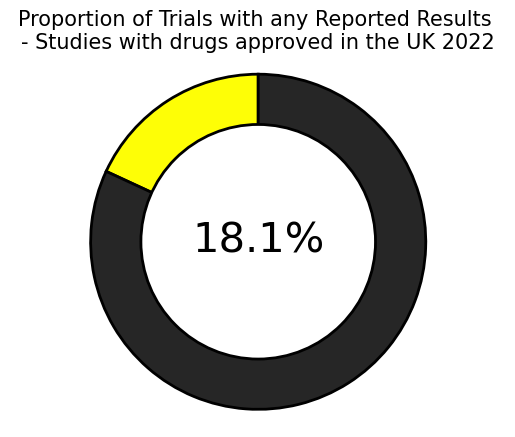

In [187]:
# Calculate the counts
count_results = trials_drugs['results'].sum()
count_no_results = len(trials_drugs) - count_results

# Calculate the proportions
total_trials = len(trials_drugs)
proportion_results = count_results / total_trials
proportion_no_results = count_no_results / total_trials

# Create the donut chart
labels = ['Results Reported', 'Results Not Reported']
sizes = [proportion_results, proportion_no_results]
colors = ['#fefe06', '#262626']
outline_color = '#000000'  # Outline color

plt.pie(sizes, labels=None, colors=colors, startangle=90, wedgeprops={'edgecolor': outline_color, 'linewidth': 2})
plt.title('Proportion of Trials with any Reported Results \n- Studies with drugs approved in the UK 2022', fontsize=15)

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white', ec=outline_color, lw=2)  # Add outline to the center circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the value of "Results Reported" in the middle of the donut chart
plt.text(0, 0, f'{proportion_results*100:.1f}%', horizontalalignment='center', verticalalignment='center', fontsize=30, color='black')

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Save the chart as an image file
plt.savefig('/project/approved_drugs_charts_data/donut_chart.png', dpi=300)

# Display the chart
plt.show()

In [188]:
trials_drugs.to_csv(r'/project/approved_drugs_charts_data/trials_drugs.csv')

In [189]:
trials_results = trials_drugs[trials_drugs['results']==1]

In [190]:
trials_results.nct_id.nunique()

830

In [191]:
trials_results.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
2,NCT02944565,2017-02-22,Daratumumab in Treating Patients With Multiple...,Daratumumab Infusion Acceleration,Completed,Phase 2,28.0,Actual,1.0,1,41136520,Biological,daratumumab,Given IV
10,NCT03481556,2018-04-12,Study of Melphalan Flufenamide (Melflufen) + D...,An Open-Label Phase 1/2a Study of the Safety a...,Terminated,Phase 1/Phase 2,56.0,Actual,2.0,1,41422537,Drug,daratumumab,Intravenous infusion
20,NCT03439293,2018-03-13,A Study of Ixazomib+Daratumumab+Dexamethasone ...,"A Phase 2, Open-Label Study of Ixazomib+Daratu...","Active, not recruiting",Phase 2,61.0,Actual,1.0,1,41289776,Drug,daratumumab,Daratumumab IV infusion.
21,NCT02413489,2015-09-02,An Efficacy and Safety Proof of Concept Study ...,"An Open Label, Phase 2 Study to Evaluate Effic...",Terminated,Phase 2,36.0,Actual,1.0,1,40999634,Drug,daratumumab,Daratumumab 16 mg/kg will be administered as i...
25,NCT02488759,2015-10-13,An Investigational Immuno-therapy Study to Inv...,"Non-Comparative, Open-Label, Multiple Cohort, ...",Completed,Phase 1/Phase 2,578.0,Actual,5.0,1,41006716,Drug,daratumumab,NaN


In [192]:
# Create the 'race_dum' column in 'trials_results'
trials_results['race_dum'] = trials_results['nct_id'].isin(race_df['nct_id']).astype(int)

/tmp/ipykernel_268/3339586755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials_results['race_dum'] = trials_results['nct_id'].isin(race_df['nct_id']).astype(int)


In [193]:
trials_results.nct_id.nunique()

830

In [194]:
trials_results.race_dum.value_counts()

1    704
0    126
Name: race_dum, dtype: int64

([<matplotlib.patches.Wedge at 0x7efe8d838880>,
 [Text(-0.5049461654146222, -0.9772560411852511, ''),
  Text(0.5049462111632783, 0.9772560175470143, '')])

Text(0.5, 1.0, 'Proportion of Trials with Race Results of those that reported results \n- Studies with drugs approved in the UK 2022')

Text(0, 0, '84.8%')

(-1.1065561825637125,
 1.1047784656704585,
 -1.1059063445063606,
 1.100281254500303)

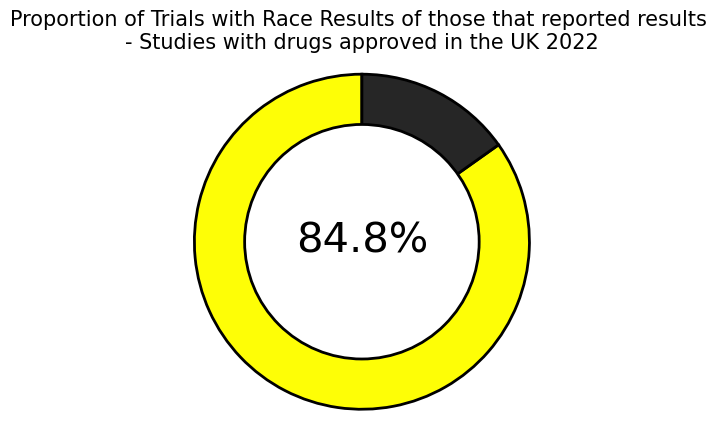

In [195]:
# Calculate the counts
count_results = trials_results['race_dum'].sum()
count_no_results = len(trials_results) - count_results

# Calculate the proportions
total_trials = len(trials_results)
proportion_results = count_results / total_trials
proportion_no_results = count_no_results / total_trials

# Create the donut chart
labels = ['Race Results Reported', 'Race Results Not Reported']
sizes = [proportion_results, proportion_no_results]
colors = ['#fefe06', '#262626']
outline_color = '#000000'  # Outline color

plt.pie(sizes, labels=None, colors=colors, startangle=90, wedgeprops={'edgecolor': outline_color, 'linewidth': 2})
plt.title('Proportion of Trials with Race Results of those that reported results \n- Studies with drugs approved in the UK 2022', fontsize=15)

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white', ec=outline_color, lw=2)  # Add outline to the center circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the value of "Results Reported" in the middle of the donut chart
plt.text(0, 0, f'{proportion_results*100:.1f}%', horizontalalignment='center', verticalalignment='center', fontsize=30, color='black')

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Save the chart as an image file
plt.savefig('/project/approved_drugs_charts_data/donut_chart_race.png', dpi=300)

# Display the chart
plt.show()

In [196]:
# Merge the two DataFrames on 'nct_id'
trials_drugs_race = pd.merge(race_df, trials_results, on='nct_id')

In [197]:
trials_drugs_race.head()

,nct_id,category,title,units,param_type,param_value,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description,race_dum
0,NCT04099277,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,1.0,2019-10-28,A Study of LY3435151 in Participants With Soli...,A Phase 1a/1b Study of LY3435151 Administered ...,Terminated,Phase 1,2.0,Actual,4.0,1,40828836,Drug,pembrolizumab,Administered IV,1
1,NCT04099277,Not Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0,2019-10-28,A Study of LY3435151 in Participants With Soli...,A Phase 1a/1b Study of LY3435151 Administered ...,Terminated,Phase 1,2.0,Actual,4.0,1,40828836,Drug,pembrolizumab,Administered IV,1
2,NCT04099277,Unknown or Not Reported,Ethnicity (NIH/OMB),Participants,Count of Participants,1.0,2019-10-28,A Study of LY3435151 in Participants With Soli...,A Phase 1a/1b Study of LY3435151 Administered ...,Terminated,Phase 1,2.0,Actual,4.0,1,40828836,Drug,pembrolizumab,Administered IV,1
3,NCT04099277,American Indian or Alaska Native,Race (NIH/OMB),Participants,Count of Participants,0.0,2019-10-28,A Study of LY3435151 in Participants With Soli...,A Phase 1a/1b Study of LY3435151 Administered ...,Terminated,Phase 1,2.0,Actual,4.0,1,40828836,Drug,pembrolizumab,Administered IV,1
4,NCT04099277,Asian,Race (NIH/OMB),Participants,Count of Participants,1.0,2019-10-28,A Study of LY3435151 in Participants With Soli...,A Phase 1a/1b Study of LY3435151 Administered ...,Terminated,Phase 1,2.0,Actual,4.0,1,40828836,Drug,pembrolizumab,Administered IV,1


In [198]:
trials_drugs_race.nct_id.nunique()

704

In [199]:
trials_drugs_race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21812 entries, 0 to 21811
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nct_id             21812 non-null  object 
 1   category           21812 non-null  object 
 2   title              21812 non-null  object 
 3   units              21812 non-null  object 
 4   param_type         21812 non-null  object 
 5   param_value        21762 non-null  object 
 6   start_date         21812 non-null  object 
 7   brief_title        21812 non-null  object 
 8   official_title     21812 non-null  object 
 9   overall_status     21812 non-null  object 
 10  phase              21812 non-null  object 
 11  enrollment         21812 non-null  float64
 12  enrollment_type    21812 non-null  object 
 13  number_of_arms     21812 non-null  float64
 14  results            21812 non-null  int64  
 15  id                 21812 non-null  int64  
 16  intervention_type  218

In [200]:
# Replace NaN values with 0 in 'param_value' column
trials_drugs_race['param_value'] = trials_drugs_race['param_value'].fillna(0).astype(int)

In [201]:
grouped_df = trials_drugs_race.groupby(['nct_id','category','title','units','param_type', 'start_date','brief_title','official_title','overall_status','phase','enrollment_type','id','intervention_type','name']).sum()

/tmp/ipykernel_268/2677254127.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = trials_drugs_race.groupby(['nct_id','category','title','units','param_type', 'start_date','brief_title','official_title','overall_status','phase','enrollment_type','id','intervention_type','name']).sum()


In [202]:
grouped_df.reset_index(inplace=True)

In [203]:
grouped_df.head()

,nct_id,category,title,units,param_type,start_date,brief_title,official_title,overall_status,phase,enrollment_type,id,intervention_type,name,param_value,enrollment,number_of_arms,results,race_dum
0,NCT00946153,American Indian or Alaska Native,Race (NIH/OMB),Participants,Count of Participants,2009-07-24,Study of Lenvatinib (E7080) in Participants Wi...,Phase I/II Study of E7080 in Patients With Adv...,Completed,Phase 1/Phase 2,Actual,41355121,Drug,lenvatinib,0,396.0,6.0,6,6
1,NCT00946153,Asian,Race (NIH/OMB),Participants,Count of Participants,2009-07-24,Study of Lenvatinib (E7080) in Participants Wi...,Phase I/II Study of E7080 in Patients With Adv...,Completed,Phase 1/Phase 2,Actual,41355121,Drug,lenvatinib,132,396.0,6.0,6,6
2,NCT00946153,Black or African American,Race (NIH/OMB),Participants,Count of Participants,2009-07-24,Study of Lenvatinib (E7080) in Participants Wi...,Phase I/II Study of E7080 in Patients With Adv...,Completed,Phase 1/Phase 2,Actual,41355121,Drug,lenvatinib,0,396.0,6.0,6,6
3,NCT00946153,More than one race,Race (NIH/OMB),Participants,Count of Participants,2009-07-24,Study of Lenvatinib (E7080) in Participants Wi...,Phase I/II Study of E7080 in Patients With Adv...,Completed,Phase 1/Phase 2,Actual,41355121,Drug,lenvatinib,0,396.0,6.0,6,6
4,NCT00946153,Native Hawaiian or Other Pacific Islander,Race (NIH/OMB),Participants,Count of Participants,2009-07-24,Study of Lenvatinib (E7080) in Participants Wi...,Phase I/II Study of E7080 in Patients With Adv...,Completed,Phase 1/Phase 2,Actual,41355121,Drug,lenvatinib,0,396.0,6.0,6,6


In [204]:
grouped_df.nct_id.nunique()

704

In [205]:
grouped_df.to_csv('/project/approved_drugs_charts_data/grouped_race_drug.csv')

Using OpenAI API, I used the Chat GPT Google Docs extension and classified the "category" column into 10 different Race/Erhnicity groups (White/ White Heritage, Black/ Black Heritage, Hispanic/ Latino, Asian/ Asian Heritage, American Indian/ Alaska Native, Middle Eastern, Hawaiian/ Other Pacific Islander, Other, Mixed, Unknown or Not Reported") using the following prompt:

=GPT_CLASSIFY(cell,"White/ White Heritage, Black/ Black Heritage, Hispanic/ Latino, Asian/ Asian Heritage, American Indian/ Alaska Native, Middle Eastern, Hawaiian/ Other Pacific Islander, Other, Mixed, Unknown or Not Reported")

In [206]:
grouped_race = pd.read_csv('https://www.dropbox.com/scl/fi/aevsyt3n5reyu3n8xaism/trials_drugs_race_chat.csv?rlkey=s5ojzr12p9fv142k6aggasbn7&dl=1')

In [207]:
grouped_race.head()

,nct_id,category,race/ethnicity,title,units,param_type,start_date,brief_title,official_title,overall_status,phase,enrollment_type,id,intervention_type,name,param_value,enrollment,number_of_arms,results,race_dum
0,NCT00946153,American Indian or Alaska Native,American Indian/ Alaska Native,Race (NIH/OMB),Participants,Count of Participants,24/07/2009,Study of Lenvatinib (E7080) in Participants Wi...,Phase I/II Study of E7080 in Patients With Adv...,Completed,Phase 1/Phase 2,Actual,41355121,Drug,lenvatinib,0,396,6,6,6
1,NCT00946153,Asian,Asian/ Asian Heritage,Race (NIH/OMB),Participants,Count of Participants,24/07/2009,Study of Lenvatinib (E7080) in Participants Wi...,Phase I/II Study of E7080 in Patients With Adv...,Completed,Phase 1/Phase 2,Actual,41355121,Drug,lenvatinib,132,396,6,6,6
2,NCT00946153,Black or African American,Black/ Black Heritage,Race (NIH/OMB),Participants,Count of Participants,24/07/2009,Study of Lenvatinib (E7080) in Participants Wi...,Phase I/II Study of E7080 in Patients With Adv...,Completed,Phase 1/Phase 2,Actual,41355121,Drug,lenvatinib,0,396,6,6,6
3,NCT00946153,More than one race,Mixed,Race (NIH/OMB),Participants,Count of Participants,24/07/2009,Study of Lenvatinib (E7080) in Participants Wi...,Phase I/II Study of E7080 in Patients With Adv...,Completed,Phase 1/Phase 2,Actual,41355121,Drug,lenvatinib,0,396,6,6,6
4,NCT00946153,Native Hawaiian or Other Pacific Islander,Hawaiian/ Other Pacific Islander,Race (NIH/OMB),Participants,Count of Participants,24/07/2009,Study of Lenvatinib (E7080) in Participants Wi...,Phase I/II Study of E7080 in Patients With Adv...,Completed,Phase 1/Phase 2,Actual,41355121,Drug,lenvatinib,0,396,6,6,6


In [208]:
grouped_race['race/ethnicity'].value_counts()

Unknown or Not Reported             1177
White/ White Heritage                667
Asian/ Asian Heritage                653
Black/ Black Heritage                647
American Indian/ Alaska Native       611
Hawaiian/ Other Pacific Islander     604
Other                                604
Mixed                                579
Hispanic/ Latino                     550
Middle Eastern                         3
Name: race/ethnicity, dtype: int64

In [209]:
grouped_race.drop(['category','title','units','param_type'], axis =1 , inplace=True)

In [210]:
grouped_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nct_id             6095 non-null   object
 1   race/ethnicity     6095 non-null   object
 2   start_date         6095 non-null   object
 3   brief_title        6095 non-null   object
 4   official_title     6095 non-null   object
 5   overall_status     6095 non-null   object
 6   phase              6095 non-null   object
 7   enrollment_type    6095 non-null   object
 8   id                 6095 non-null   int64 
 9   intervention_type  6095 non-null   object
 10  name               6095 non-null   object
 11  param_value        6095 non-null   int64 
 12  enrollment         6095 non-null   int64 
 13  number_of_arms     6095 non-null   int64 
 14  results            6095 non-null   int64 
 15  race_dum           6095 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 762.

In [211]:
# pivot the dataframe to create new columns for each category of the 'race' column
pivoted_df = grouped_race.pivot_table(index=['nct_id', 'phase', 'start_date','enrollment_type','name','official_title','brief_title'], columns='race/ethnicity', values=['param_value'], aggfunc='sum').reset_index()

In [212]:
pivoted_df.head()

nct_id            phase  start_date enrollment_type  \
race/ethnicity                                                             
0               NCT00946153  Phase 1/Phase 2  24/07/2009          Actual   
1               NCT01295827          Phase 1  04/03/2011          Actual   
2               NCT01298570          Phase 2  07/04/2011          Actual   
3               NCT01354431          Phase 2  31/05/2011          Actual   
4               NCT01472081          Phase 1  09/02/2012          Actual   

                                     name  \
race/ethnicity                              
0                              lenvatinib   
1                           pembrolizumab   
2               regorafenib (bay 73-4506)   
3                               nivolumab   
4                               nivolumab   

                                                   official_title  \
race/ethnicity                                                      
0               Phase I/II Study of E7080 in Patients With Adv...   
1               Phase I Study of Single Agent Pembrolizumab (M...   
2               Multi-Center, Randomized, Placebo-Controlled P...   
3               A Randomized, Blinded, Phase 2 Dose-Ranging St...   
4               A Phase 1 Study of Nivolumab (BMS-936558) Plus...   

                                                      brief_title  \
race/ethnicity                                                      
0               Study of Lenvatinib (E7080) in Participants Wi...   
1               Study of Pembrolizumab (MK-3475) in Participan...   
2               Regorafenib+FOLFIRI Versus Placebo+FOLFIRI as ...   
3               BMS-936558 (MDX-1106) In Subjects With Advance...   
4               Nivolumab (BMS-936558; MDX-1106) in Combinatio...   

                                  param_value                        \
race/ethnicity American Indian/ Alaska Native Asian/ Asian Heritage   
0                                         0.0                 132.0   
1                                         4.0                 162.0   
2                                         0.0                   0.0   
3                                         NaN                   NaN   
4                                         2.0                   6.0   

                                                                       \
race/ethnicity Black/ Black Heritage Hawaiian/ Other Pacific Islander   
0                                0.0                              0.0   
1                               52.0                              4.0   
2                               62.0                              0.0   
3                                NaN                              NaN   
4                               10.0                              0.0   

                                                              \
race/ethnicity Hispanic/ Latino Middle Eastern Mixed   Other   
0                           NaN            NaN   0.0     NaN   
1                         126.0            NaN   8.0  2390.0   
2                           NaN            NaN   0.0     NaN   
3                           0.0            NaN   NaN   320.0   
4                          12.0            NaN   0.0   268.0   

                                                              
race/ethnicity Unknown or Not Reported White/ White Heritage  
0                                  0.0                   0.0  
1                                  6.0                2288.0  
2                                  6.0                 294.0  
3                                 16.0                   NaN  
4                                 32.0                 282.0

In [213]:
pivoted_df.to_csv('/project/approved_drugs_charts_data/pivoted_df.csv')

In [214]:
race_columns_drugs = pd.read_csv('https://raw.githubusercontent.com/AndreasPetrou/UCL_dissertation.github.io/main/Approved%20Drugs%20UK/trials_drugs_race_columns.csv')

In [215]:
race_columns_drugs.head()

,nct_id,phase,start_date,enrollment_type,name,official_title,brief_title,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage
0,NCT00946153,Phase 1/Phase 2,24/07/2009,Actual,lenvatinib,Phase I/II Study of E7080 in Patients With Adv...,Study of Lenvatinib (E7080) in Participants Wi...,0.0,132.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0
1,NCT01295827,Phase 1,04/03/2011,Actual,pembrolizumab,Phase I Study of Single Agent Pembrolizumab (M...,Study of Pembrolizumab (MK-3475) in Participan...,4.0,162.0,52.0,4.0,126.0,NaN,8.0,2390.0,6.0,2288.0
2,NCT01298570,Phase 2,07/04/2011,Actual,regorafenib (bay 73-4506),"Multi-Center, Randomized, Placebo-Controlled P...",Regorafenib+FOLFIRI Versus Placebo+FOLFIRI as ...,0.0,0.0,62.0,0.0,NaN,NaN,0.0,NaN,6.0,294.0
3,NCT01354431,Phase 2,31/05/2011,Actual,nivolumab,"A Randomized, Blinded, Phase 2 Dose-Ranging St...",BMS-936558 (MDX-1106) In Subjects With Advance...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,320.0,16.0,NaN
4,NCT01472081,Phase 1,09/02/2012,Actual,nivolumab,A Phase 1 Study of Nivolumab (BMS-936558) Plus...,Nivolumab (BMS-936558; MDX-1106) in Combinatio...,2.0,6.0,10.0,0.0,12.0,NaN,0.0,268.0,32.0,282.0


In [216]:
race_columns_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   nct_id                            704 non-null    object 
 1   phase                             704 non-null    object 
 2   start_date                        704 non-null    object 
 3   enrollment_type                   704 non-null    object 
 4   name                              704 non-null    object 
 5   official_title                    704 non-null    object 
 6   brief_title                       704 non-null    object 
 7   American Indian/ Alaska Native    611 non-null    float64
 8   Asian/ Asian Heritage             649 non-null    float64
 9   Black/ Black Heritage             647 non-null    float64
 10  Hawaiian/ Other Pacific Islander  604 non-null    float64
 11  Hispanic/ Latino                  550 non-null    float64
 12  Middle E

In [217]:
# Convert 'start_date' column to datetime format
race_columns_drugs['start_date'] = pd.to_datetime(race_columns_drugs['start_date'], dayfirst=True)

# Extract the year from 'start_date' column
race_columns_drugs['year'] = race_columns_drugs['start_date'].dt.year

In [218]:
race_drugs_groups = race_columns_drugs.groupby('name').sum()

/tmp/ipykernel_268/636946738.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  race_drugs_groups = race_columns_drugs.groupby('name').sum()


In [219]:
race_drugs_groups.reset_index(inplace=True)

In [220]:
race_drugs_groups.rename(columns={'name': 'drug'}, inplace=True)

In [221]:
race_drugs_groups.drop(['year'], axis=1, inplace=True)

In [222]:
race_drugs_groups.head()

,drug,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage
0,abt199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,30.0
1,atezolizumab,43.0,2648.0,277.0,18.0,910.0,0.0,16.0,14103.0,1440.0,8635.0
2,avelumab,25.0,2849.0,352.0,16.0,670.0,0.0,1.0,9226.0,1745.0,10506.0
3,axicabtagene ciloleucel,1.0,21.0,25.0,2.0,82.0,0.0,0.0,753.0,15.0,657.0
4,bms-936558,0.0,10.0,18.0,2.0,18.0,0.0,0.0,558.0,462.0,166.0


In [223]:
race_drugs_groups.to_csv('/project/approved_drugs_charts_data/race_drugs_groups.csv')

create a graph in Tableau with the above dataset.

In [224]:
countries.head()

,id,nct_id,name,removed
0,33287963,NCT01538901,Austria,False
1,33034889,NCT03935568,United States,False
2,33541613,NCT01902173,United States,False
3,33287964,NCT01538914,"Korea, Republic of",False
4,33287965,NCT01538927,India,False


In [225]:
# Rename the 'name' column to 'country'
countries = countries.rename(columns={'name': 'country'})

In [226]:
countries.drop(['id','removed'],axis=1,inplace=True)

In [227]:
race_columns_drugs_countries = pd.merge(race_columns_drugs,countries,on='nct_id',how='left')

In [228]:
race_columns_drugs_countries.head()

,nct_id,phase,start_date,enrollment_type,name,official_title,brief_title,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,year,country
0,NCT00946153,Phase 1/Phase 2,2009-07-24,Actual,lenvatinib,Phase I/II Study of E7080 in Patients With Adv...,Study of Lenvatinib (E7080) in Participants Wi...,0.0,132.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,2009,Japan
1,NCT00946153,Phase 1/Phase 2,2009-07-24,Actual,lenvatinib,Phase I/II Study of E7080 in Patients With Adv...,Study of Lenvatinib (E7080) in Participants Wi...,0.0,132.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,2009,"Korea, Republic of"
2,NCT01295827,Phase 1,2011-03-04,Actual,pembrolizumab,Phase I Study of Single Agent Pembrolizumab (M...,Study of Pembrolizumab (MK-3475) in Participan...,4.0,162.0,52.0,4.0,126.0,NaN,8.0,2390.0,6.0,2288.0,2011,Australia
3,NCT01295827,Phase 1,2011-03-04,Actual,pembrolizumab,Phase I Study of Single Agent Pembrolizumab (M...,Study of Pembrolizumab (MK-3475) in Participan...,4.0,162.0,52.0,4.0,126.0,NaN,8.0,2390.0,6.0,2288.0,2011,Canada
4,NCT01295827,Phase 1,2011-03-04,Actual,pembrolizumab,Phase I Study of Single Agent Pembrolizumab (M...,Study of Pembrolizumab (MK-3475) in Participan...,4.0,162.0,52.0,4.0,126.0,NaN,8.0,2390.0,6.0,2288.0,2011,France


In [229]:
race_columns_drugs_countries.to_csv('/project/approved_drugs_charts_data/race_columns_drugs_countries.csv')

In [230]:
import re

# Create a list of cancer-related terms
cancer_terms = ['cancer', 'tumor', 'tumour', 'carcinoma', 'lymphoma', 'leukemia', 'sarcoma', 'glioblastoma',
                'glioma', 'neuroblastoma', 'papilloma', 'melanoma', 'metastasis', 'malignant', 'benign',
                'leukemia', 'histiocytoma', 'adenocarcinoma', 'aldosteronoma', 'adamantinoma', 'ameloblastoma',
                'angiofibroma', 'angiosarcoma', 'astroblastoma', 'astrocytoma', 'liponeurocytoma', 'cholangiocarcinoma',
                'chondroblastoma', 'chondrosarcoma', 'chordoma', 'nephroma', 'craniopharyngioma', 'cystadenoma',
                'nephroblastoma', 'chondrosarcoma', 'trichoepithelioma', 'ependymoma', 'hemangioendothelioma',
                'erythroleukemia', 'fibroadenoma', 'fibrosarcoma', 'germinoma', 'glioblastoma', 'osteosarcoma',
                'rhabdomyosarcoma', 'leiomyosarcoma', 'myxosarcoma', 'mesenchymoma', 'astrocytoma', 'ependymoma',
                'neuroblastoma', 'oligodendroglioma', 'pheochromocytoma', 'retinoblastoma', 'cholangiocarcinoma',
                'myelodysplastic', 'liposarcoma', 'histiocytoma', 'macroglobulinaemia', 'polycythaemia vera',
                'essential thrombocythaemia', 'myelofibrosis', 'gastrinoma', 'hemangioendothelioma', 'hepatoblastoma',
                'insulinoma', 'keratoacanthoma', 'leiomyosarcoma', 'liposarcoma', 'mesenchymoma', 'medulloepithelioma',
                'meningioma', 'nephroma', 'myxofibrosarcoma', 'nephroblastoma', 'esthesioneuroblastoma', 'pheochromocytoma',
                'pineoblastoma', 'plasmacytoma', 'prolactinoma', 'fibrosarcoma', 'somatostatinoma', 'haemangioblastoma',
                'thymoma', 'seminoma', 'dysgerminoma', 'oncocytic', 'paraganglioma', 'teratoma', 'mesothelioma',
                'neoplasia', 'phaeochromocytoma', 'acoustic neuroma', 'neuroma', 'nephroblastoma', 'mycosis fungoides',
                'vipoma', 'oncocytic', 'oncocytomas', 'teratoma', 'gestational trophoblastic disease', 'hodgkin',
                'burkitt', 'wilms', 'kaposi', 'paget', 'edwig', 'schwannoma', 'verner-morrison', 'waldenström',
                'von recklinghausen', 'von hippel-lindau', 'peutz-jeghers', 'neurofibromatosis type 2', 'carney', 'gorlin']

# Create a regex pattern by joining the cancer terms and making them case-insensitive
pattern = re.compile(r'|'.join(cancer_terms), re.IGNORECASE)

# Filter for cancer-related trials
cancer_df = race_columns_drugs[
    (race_columns_drugs['official_title'].str.contains(pattern, na=False)) |
    (race_columns_drugs['brief_title'].str.contains(pattern, na=False))
]

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 0 to 703
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   nct_id                            644 non-null    object        
 1   phase                             644 non-null    object        
 2   start_date                        644 non-null    datetime64[ns]
 3   enrollment_type                   644 non-null    object        
 4   name                              644 non-null    object        
 5   official_title                    644 non-null    object        
 6   brief_title                       644 non-null    object        
 7   American Indian/ Alaska Native    558 non-null    float64       
 8   Asian/ Asian Heritage             594 non-null    float64       
 9   Black/ Black Heritage             593 non-null    float64       
 10  Hawaiian/ Other Pacific Islander  553 non-null    

In [231]:
cancer_df.head()

,nct_id,phase,start_date,enrollment_type,name,official_title,brief_title,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,year
0,NCT00946153,Phase 1/Phase 2,2009-07-24,Actual,lenvatinib,Phase I/II Study of E7080 in Patients With Adv...,Study of Lenvatinib (E7080) in Participants Wi...,0.0,132.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,2009
1,NCT01295827,Phase 1,2011-03-04,Actual,pembrolizumab,Phase I Study of Single Agent Pembrolizumab (M...,Study of Pembrolizumab (MK-3475) in Participan...,4.0,162.0,52.0,4.0,126.0,NaN,8.0,2390.0,6.0,2288.0,2011
2,NCT01298570,Phase 2,2011-04-07,Actual,regorafenib (bay 73-4506),"Multi-Center, Randomized, Placebo-Controlled P...",Regorafenib+FOLFIRI Versus Placebo+FOLFIRI as ...,0.0,0.0,62.0,0.0,NaN,NaN,0.0,NaN,6.0,294.0,2011
3,NCT01354431,Phase 2,2011-05-31,Actual,nivolumab,"A Randomized, Blinded, Phase 2 Dose-Ranging St...",BMS-936558 (MDX-1106) In Subjects With Advance...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,320.0,16.0,NaN,2011
4,NCT01472081,Phase 1,2012-02-09,Actual,nivolumab,A Phase 1 Study of Nivolumab (BMS-936558) Plus...,Nivolumab (BMS-936558; MDX-1106) in Combinatio...,2.0,6.0,10.0,0.0,12.0,NaN,0.0,268.0,32.0,282.0,2012


## Cancers affecting black and asian ethnic groups more than white

From the British Journal of Cancer (Br J Cancer)  ISSN 1532-1827 (online)  ISSN 0007-0920 (print) https://www.nature.com/articles/s41416-022-01718-5/figures/1 we can see that from Figure 1 the cancers that affect more the Black and Asian ethnic groups than white are:
- Gallbladder Cancer
- Myeloma
- Prostate Cancer

I will filter these cancer names in the INDICATION column of the approved_drugs dataframe and then find the drugs used for these trials.

Then i will find all the synonyms of these drugs and filter the world trials that used those drugs in their clinical study to explore the race distribution.

In [232]:
approved_df.head()

,Rec no.,TA ID,Year of Publication,Process,Technology,Technology type,Indication,Categorisation (for specific recommendation),Comment,year
0,3,TA003,2000-01-01,MTA,Paclitaxel,Pharmaceutical,Ovarian cancer,Recommended,Guidance has been replaced by TA55. Recommenda...,2000
2,6,TA006,2000-01-01,MTA,Docetaxel,Pharmaceutical,Advanced breast cancer,Recommended,Guidance has been replaced by TA30. Recommenda...,2000
3,7,TA006,2000-01-01,MTA,Paclitaxel,Pharmaceutical,Advanced breast cancer,Recommended,Guidance has been replaced by TA30. Recommenda...,2000
5,35,TA023,2001-01-01,MTA,Temozolomide,Pharmaceutical,Brain cancer (recurrent),Recommended,Recommendation in line with marketing authoris...,2001
6,42,TA025,2001-01-01,MTA,Gemcitabine (1st line),Pharmaceutical,Pancreatic cancer,Recommended,Recommended in line with clinical practice.,2001


In [233]:
search_terms = ['gallbladder', 'myeloma', 'prostate']

# Convert the "Indication" column to lowercase for case-insensitive matching
approved_df['Indication'] = approved_df['Indication'].str.lower()

# Create a regular expression pattern to search for the terms
pattern = '|'.join(re.escape(term.lower()) for term in search_terms)

# Search for the pattern in the "Indication" column and create the new dataframe
cancers_black_asian = approved_df[approved_df['Indication'].str.contains(pattern)]

In [234]:
cancers_black_asian

,Rec no.,TA ID,Year of Publication,Process,Technology,Technology type,Indication,Categorisation (for specific recommendation),Comment,year
51,239,TA101,2006-01-01,MTA,Docetaxel,Pharmaceutical,prostate cancer (hormone-refractory),Recommended,Recommendation in line with marketing authoris...,2006
67,280,TA129,2007-01-01,STA,Bortezomib,Pharmaceutical,multiple myeloma,Recommended,Recommended after agreement of Patient Access ...,2007
78,351,TA171,2009-01-01,STA,Lenalidomide,Pharmaceutical,multiple myeloma,Recommended,Recommended following agreement on Patient Acc...,2009
118,444,TA228,2011-01-01,MTA,Thalidomide in combination with an alkylating ...,Pharmaceutical,multiple myeloma,Recommended,Recommended in line with marketing authorisation.,2011
119,445,TA228,2011-01-01,MTA,Bortezomib in combination with an alkylating a...,Pharmaceutical,multiple myeloma,Optimised,Optimised recommendation for use in specific c...,2011
138,486,TA259,2012-01-01,STA,Abiraterone in combination with prednisolone o...,Pharmaceutical,treatment of castration-resistant metastatic p...,Recommended,Recommended in line with marketing authorisati...,2012
140,492,TA265,2012-01-01,MTA,Denosumab,Pharmaceutical,prevention of skeletal-related events in adult...,Recommended,Recommended in line with clinical practice fol...,2012
156,545,TA311,2014-01-01,STA,"Bortezomib in combination with dexamethasone, ...",Pharmaceutical,for induction therapy in multiple myeloma befo...,Recommended,Recommended in line with marketing authorisation.,2014
157,553,TA316,2014-01-01,STA,Enzalutamide,Pharmaceutical,metastatic hormone-relapsed prostate cancer,Recommended,Recommended in line with marketing authorisati...,2014
181,631,TA376,2015-01-01,STA,Radium-223 dichloride,Pharmaceutical,treating hormone-relapsed prostate cancer with...,Optimised,Optimised recommendation for Radium‑223 dichlo...,2015


In [235]:
sorted_cancers_black_asian = cancers_black_asian.sort_values(by=['Technology', 'year'])

In [236]:
sorted_cancers_black_asian

,Rec no.,TA ID,Year of Publication,Process,Technology,Technology type,Indication,Categorisation (for specific recommendation),Comment,year
274,814,TA510,2017-01-01,STA,Daratumumab monotherapy,Pharmaceutical,relapsed and refractory multiple myeloma,Optimised (CDF),Optimised recommendation for daratumumab mono...,2017
138,486,TA259,2012-01-01,STA,Abiraterone in combination with prednisolone o...,Pharmaceutical,treatment of castration-resistant metastatic p...,Recommended,Recommended in line with marketing authorisati...,2012
188,647,TA387,2016-01-01,STA,Abiraterone in combination with prednisone or ...,Pharmaceutical,treating metastatic hormone-relapsed prostate ...,Recommended,Recommended in line with the marketing authori...,2016
427,1074,TA740,2021-01-01,STA,Apalutamide with androgen deprivation therapy,Pharmaceutical,high-risk hormone-relapsed non-metastatic pros...,Recommended,Recommended in line with clinical practice and...,2021
428,1075,TA741,2021-01-01,STA,Apalutamide with androgen deprivation therapy,Pharmaceutical,hormone-sensitive metastatic prostate cancer,Optimised,Optimised recommendation for treating hormone-...,2021
67,280,TA129,2007-01-01,STA,Bortezomib,Pharmaceutical,multiple myeloma,Recommended,Recommended after agreement of Patient Access ...,2007
119,445,TA228,2011-01-01,MTA,Bortezomib in combination with an alkylating a...,Pharmaceutical,multiple myeloma,Optimised,Optimised recommendation for use in specific c...,2011
156,545,TA311,2014-01-01,STA,"Bortezomib in combination with dexamethasone, ...",Pharmaceutical,for induction therapy in multiple myeloma befo...,Recommended,Recommended in line with marketing authorisation.,2014
195,658,TA391,2016-01-01,STA,Cabazitaxel in combination with prednisone or ...,Pharmaceutical,treating hormone-relapsed metastatic prostate ...,Recommended,Recommended in line with clinical practice and...,2016
376,974,TA657,2020-01-01,STA,Carfilzomib for previously treated multiple my...,Pharmaceutical,previously treated multiple myeloma,Recommended,Reissue of TA457 to allow previous treatment w...,2020


In [237]:
sorted_cancers_black_asian.to_csv('/project/approved_drugs_charts_data/sorted_cancers_black_asian.csv')

By exploring the above dataframe, we can find the latest year which each drug was approved. This will allow us to search the trials from that year and before which focused on that drug.

I will exclude the technologies which are a combination of two drugs.

In [238]:
filtered_cancers_black_asian = sorted_cancers_black_asian[~sorted_cancers_black_asian['Technology'].str.contains(r'\bin|\bwith', case=False)]

In [239]:
filtered_cancers_black_asian

,Rec no.,TA ID,Year of Publication,Process,Technology,Technology type,Indication,Categorisation (for specific recommendation),Comment,year
274,814,TA510,2017-01-01,STA,Daratumumab monotherapy,Pharmaceutical,relapsed and refractory multiple myeloma,Optimised (CDF),Optimised recommendation for daratumumab mono...,2017
67,280,TA129,2007-01-01,STA,Bortezomib,Pharmaceutical,multiple myeloma,Recommended,Recommended after agreement of Patient Access ...,2007
376,974,TA657,2020-01-01,STA,Carfilzomib for previously treated multiple my...,Pharmaceutical,previously treated multiple myeloma,Recommended,Reissue of TA457 to allow previous treatment w...,2020
325,889,TA573,2019-01-01,STA,Daratumumab,Pharmaceutical,multiple myeloma,Recommended (CDF),Recommended in the CDF,2019
450,1119,TA783,2022-01-01,STA,Daratumumab monotherapy for treating relapsed ...,Pharmaceutical,relapsed and refractory multiple myeloma,Optimised,CDF review of TA510 Optimised recommenation fo...,2022
203,671,TA404,2016-01-01,STA,Degarelix,Pharmaceutical,advanced hormone-dependent prostate cancer,Optimised,Optimised recommendation for degarelix as an o...,2016
140,492,TA265,2012-01-01,MTA,Denosumab,Pharmaceutical,prevention of skeletal-related events in adult...,Recommended,Recommended in line with clinical practice fol...,2012
51,239,TA101,2006-01-01,MTA,Docetaxel,Pharmaceutical,prostate cancer (hormone-refractory),Recommended,Recommendation in line with marketing authoris...,2006
157,553,TA316,2014-01-01,STA,Enzalutamide,Pharmaceutical,metastatic hormone-relapsed prostate cancer,Recommended,Recommended in line with marketing authorisati...,2014
182,632,TA377,2015-01-01,STA,Enzalutamide,Pharmaceutical,treating metastatic hormone-relapsed prostate ...,Recommended,Recommended in line with marketing authorisati...,2015


In [240]:
filtered_cancers_black_asian.to_csv('/project/approved_drugs_charts_data/filtered_cancers_black_asian.csv')

Now, i will search the synonyms of these drugs from PubChem and later filter the world clinical studies that tested these drugs.

In [241]:
bortezomib = [
    "Bortezomib",
    "179324-69-7",
    "Velcade",
    "PS-341",
    "LDP-341",
    "Bortezomib (PS-341)",
    "Ps 341",
    "radiciol",
    "Bortezomib accord",
    "((R)-3-Methyl-1-((S)-3-phenyl-2-(pyrazine-2-carboxamido)propanamido)butyl)boronic acid",
    "DPBA",
    "NSC-681239",
    "C19H25BN4O4",
    "Peptide boronate",
    "LDP 341",
    "MLN-341",
    "Pyz-Phe-boroLeu",
    "[(1R)-3-methyl-1-[[(2S)-3-phenyl-2-(pyrazine-2-carbonylamino)propanoyl]amino]butyl]boronic acid",
    "PS 341 (pharmaceutical)",
    "UNII-69G8BD63PP",
    "MG 341",
    "Velcade (TN)",
    "NSC 681239",
    "69G8BD63PP",
    "Bortezomib (Velcade)",
    "N-[(1R)-1-(DIHYDROXYBORYL)-3-METHYLBUTYL]-N-(PYRAZIN-2-YLCARBONYL)-L-PHENYLALANINAMIDE",
    "DTXSID3040980",
    "CHEBI:52717",
    "HSDB 7666",
    "MG-341",
    "Boronic acid, B-[(1R)-3-methyl-1-[[(2S)-1-oxo-3-phenyl-2-[(2-pyrazinylcarbonyl)amino]propyl]amino]butyl]-",
    "PROSCRIPT BORONIC ACID",
    "Bortezomib [USAN:INN:BAN]",
    "CHEMBL325041",
    "DTXCID1020980",
    "LPD 341",
    "LPD-341",
    "NSC681239",
    "NCGC00242506-02",
    "S1013",
    "BORTEZOMIB (MART.)",
    "BORTEZOMIB [MART.]",
    "N-((1S)-1-Benzyl-2-(((1R)-1-(dihydroxyboranyl)-3-methylbutyl)amino)-2-oxoethyl)pyrazinecarboxamide",
    "(R)-3-methyl-1-((S)-3-phenyl-2-(pyrazine-2-carboxamido)propanamido)butylboronic acid",
    "N-[(1R)-1-(dihydroxyboranyl)-3-methylbutyl]-Nalpha-(pyrazin-2-ylcarbonyl)-L-phenylalaninamide",
    "[(1R)-3-methyl-1-({(2S)-3-phenyl-2-[(pyrazin-2-ylcarbonyl)amino]propanoyl}amino)butyl]boronic acid",
    "Boronic acid, ((1R)-3-methyl-1-(((2S)-1-oxo-3-phenyl-2-((pyrazinylcarbonyl)amino)propyl)amino)butyl)-",
    "N-((1S)-1-benzyl-2-(((1R)-1-(dihydroxyboranyl)-3-methylbutyl)amino)2-oxoethylpyrazinecarboxamide",
    "Bortezomib [USAN:INN]",
    "CAS-179324-69-7",
    "[(1R)-3-Methyl-1-[[(2S)-1-oxo-3-phenyl-2-[(pyrazinylcarbonyl)amino]propyl]amino]butyl]boronic acid",
    "bortezomibum",
    "Brotezamide",
    "Bortezomib hydrate",
    "Bortezomib,Velcade",
    "N-((1R)-1-(DIHYDROXYBORYL)-3-methylbutyl)-N-(pyrazin-2-ylcarbonyl)-L-phenylalaninamide",
    "NCGC00168751-01",
    "NCGC00181022-01",
    "N-((1R)-1-(dihydroxyboranyl)-3-methylbutyl)-N(alpha)-(pyrazin-2-ylcarbonyl)-L-phenylalaninamide",
    "N-[(1R)-1-(dihydroxyboranyl)-3-methylbutyl]-N(alpha)-(pyrazin-2-ylcarbonyl)-L-phenylalaninamide",
    "Bortezomib- Bio-X",
    "Bortezomib [USAN]",
    "MFCD09056737",
    "Velcade (Millenium)",
    "3mg0",
    "BORTEZOMIB [MI]",
    "BORTEZOMIB [INN]",
    "BORTEZOMIB [JAN]",
    "BORTEZOMIB [HSDB]",
    "PS-341 [Bortezomib]",
    "BORTEZOMIB [VANDF]",
    "D0SH3I",
    "BORTEZOMIB [WHO-DD]",
    "Bortezomib(JAN/USAN/INN)",
    "MLS004774142",
    "Bortezomib (JAN/USAN/INN)",
    "BORTEZOMIB [EMA EPAR]",
    "SCHEMBL192129",
    "GTPL6391",
    "BORTEZOMIB [ORANGE BOOK]",
    "BORTEZOMIB HYDRATE [JAN]",
    "Bortezomib (Proteasome inhibitor)",
    "L01XX32",
    "((1R)-3-Methyl-1-(((2S)-3-phenyl-2-((pyrazinylcarbonyl)amino)propanoyl)amino)butyl)boronic acid",
    "[(1R)-3-Methyl-1-[[(2S)-3-phenyl-2-[(pyrazinylcarbonyl)amino]propanoyl]amino]butyl]boronic acid",
    "Boronic acid, (3-methyl-1-((1-oxo-3-phenyl-2-((pyrazinylcarbonyl)amino)propyl)amino)butyl)-, (S-(R*,S*))-",
    "Tox21_112630",
    "Tox21_112672",
    "BDBM50069989",
    "C19-H25-B-N4-O4",
    "HB4036",
    "NSC756655",
    "AKOS015909706",
    "Tox21_112672_1",
    "AM81235",
    "CCG-268449",
    "CS-1039",
    "CS-O-00482",
    "DB00188",
    "NSC-756655",
    "Bortezomib (Velcade,MG-341,PS-341)",
    "NCGC00242506-01",
    "NCGC00242506-06",
    "NCGC00242506-07",
    "AS-15721",
    "BB164258",
    "HY-10227",
    "NCI60_029010",
    "SMR003500787",
    "Velcade, MG-341, PS-341, Bortezomib",
    "B5741",
    "SW208077-3",
    "A18332",
    "D03150",
    "EN300-657180",
    "AB01273951-01",
    "AB01273951-02",
    "AB01273951_03",
    "Q419319",
    "SR-01000939863",
    "SR-01000939863-2",
    "BRD-K88510285-001-02-0",
    "Z2213886907",
    "n-(2-pyrazine)carbonyl-l-phenylalanine-l-leucine boronic acid",
    "((R)-3-methyl-1-((S)-3-phenyl-2-(pyrazine-2-carboxamido)propanamido)butyl)boronicacid",
    "(R)-3-methyl-1-((S)-3-phenyl-2-(pyrazine-6-carboxamido)propanamido)butylboronic acid",
    "[(1R)-3-methyl-1-[(2S)-3-phenyl-2-[(pyrazin-2-yl)formamido]propanamido]butyl]boronic acid",
    "(1R)-3-Methyl-1-({(2S)-3-phenyl-2-[(2-pyrazinylcarbonyl)amino]propanoyl}amino)butylboronic acid, AldrichCPR",
    "(R)-3-METHYL-1-((S)-3-PHENYL-2-(PYRAZINE-2-CARBOXAMIDO)PROPANAMIDO)BUTAN-2-YLBORONIC ACID",
    "[(1R)-3-Methyl-1-[[(2S)-1-oxo-3-phenyl-2-[(pyrazinylcarbonyl)amino]propyl]amino]-butyl]boronic acid",
    "1610526-91-4",
    "Boronic acid, [(1(R)-3-methyl-1-[[(2S)-1-oxo-3-phenyl-2-[(pyrazinylcarbonyl)amino]propyl]amino]butyl]-"
]

In [242]:
carfilzomib = [
    'Carfilzomib',
    '868540-17-4',
    'Kyprolis',
    'Carfilzomib (PR-171)',
    'PR-171',
    'Carfilzomib (PR171)',
    'UNII-72X6E3J5AR',
    'Carfilzomib [USAN]',
    'Carfilzomib [USAN:INN]',
    'NSC-758252',
    '72X6E3J5AR',
    'CHEMBL451887',
    'DTXSID4048690',
    'CHEBI:65347',
    'NCGC00249613-01',
    '(2S)-4-methyl-N-[(2S)-1-[[(2S)-4-methyl-1-[(2R)-2-methyloxiran-2-yl]-1-oxopentan-2-yl]amino]-1-oxo-3-phenylpropan-2-yl]-2-[[(2S)-2-[(2-morpholin-4-ylacetyl)amino]-4-phenylbutanoyl]amino]pentanamide',
    '(alphaS)-alpha-[[2-(4-Morpholinyl)acetyl]amino]benzenebutanoyl-L-leucyl-N-[(1S)-3-methyl-1-[[(2R)-2-methyl-2-oxiranyl]carbonyl]butyl]-L-phenylalaninamide',
    '(S)-4-methyl-N-((S)-1-(((S)-4-methyl-1-((R)-2-methyloxiran-2-yl)-1-oxopentan-2-yl)amino)-1-oxo-3-phenylpropan-2-yl)-2-((S)-2-(2-morpholinoacetamido)-4-phenylbutanamido)pentanamide',
    'N-{(2S)-2-[(morpholin-4-ylacetyl)amino]-4-phenylbutanoyl}-L-leucyl-N-{(2S)-4-methyl-1-[(2R)-2-methyloxiran-2-yl]-1-oxopentan-2-yl}-L-phenylalaninamide',
    'DTXCID0028616',
    'C40H57N5O7',
    '(2S)-N-((1S)-1-Benzyl-2-(((1S)-3-methyl-1-(((2R)-2-methyloxiran-2-yl)carbonyl)butyl)amino)-2-oxoethyl)-4-methyl-2-(((2S)-2-((morpholin-4-ylacetyl)amino)-4-phenylbutanoyl)amino)pentanamide',
    '(S)-4-Methyl-N-((S)-1-((S)-4-Methyl-1-((R)-2- Methyloxiran-2-yl)-1 -oxopentan-2-ylaMino)-1-oxo-3-phenylpropan-2-yl)-2-((S)-2-(2-MorpholinoacetaMido)-4-phenylbutanaMido)pentanaMide',
    '(S)-4-methyl-N-((S)-1-((S)-4-methyl-1-((R)-2-methyloxiran-2-yl)-1-oxopentan-2-ylamino)-1-oxo-3-phenylpropan-2-yl)-2-((S)-2-(2-morpholinoacetamido)-4-phenylbutanamido)pentanamide',
    'CAS-868540-17-4',
    'MFCD11040997',
    'PR 171',
    'Kyprolis (TN)',
    '(2S)-N-[(1S)-1-Benzyl-2-[[(1S)-3-methyl-1-[[(2R)-2-methyloxiran-2-yl]carbonyl]butyl]amino]-2-oxoethyl]-4-methyl-2-[[(2S)-2-[(morpholin-4-ylacetyl)amino]-4-phenylbutanoyl]amino]pentanamide',
    'Carfilzomib; PR171',
    'CARFILZOMIB [MI]',
    'CARFILZOMIB [INN]',
    'CARFILZOMIB [JAN]',
    'D00UVA',
    'CARFILZOMIB [VANDF]',
    'SCHEMBL85165',
    'CARFILZOMIB [WHO-DD]',
    'MLS006011102',
    'Carfilzomib (JAN/USAN/INN)',
    'GTPL7420',
    'AMY4357',
    'CARFILZOMIB [ORANGE BOOK]',
    'EX-A2037',
    'ONO-7057',
    'Tox21_113079',
    'BDBM50277889',
    'NSC756640',
    'NSC758252',
    's2853',
    'AKOS025401910',
    'Tox21_113079_1',
    'CCG-270405',
    'CS-0984',
    'CS-W004540',
    'DB08889',
    'NSC 758252',
    'NSC-756640',
    'NCGC00249613-02',
    'NCGC00249613-03',
    'NCGC00249613-08',
    'NCGC00249613-11',
    'NCGC00249613-13',
    'AC-27051',
    'AS-17059',
    'HY-10455',
    'SMR004660024',
    'SW218090-2',
    'D08880',
    'AB01565867_02',
    'SR-01000941582',
    'J-501773',
    'SR-01000941582-1',
    'Q15366934',
    '(Alphas)-alpha-((4-morpholinylacetyl)amino)benzenebutanoyl-l-leucyl-n-((1s)-3-methyl-1-(((2r)-2-methyloxiranyl)carbonyl)butyl)-l-phe nylalaninamide',
    'L-PHENYLALANINAMIDE, (.ALPHA.S)-.ALPHA.-((4-MORPHOLINYLACETYL)AMINO)BENZENEBUTANOYL-L-LEUCYL-N-((1S)-3-METHYL-1-(((2R)-2-METHYLOXIRANYL)CARBONYL)BUTYL)-',
    'L-Phenylalaninamide, (alphaS)-alpha-((4-morpholinylacetyl)amino)benzenebutanoyl-L-leucyl-N-((1S)-3-methyl-1-(((2R)-2-methyloxiranyl)carbonyl)butyl)-'
]

In [243]:
daratumumab = [
    "DARATUMUMAB",
    "945721-28-8",
    "DARATUMUMAB COMPONENT OF DARZALEX FASPRO TM",
    "DARATUMUMAB [JAN]",
    "DARATUMUMAB [MI]",
    "DARATUMUMAB [PURPLE BOOK CDER]",
    "DARATUMUMAB [USAN]",
    "DARZALEX",
    "DARZALEX FASPRO TM COMPONENT DARATUMUMAB",
    "Daratumumab [WHO-DD]",
    "HUMAX-CD 38",
    "HUMAX-CD38",
    "IMMUNOGLOBULIN G1, ANTI-(HUMAN CD38 (ANTIGEN)) (HUMAN MONOCLONAL 3003-005 HEAVY CHAIN), DISULFIDE WITH HUMAN MONOCLONAL 3003-005 .KAPPA.-CHAIN, DIMER",
    "daratumumab [INN]",
    "4Z63YK6E0E"
]

In [244]:
degarelix = [
    'Degarelix',
    '214766-78-6',
    'Degarelix acetate',
    'Firmagon',
    'SX0XJI3A11',
    'CHEMBL415606',
    'FE200486 (AS ACETATE SALT)',
    'FE200486',
    'DEGARELIX ACETATE [JAN]',
    'FE-200486',
    'Uglypeptide1',
    'Degarelix [INN]',
    'DEGARELIX [MI]',
    'Degarelix (INN/USAN)',
    'DEGARELIX [HSDB]',
    'DEGARELIX [USAN]',
    'DEGARELIX [VANDF]',
    'D0Y7KH',
    'DEGARELIX [MART.]',
    'UNII-SX0XJI3A11',
    'DEGARELIX [WHO-DD]',
    'DEGARELIX [EMA EPAR]',
    'Degarelix [USAN:INN:BAN]',
    'FE-200486 (free base)',
    'GTPL5585',
    'SCHEMBL1397034',
    'SCHEMBL21050504',
    'HSDB 7817',
    'CHEBI:135961',
    'DTXSID801026401',
    'GLXC-26186',
    'BDBM50102450',
    'HY-16168A',
    'NSC771648',
    'CS-5350',
    'DB06699',
    'NSC-771648',
    'FE200486 ANHYDROUS FREE BASE',
    'FE-200486 ANHYDROUS FREE BASE',
    'AS-82636',
    'D08901',
    'F85338',
    'EN300-20626108',
    'Q1182795',
    'Ac-D-Nal-[D-(pCl)Phe]-D-Pal-Ser-[Aph(DHor)]-D-[Aph(Cbm)]-Leu-ILys-Pro-DAla-NH2',
    'Ac-D-2Nal-D-Phe(4-Cl)-D-3Pal-Ser-Phe(4-S-dihydroorotamido)-D-Phe(4-ureido)-Leu-Lys(iPr)-Pro-D-Ala-NH2',
    'Acetyl-2-naphthylalanyl-3-chlorophenylalanyl-1-oxohexadecyl-seryl-4-aminophenylalanyl(hydroorotyl)-4-aminophenylalanyl(carbamoyl)-leucyl-ILys-prolyl-alaninamide',
    'D-Alaninamide, N-acetyl-3-(naphtalen-2-yl)-D-alanyl-4-chloro-D-phenylalanyl-3-(pyridin-3-yl)-D-alanyl-L-seryl-4-((((4S)-2,6-dioxohexahydropyrimidin-4-yl)carbonyl)amino)-L-phenylalanyl-4-(carbamoylamino)-D-phenylalanyl-L-leucyl-N6-(1-methylethyl)-L-lysyl-L-prolyl-',
    'N-Acetyl-3-(naphtalen-2-yl)-D-alanyl-4-chloro-D-phenylalanyl-3-(pyridin-3-yl)-D-alanyl-L-seryl-4-((((4S)-2,6-dioxohexahydropyrimidin-4-yl)carbonyl)amino)-L-phenylalanyl-4-(carbamoylamino)-D-phenylalanyl-L-leucyl-N(sup 6)-(1-methylethyl)-L-lysyl-L-prolyl-D-alaninamide'
]

In [245]:
denosumab = [
    'Denosumab',
    'Prolia',
    'Xgeva',
    '615258-40-7',
    'AMG 162',
    '4EQZ6YO2HI',
    'AMG-162',
    'Immunoglobulin G2, anti-(human osteoclast differentiation factor) (human monoclonal AMG162 heavy chain), disulfide with human monoclonal AMG162 light chain, dimer',
    'M05BX04',
    'DENOSUMAB (MART.)',
    'DENOSUMAB (PURPLE BOOK CDER)',
    'Denosumab Biosimilar MW032',
    'Denosumab Biosimilar QL1206',
    'Denosumab Biosimilar TK-006',
    'IMMUNOGLOBULIN G2, ANTI-(HUMAN OSTEOCLAST DIFFERENTIATION FACTOR) (HUMAN MONOCLONAL AMG162 HEAVY CHAIN), DISULPHIDE WITH HUMAN MONOCLONAL AMG162 LIGHT CHAIN, DIMER',
    'IMMUNOGLOBULIN G2, ANTI-(HUMAN RANK LIGAND) (HUMAN MONOCLONAL AMG162 HEAVY CHAIN), DISULFIDE WITH HUMAN MONOCLONAL AMG162 LIGHT CHAIN, DIMER',
    'IMMUNOGLOBULIN G2, ANTI-(HUMAN RANK LIGAND) (HUMAN MONOCLONAL AMG162 HEAVY CHAIN), DISULPHIDE WITH HUMAN MONOCLONAL AMG162 LIGHT CHAIN, DIMER',
    'Ranmark',
    'TK-006',
    'UNII-4EQZ6YO2HI',
    'denosumabum'
]

In [246]:
docetaxel = [
    'docetaxel',
    '114977-28-5',
    'Taxotere',
    'Docetaxel anhydrous',
    'Docetaxol',
    'Docetaxel Winthrop',
    'EmDOC',
    'RP-56976',
    'Docetaxolum',
    'Docefrez',
    'Taxoel',
    'Docetaxel Kabi',
    'Docetaxel [INN]',
    'NSC 628503',
    'Docetaxel, Trihydrate',
    'N-debenzoyl-N-tert-butoxycarbonyl-10-deacetyltaxol',
    'RP 56976',
    'taxotel',
    'Docecad',
    'DTXSID0040464',
    'Docetaxel Teva',
    'Docetaxel Accord',
    'Taxotere(R)',
    'TXL',
    'Taxotere (TN)',
    'Docetaxel, anhydrous',
    'NSC-628503',
    'UNII-699121PHCA',
    'CHEBI:4672',
    'DOCETAXEL MYLAN',
    'Docetaxel hydrate',
    'HSDB 6965',
    'N-debenzoyl-N-(tert-butoxycarbonyl)-10-deacetyltaxol',
    '699121PHCA',
    'Docetaxolum [INN-Latin]',
    'DOCETAXEL TEVA PHARMA',
    'docetere',
    'N-debenzoyl-N-(tert-butoxycarbonyl)-10-deacetylpaclitaxel',
    'docetaxel 114977-28-5',
    'DTXCID8020464',
    'XRP-6976L',
    'ANX-514',
    'SDP-014',
    'SID 530',
    'Docetaxel (INN)',
    'NSC628503',
    'N-debenzoyl-N-Boc-10-deacetyl taxol',
    'CABAZITAXEL METABOLITE (RP56976)',
    '[(1S,2S,3R,4S,7R,9S,10S,12R,15S)-4-acetyloxy-1,9,12-trihydroxy-15-[(2R,3S)-2-hydroxy-3-[(2-methylpropan-2-yl)oxycarbonylamino]-3-phenylpropanoyl]oxy-10,14,17,17-tetramethyl-11-oxo-6-oxatetracyclo[11.3.1.03,10.04,7]heptadec-13-en-2-yl] benzoate',
    'Benzenepropanoic acid, beta-(((1,1-dimethylethoxy)carbonyl)amino)-alpha-hydroxy-, 12b-(acetyloxy)-12-(benzoyloxy)-2a,3,4,4a,5,6,9,10,11,12,12a,12b-dodecahydro-4,6,11-trihydroxy-4a,8,13,13-tetramethyl-5-oxo-7,11-methano-1H-cyclodeca(3,4)benz(1,2-b)oxet-9-yl ester',
    'DOCETAXEL (USP-RS)',
    'UNII-15H5577CQD',
    'Docetaxel intermediate',
    'BIND 014',
    'DOCETAXEL (EP MONOGRAPH)',
    'DOCETAXEL (USP IMPURITY)',
    'CKD-810',
    'DOCETAXEL (USP MONOGRAPH)',
    '(1S,2S,3R,4S,5R,7S,8S,10R,13S)-4-Acetoxy-2-benzoyloxy-5,20-epoxy-1,7,10-trihydroxy-9-oxotax-11-en-13-yl (2R,3S)-3-(1,1-dimethylethyl)oxycarbonylamino-2-hydroxy-3-phenylpropanoate',
    '(2aR-[2a?,4?,4a?,6?,9?(?R*,?S*),11?,12?,12a?,12b?]]-?-[[(1,1-Dimethylethoxy)carbonyl]amino]-?-hydroxy-12b-(acetyloxy)-12-(benzoyloxy)-2a,3,4,4a,5,6,9,10,11,12,12a,12b-dodecahydro-4,6,11-trihydroxy-4a,8,13,13-tetramethyl-5-oxo-7,11-methano-1H-cyclodeca[3,4]benz[1,2-b]oxet-9-yl ester benzenepropanoic acid',
    '[acetoxy-[(2R,3S)-3-(tert-butoxycarbonylamino)-2-hydroxy-3-phenyl-propanoyl]oxy-trihydroxy-tetramethyl-oxo-[?]yl] benzoate',
    '114915-20-7',
    'Benzenepropanoic acid, beta-(((1,1-dimethylethoxy)carbonyl)amino)-alpha-hydroxy-, (2aR,4S,4aR,6R,9S,11S,12S,12aS,12bS)-12b-(acetyloxy)-12-(benzoyloxy)-2a,3,4,4a,5,6,9,10,11,12,12a,12b-dodecahydro-4,4a,6,11-tetrahydroxy-8,12a,13,13-tetramethyl-5-oxo-7,11-methano-1H-cyclodeca(3,4)benz(1,2-b)oxet-9-yl ester, (alphaR)-'
]

In [247]:
enzalutamide = [
    'Enzalutamide',
    '915087-33-1',
    'MDV3100',
    'MDV-3100',
    '4-(3-(4-cyano-3-(trifluoromethyl)phenyl)-5,5-dimethyl-4-oxo-2-thioxoimidazolidin-1-yl)-2-fluoro-N-methylbenzamide',
    'Enzalutamide (MDV3100)',
    'MDV 3100',
    'XTANDI',
    'MDV3100 (Enzalutamide)',
    'Enzalutamide [USAN]',
    'Enzalutamide [USAN:INN]',
    'UNII-93T0T9GKNU',
    '93T0T9GKNU',
    'CHEBI:68534',
    '4-[3-[4-cyano-3-(trifluoromethyl)phenyl]-5,5-dimethyl-4-oxo-2-sulfanylideneimidazolidin-1-yl]-2-fluoro-N-methylbenzamide',
    '4-{3-[4-cyano-3-(trifluoromethyl)phenyl]-5,5-dimethyl-4-oxo-2-sulfanylideneimidazolidin-1-yl}-2-fluoro-N-methylbenzamide',
    '4-{3-[4-cyano-3-(trifluoromethyl)phenyl]-5,5-dimethyl-4-oxo-2-thioxoimidazolidin-1-yl}-2-fluoro-N-methylbenzamide',
    'Benzamide, 4-(3-(4-cyano-3-(trifluoromethyl)phenyl)-5,5-dimethyl-4-oxo-2-thioxo-1-imidazolidinyl)-2-fluoro-N-methyl-',
    'C21H16F4N4O2S',
    'Xtandi (TN)',
    'ENZALUTAMIDE [MI]',
    'Enzalutamide; MDV3100',
    'Enzalutamide (JAN/USAN)',
    'ENZALUTAMIDE [INN]',
    'ENZALUTAMIDE [JAN]',
    'MDV3100, AldrichCPR',
    'D0M1YR',
    'D0QK5X',
    'Enzalutamide (AR inhibitor)',
    'ENZALUTAMIDE [VANDF]',
    'MLS006010067',
    'ENZALUTAMIDE [WHO-DD]',
    'SCHEMBL189749',
    'GTPL6812',
    'CHEMBL1082407',
    'DTXSID10912307',
    'EX-A046',
    'MDV3101',
    'BCPP000169',
    'ENZALUTAMIDE [ORANGE BOOK]',
    'HMS3654L07',
    'HMS3672M13',
    'HMS3744C19',
    'NC-54',
    'AMY10296',
    'ASP-9785',
    'BCP02361',
    'BBL102957',
    'BDBM50425732',
    'MFCD14155804',
    'NSC755605',
    'NSC766085',
    's1250',
    'STL556766',
    'AKOS015851022',
    'MDV-3100;Enzalutamide;MDV 3100',
    'BCP9000901',
    'CCG-264879',
    'CS-0317',
    'DB08899',
    'NSC-755605',
    'NSC-766085',
    'SB20413',
    'NCGC00263120-01',
    '4-[3-[4-cyano-3-(trifluoromethyl)phenyl]-5,5-dimethyl-4-oxo-2-thioxo-imidazolidin-1-yl]-2-fluoro-N-methyl-benzamide',
    'AC-26924',
    'AS-17047',
    'Benzamide,4-[3-[4-cyano-3-(trifluoromethyl)phenyl]-5,5-dimethyl-4-oxo-2-thioxo-1-imidazolidinyl]-2-fluoro-N-methyl-',
    'HY-70002',
    'MDV3100, 95%',
    'SMR004701227',
    'FT-0670957',
    'SW219288-1',
    'A25302',
    'D10218',
    'AB01565849_02',
    'EN300-20605530',
    'SR-01000941580',
    'J-519668',
    'Q1996756',
    'SR-01000941580-1',
    'BRD-K56851771-001-01-9'
]

In [248]:
lenalidomide = [
    'Lenalidomide',
    '191732-72-6',
    'Revlimid',
    'Revimid',
    '3-(4-Amino-1-oxoisoindolin-2-yl)piperidine-2,6-dione',
    'CC-5013',
    'CDC 501',
    'CDC-501',
    'Lenalidomide (CC-5013)',
    'IMiD3',
    'Lenalidomide [USAN]',
    'CC 5013',
    '3-(4-Amino-1-oxo-1,3-dihydro-2H-isoindol-2-yl)piperidine-2,6-dione',
    '3-(7-amino-3-oxo-1H-isoindol-2-yl)piperidine-2,6-dione',
    '2,6-Piperidinedione, 3-(4-amino-1,3-dihydro-1-oxo-2H-isoindol-2-yl)-',
    'Lenadoamide',
    'Revamid',
    'Revlimid (TN)',
    'NSC-747972',
    'UNII-F0P408N6V4',
    'DTXSID8046664',
    'CHEBI:63791',
    'ENMD 0997',
    'HSDB 8220',
    'F0P408N6V4',
    'SYP-1512',
    'Lenalidomide (USAN/INN)',
    '(3S)-3-(4-Amino-1-oxo-1,3-dihydro-2H-isoindol-2-yl)piperidine-2,6-dione',
    '1-oxo-2-(2,6-dioxopiperidin-3-yl)-4-aminoisoindoline',
    'Lenalidomide [USAN:INN:BAN]',
    'DTXCID6026664',
    'ENMD-0997',
    'IMID-5013',
    'CDC-5013',
    'MFCD07772307',
    'NSC 747972',
    'NCGC00167491-01',
    '3-(4-amino-1-oxo-2,3-dihydro-1H-isoindol-2-yl)piperidine-2,6-dione',
    'LENALIDOMIDE (MART.)',
    'LENALIDOMIDE [MART.]',
    '3-(7-Amino-3-oxo-1H-isoindol-2-yl)-piperidine-2,6-dione',
    'Revlimid (lenalidomide)',
    '3-(4-Amino-1-oxo-1,3-dihydro-isoindol-2-yl)-piperidine-2,6-dione',
    'IMiD3 cpd',
    'Revlimid (Celgene)',
    'CAS-191732-72-6',
    'lenalidomidum',
    'Lenalidomida',
    'IMiD3cpd',
    'ALBB-015321',
    'CC5013',
    'LENALIDOMIDE [MI]',
    'LENALIDOMIDE [INN]',
    'LENALIDOMIDE [JAN]',
    'CHEMBL848',
    'D0Q5NX',
    'Lenalidomide Celgene Europe',
    'Revlimid (TN) (Celgene)',
    'LENALIDOMIDE [VANDF]',
    'SCHEMBL32978',
    'Celgene brand of lenalidomide',
    '443912-14-9',
    'MLS003899194',
    'Lenalidomide (Immunomodulator)',
    'LENALIDOMIDE [WHO-DD]',
    'GTPL7331',
    'SCHEMBL1980410',
    'LENALIDOMIDE [EMA EPAR]',
    '3-(4-Amino-1-oxo-2-isoindolinyl)piperidine-2,6-dione',
    'BDBM65454',
    'L04AX04',
    'BCPP000186',
    'HMS3654G07',
    'HMS3674C05',
    'LENALIDOMIDE [ORANGE BOOK]',
    'BCP01390',
    'CC-5013, Revlimid, Lenalidomide',
    'HY-A0003',
    'Revlimid, Lenalidomide, CC-5013',
    'Tox21_112492',
    'AC-914',
    'NSC703813',
    'NSC747972',
    's1029',
    'STK639603',
    '2,6-Piperidinedione, 3-(4-amino-1,3-dihydro-1-oxo-2H-isoindol-2-yl)-',
    'AKOS005146276',
    'AKOS005174869',
    'Tox21_112492_1',
    'BCP9000847',
    'CCG-264781',
    'CS-0125',
    'CS-O-30619',
    'DB00480',
    'KS-1207',
    'SB66166',
    'NCGC00167491-02',
    'NCGC00167491-03',
    'NCGC00167491-04',
    'BL164614',
    'BP-27972',
    'SMR002529986',
    'SY047646',
    'LS-184040',
    'AM20050439',
    'FT-0659651',
    'FT-0670758',
    'FT-0670759',
    'SW218084-2',
    'EC-000.2340',
    'D04687',
    'EN300-118706',
    'AB01273975-01',
    'AB01273975-02',
    'AB01273975_03',
    'Q425681',
    'SR-01000883999',
    'Q-101410',
    'SR-01000883999-1',
    'Z1515385074',
    '2, 3-(4-amino-1,3-dihydro-1-oxo-2H-isoindol-2-yl)-',
    '3-(4-Amino-1,3-dihydro-1-oxo-2H-is-oindol-2-yl)-2,6-piperidinedione',
    '3-(4-amino-1-oxo-1,3-dihydro-2h-isoindol-2-yl)-2,6-piperidinedione',
    '3-(4-amino-1-oxo-2H-isoindol-2-yl)-2,6-dioxopiperidine',
    '3-(4-Amino-1-oxo-1,3-dihydro-2H-isoindol-2-yl)-2,6-piperidinedione',
    '(3RS)-3-(4-Amino-1-oxo-1,3-dihydro-2H-isoindol-2-yl)piperidine-2,6-dione',
    '4-amino-2-(6-hydroxy-2-oxo-2,3,4,5-tetrahydropyridin-3-yl)-2,3-dihydro-1H-isoindol-1-one'
]

In [249]:
radium_223 = [
    'RADIUM RA-223 DICHLORIDE',
    '444811-40-9',
    'ALPHARADIN',
    'BAY 88-8223',
    'BAY-88-8223',
    'BAY88-8223',
    'RADIUM CHLORIDE (223RACL2)',
    'RADIUM CHLORIDE RA-223',
    'RADIUM RA 223 DICHLORIDE',
    'RADIUM RA 223 DICHLORIDE [USAN]',
    'RADIUM RA-223 DICHLORIDE [ORANGE BOOK]',
    'RADIUM RA223 DICHLORIDE',
    'RADIUM RA223 DICHLORIDE [EMA EPAR]',
    'RADIUM-223 CHLORIDE',
    'RADIUM-223 CHLORIDE [MI]',
    'RADIUM-223 DICHLORIDE',
    'Radium Ra 223 dichloride [WHO-DD]',
    'XOFIGO',
    'RJ00KV3VTG'
]

In [250]:
trials_drugs = pd.merge(world_trials_results_dummy, interventions, on='nct_id',how='left')

In [251]:
trials_drugs.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,id,intervention_type,name,description
0,NCT04311983,2020-03-31,Interventions to Help More Low-income Smokers ...,Expanding Population-level Interventions to He...,"Active, not recruiting",Not Applicable,1982.0,Actual,2.0,0,41125793,Behavioral,Tobacco Quitline,Tobacco quitlines provide phone counseling fro...
1,NCT04311983,2020-03-31,Interventions to Help More Low-income Smokers ...,Expanding Population-level Interventions to He...,"Active, not recruiting",Not Applicable,1982.0,Actual,2.0,0,41125794,Behavioral,Smoke Free Home,The intervention guides participants though a ...
2,NCT04841135,2021-06-03,Blood Microbiota Signature of Alzheimer's Disease,Analysis of the Blood Signature of the Microbi...,Recruiting,Not Applicable,120.0,Anticipated,3.0,0,41125795,Other,Multiomics quantification,"One time blood, stool and urine samples will b..."
3,NCT04841135,2021-06-03,Blood Microbiota Signature of Alzheimer's Disease,Analysis of the Blood Signature of the Microbi...,Recruiting,Not Applicable,120.0,Anticipated,3.0,0,41125796,Other,Polysomnography,Facultative polysomnography
4,NCT03228355,2017-05-24,Headache Inducing Effect of Cromakalim in Migr...,The Effects of Levcromakalim on Cerebral Hemod...,Completed,Not Applicable,16.0,Actual,2.0,0,40962173,Drug,Levcromakalim,To investigate the role of Levcromakalim on ce...


In [252]:
# Convert the drug name lists to lowercase
bortezomib = [name.lower() for name in bortezomib]
carfilzomib = [name.lower() for name in carfilzomib]
daratumumab = [name.lower() for name in daratumumab]
degarelix = [name.lower() for name in degarelix]
denosumab = [name.lower() for name in denosumab]
docetaxel = [name.lower() for name in docetaxel]
enzalutamide = [name.lower() for name in enzalutamide]
lenalidomide = [name.lower() for name in lenalidomide]
radium_223 = [name.lower() for name in radium_223]
        
# Create a dictionary of drug lists
drug_lists = {
    'bortezomib': bortezomib,
    'carfilzomib': carfilzomib,
    'daratumumab': daratumumab,
    'degarelix': degarelix,
    'denosumab': denosumab,
    'docetaxel': docetaxel,
    'enzalutamide': enzalutamide,
    'lenalidomide': lenalidomide,
    'radium_223': radium_223
}

# Convert the name column in the trials_drugs DataFrame to lowercase
trials_drugs['name'] = trials_drugs['name'].str.lower()

# Create a new DataFrame to store the matching rows
matching_drugs = pd.DataFrame(columns=trials_drugs.columns)

# Iterate over the drug name lists
for drug_list_name, drug_list in drug_lists.items():
    # Filter rows where the name column matches the drug list
    mask = trials_drugs['name'].isin(drug_list)
    # Create a new 'drug' column with the name of the drug list
    trials_drugs.loc[mask, 'drug'] = drug_list_name
    # Append the matching rows to the new DataFrame
    matching_drugs = matching_drugs.append(trials_drugs[mask])

# Reset the index of the new DataFrame
matching_drugs.reset_index(drop=True, inplace=True)

/tmp/ipykernel_268/1441781626.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_drugs = matching_drugs.append(trials_drugs[mask])
/tmp/ipykernel_268/1441781626.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_drugs = matching_drugs.append(trials_drugs[mask])
/tmp/ipykernel_268/1441781626.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_drugs = matching_drugs.append(trials_drugs[mask])
/tmp/ipykernel_268/1441781626.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_drugs = matching_drugs.append(trials_drugs[mask])
/tmp/ipykernel_268/1441781626.py:38: FutureWarning: The frame.append method 

In [253]:
# Convert the 'start_date' column to datetime data type
matching_drugs['start_date'] = pd.to_datetime(matching_drugs['start_date'])

# Extract the year from the 'start_date' column
matching_drugs['year'] = matching_drugs['start_date'].dt.year

In [254]:
drop_criteria = {
    'bortezomib': 2007,
    'carfilzomib': 2020,
    'daratumumab': 2022,
    'degarelix': 2016,
    'denosumab': 2012,
    'docetaxel': 2006,
    'enzalutamide': 2021,
    'lenalidomide': 2020,
    'radium_223': 2016
}

for drug, year in drop_criteria.items():
    mask = (matching_drugs['drug'] == drug) & (matching_drugs['year'] >= year)
    matching_drugs = matching_drugs.loc[~mask]

# Reset the index of the updated DataFrame
matching_drugs.reset_index(drop=True, inplace=True)

In [255]:
matching_drugs.nct_id.nunique()

1628

In [256]:
matching_drugs.drug.value_counts()

lenalidomide    648
docetaxel       345
enzalutamide    188
bortezomib      182
daratumumab     149
carfilzomib     146
degarelix        85
denosumab        42
radium_223        6
Name: drug, dtype: int64

In [257]:
matching_drugs.results.value_counts(normalize=True)

0    0.615857
1    0.384143
Name: results, dtype: float64

In [258]:
matching_drugs_race = pd.merge(matching_drugs,race_df,on='nct_id')

In [259]:
matching_drugs_race.nct_id.nunique()

300

In [260]:
# Replace NaN values with 0 in 'param_value' column
matching_drugs_race['param_value'] = matching_drugs_race['param_value'].fillna(0).astype(int)

In [261]:
grouped_df = matching_drugs_race.groupby(['nct_id','category','title','units','param_type', 'start_date','brief_title','official_title','overall_status','phase','enrollment_type','id','intervention_type','drug']).sum()

/tmp/ipykernel_268/2343220400.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = matching_drugs_race.groupby(['nct_id','category','title','units','param_type', 'start_date','brief_title','official_title','overall_status','phase','enrollment_type','id','intervention_type','drug']).sum()


In [262]:
grouped_df.reset_index(inplace=True)

In [263]:
grouped_df.nct_id.nunique()

300

In [264]:
grouped_df.to_csv('/project/approved_drugs_charts_data/matching_drugs_races.csv')

Using OpenAI API, I used the Chat GPT Google Docs extension and classified the "category" column into 10 different Race/Erhnicity groups (White/ White Heritage, Black/ Black Heritage, Hispanic/ Latino, Asian/ Asian Heritage, American Indian/ Alaska Native, Middle Eastern, Hawaiian/ Other Pacific Islander, Other, Mixed, Unknown or Not Reported") using the following prompt:

=GPT_CLASSIFY(cell,"White/ White Heritage, Black/ Black Heritage, Hispanic/ Latino, Asian/ Asian Heritage, American Indian/ Alaska Native, Middle Eastern, Hawaiian/ Other Pacific Islander, Other, Mixed, Unknown or Not Reported")

In [266]:
grouped_race = pd.read_csv('https://raw.githubusercontent.com/AndreasPetrou/UCL_dissertation.github.io/main/Approved%20Drugs%20UK/matched_drugs_race_chat.csv')

In [267]:
grouped_race['race/ethnicity'].value_counts()

White/ White Heritage               501
Unknown or Not Reported             477
Black/ Black Heritage               294
Asian/ Asian Heritage               292
Hawaiian/ Other Pacific Islander    266
American Indian/ Alaska Native      264
Mixed                               254
Hispanic/ Latino                    208
Other                                32
Middle Eastern                        1
Name: race/ethnicity, dtype: int64

In [268]:
grouped_race.drop(['category','title','units','param_type'], axis =1 , inplace=True)

In [269]:
grouped_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589 entries, 0 to 2588
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nct_id             2589 non-null   object
 1   race/ethnicity     2589 non-null   object
 2   start_date         2589 non-null   object
 3   brief_title        2589 non-null   object
 4   official_title     2589 non-null   object
 5   overall_status     2589 non-null   object
 6   phase              2589 non-null   object
 7   enrollment_type    2589 non-null   object
 8   id                 2589 non-null   int64 
 9   intervention_type  2589 non-null   object
 10  drug               2589 non-null   object
 11  enrollment         2589 non-null   int64 
 12  number_of_arms     2589 non-null   int64 
 13  year               2589 non-null   int64 
 14  param_value        2589 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 303.5+ KB


In [270]:
# pivot the dataframe to create new columns for each category of the 'race' column
pivoted_df = grouped_race.pivot_table(index=['nct_id', 'phase', 'start_date','enrollment_type','drug','official_title','brief_title'], columns='race/ethnicity', values=['param_value'], aggfunc='sum').reset_index()

In [271]:
pivoted_df.head()

nct_id    phase  start_date enrollment_type        drug  \
race/ethnicity                                                                 
0               NCT00054665  Phase 2  2003-02-28          Actual  bortezomib   
1               NCT00062439  Phase 2  2003-07-31          Actual   docetaxel   
2               NCT00065182  Phase 2  2003-08-14          Actual   docetaxel   
3               NCT00089609  Phase 2  2005-04-19          Actual   docetaxel   
4               NCT00103376  Phase 2  2004-10-31          Actual  bortezomib   

                                                   official_title  \
race/ethnicity                                                      
0               PS-341 and PS-341 + Epoch Chemotherapy and Mol...   
1               A Phase II Trial of Induction Chemoradiotherap...   
2               WEEKLY IV TOPOTECAN/DOCETAXEL COMBINATION COMP...   
3               A Phase II Trial of Docetaxel, Thalidomide, Pr...   
4               VELCADE® (Bortezomib) for Injection Therapy fo...   

                                                      brief_title  \
race/ethnicity                                                      
0               PS-341 Alone and PS-341 Plus EPOCH Chemotherap...   
1               S0220: Chemoradiotherapy Followed By Surgery a...   
2               Comparison of IV Topotecan/Docetaxel to Doceta...   
3               Docetaxel, Thalidomide, Prednisone, and Bevaci...   
4               Bortezomib With or Without Hormone Therapy in ...   

                                  param_value                        \
race/ethnicity American Indian/ Alaska Native Asian/ Asian Heritage   
0                                         0.0                   0.0   
1                                         1.0                   3.0   
2                                         0.0                  12.0   
3                                         0.0                   0.0   
4                                         0.0                   0.0   

                                                                       \
race/ethnicity Black/ Black Heritage Hawaiian/ Other Pacific Islander   
0                                4.0                              0.0   
1                                0.0                              0.0   
2                               46.0                              0.0   
3                               22.0                              0.0   
4                                6.0                              0.0   

                                                            \
race/ethnicity Hispanic/ Latino Middle Eastern Mixed Other   
0                           1.0            NaN   0.0   NaN   
1                           NaN            NaN   0.0   NaN   
2                           NaN            NaN   0.0   NaN   
3                           8.0            NaN   0.0   NaN   
4                           NaN            NaN   0.0   NaN   

                                                              
race/ethnicity Unknown or Not Reported White/ White Heritage  
0                                  2.0                  93.0  
1                                  0.0                  40.0  
2                                  6.0                 734.0  
3                                  2.0                 260.0  
4                                  0.0                  40.0

In [272]:
pivoted_df.to_csv('/project/approved_drugs_charts_data/pivoted_df_2.csv')

In [273]:
race_columns_drugs = pd.read_csv('https://raw.githubusercontent.com/AndreasPetrou/UCL_dissertation.github.io/main/Approved%20Drugs%20UK/trials_drugs_race_columns_2.csv')

In [274]:
race_columns_drugs.head()

,nct_id,phase,start_date,enrollment_type,drug,official_title,brief_title,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage
0,NCT00054665,Phase 2,28/02/2003,Actual,bortezomib,PS-341 and PS-341 + Epoch Chemotherapy and Mol...,PS-341 Alone and PS-341 Plus EPOCH Chemotherap...,0.0,0.0,4.0,0.0,1.0,NaN,0.0,NaN,2.0,93.0
1,NCT00062439,Phase 2,31/07/2003,Actual,docetaxel,A Phase II Trial of Induction Chemoradiotherap...,S0220: Chemoradiotherapy Followed By Surgery a...,1.0,3.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,40.0
2,NCT00065182,Phase 2,14/08/2003,Actual,docetaxel,WEEKLY IV TOPOTECAN/DOCETAXEL COMBINATION COMP...,Comparison of IV Topotecan/Docetaxel to Doceta...,0.0,12.0,46.0,0.0,NaN,NaN,0.0,NaN,6.0,734.0
3,NCT00089609,Phase 2,19/04/2005,Actual,docetaxel,"A Phase II Trial of Docetaxel, Thalidomide, Pr...","Docetaxel, Thalidomide, Prednisone, and Bevaci...",0.0,0.0,22.0,0.0,8.0,NaN,0.0,NaN,2.0,260.0
4,NCT00103376,Phase 2,31/10/2004,Actual,bortezomib,VELCADE® (Bortezomib) for Injection Therapy fo...,Bortezomib With or Without Hormone Therapy in ...,0.0,0.0,6.0,0.0,NaN,NaN,0.0,NaN,0.0,40.0


In [275]:
race_columns_drugs.nct_id.nunique()

300

In [276]:
# Convert 'start_date' column to datetime format
race_columns_drugs['start_date'] = pd.to_datetime(race_columns_drugs['start_date'], dayfirst=True)

# Extract the year from 'start_date' column
race_columns_drugs['year'] = race_columns_drugs['start_date'].dt.year

In [277]:
# Define the search terms
search_terms = ['gallbladder', 'myeloma', 'prostate']

# Create a function to check if any search term is present in the provided text
def check_search_terms(text):
    lowercase_text = text.lower()
    for term in search_terms:
        if term in lowercase_text:
            return term
    return 'Other'

# Convert "official_title" and "brief_title" columns to lowercase
race_columns_drugs['official_title'] = race_columns_drugs['official_title'].str.lower()
race_columns_drugs['brief_title'] = race_columns_drugs['brief_title'].str.lower()

# Apply the function to search for terms in the official_title and brief_title columns
race_columns_drugs['cancer'] = race_columns_drugs['official_title'].fillna('') + race_columns_drugs['brief_title'].fillna('')
race_columns_drugs['cancer'] = race_columns_drugs['cancer'].apply(check_search_terms)


In [278]:
race_columns_drugs.cancer.value_counts()

Other       141
myeloma      94
prostate     77
Name: cancer, dtype: int64

In [279]:
race_columns_drugs.head()

,nct_id,phase,start_date,enrollment_type,drug,official_title,brief_title,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,year,cancer
0,NCT00054665,Phase 2,2003-02-28,Actual,bortezomib,ps-341 and ps-341 + epoch chemotherapy and mol...,ps-341 alone and ps-341 plus epoch chemotherap...,0.0,0.0,4.0,0.0,1.0,NaN,0.0,NaN,2.0,93.0,2003,Other
1,NCT00062439,Phase 2,2003-07-31,Actual,docetaxel,a phase ii trial of induction chemoradiotherap...,s0220: chemoradiotherapy followed by surgery a...,1.0,3.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,40.0,2003,Other
2,NCT00065182,Phase 2,2003-08-14,Actual,docetaxel,weekly iv topotecan/docetaxel combination comp...,comparison of iv topotecan/docetaxel to doceta...,0.0,12.0,46.0,0.0,NaN,NaN,0.0,NaN,6.0,734.0,2003,Other
3,NCT00089609,Phase 2,2005-04-19,Actual,docetaxel,"a phase ii trial of docetaxel, thalidomide, pr...","docetaxel, thalidomide, prednisone, and bevaci...",0.0,0.0,22.0,0.0,8.0,NaN,0.0,NaN,2.0,260.0,2005,prostate
4,NCT00103376,Phase 2,2004-10-31,Actual,bortezomib,velcade® (bortezomib) for injection therapy fo...,bortezomib with or without hormone therapy in ...,0.0,0.0,6.0,0.0,NaN,NaN,0.0,NaN,0.0,40.0,2004,prostate


In [280]:
race_cancer_groups = race_columns_drugs.groupby(['cancer','drug']).sum()
race_cancer_groups

/tmp/ipykernel_268/3766331017.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  race_cancer_groups = race_columns_drugs.groupby(['cancer','drug']).sum()


American Indian/ Alaska Native  Asian/ Asian Heritage  \
cancer   drug                                                                  
Other    bortezomib                               2.0                   23.0   
         carfilzomib                              0.0                   10.0   
         daratumumab                             18.0                  285.0   
         denosumab                                2.0                 1553.0   
         docetaxel                                1.0                   58.0   
         enzalutamide                             0.0                  164.0   
         lenalidomide                            12.0                  592.0   
         radium_223                               0.0                    1.0   
myeloma  bortezomib                               0.0                    3.0   
         carfilzomib                              7.0                  713.0   
         daratumumab                              0.0                  152.0   
         lenalidomide                            18.0                  743.0   
prostate bortezomib                               0.0                    0.0   
         carfilzomib                              0.0                    0.0   
         degarelix                              526.0                   80.0   
         docetaxel                                0.0                    0.0   
         enzalutamide                            21.0                 1867.0   
         lenalidomide                            16.0                   30.0   
         radium_223                               0.0                    4.0   

                       Black/ Black Heritage  \
cancer   drug                                  
Other    bortezomib                     40.0   
         carfilzomib                    47.0   
         daratumumab                    64.0   
         denosumab                     312.0   
         docetaxel                     115.0   
         enzalutamide                   30.0   
         lenalidomide                  339.0   
         radium_223                      0.0   
myeloma  bortezomib                      4.0   
         carfilzomib                   340.0   
         daratumumab                   125.0   
         lenalidomide                 1258.0   
prostate bortezomib                      6.0   
         carfilzomib                     6.0   
         degarelix                    1013.0   
         docetaxel                      30.0   
         enzalutamide                  822.0   
         lenalidomide                  134.0   
         radium_223                      3.0   

                       Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
cancer   drug                                                               
Other    bortezomib                                 2.0              39.0   
         carfilzomib                                1.0              19.0   
         daratumumab                                2.0              64.0   
         denosumab                                 16.0             652.0   
         docetaxel                                  0.0              37.0   
         enzalutamide                               3.0              13.0   
         lenalidomide                              10.0             384.0   
         radium_223                                 0.0               0.0   
myeloma  bortezomib                                 0.0               4.0   
         carfilzomib                                6.0             242.0   
         daratumumab                                2.0             101.0   
         lenalidomide                              12.0             333.0   
prostate bortezomib                                 0.0               0.0   
         carfilzomib                                0.0               0.0   
         degarelix                                  8.0             152.0   
         docetaxel      

In [281]:
race_cancer_groups.reset_index(inplace=True)

In [282]:
race_cancer_groups

,cancer,drug,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,year
0,Other,bortezomib,2.0,23.0,40.0,2.0,39.0,0.0,0.0,0.0,74.0,1351.0,26070
1,Other,carfilzomib,0.0,10.0,47.0,1.0,19.0,0.0,0.0,2.0,9.0,632.0,24168
2,Other,daratumumab,18.0,285.0,64.0,2.0,64.0,0.0,2.0,4.0,304.0,2984.0,18148
3,Other,denosumab,2.0,1553.0,312.0,16.0,652.0,0.0,0.0,80.0,3.0,14910.0,14058
4,Other,docetaxel,1.0,58.0,115.0,0.0,37.0,0.0,0.0,0.0,38.0,1822.0,30058
5,Other,enzalutamide,0.0,164.0,30.0,3.0,13.0,0.0,0.0,3.0,10.0,893.0,16123
6,Other,lenalidomide,12.0,592.0,339.0,10.0,384.0,0.0,13.0,273.0,891.0,15671.0,152846
7,Other,radium_223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2015
8,myeloma,bortezomib,0.0,3.0,4.0,0.0,4.0,0.0,0.0,0.0,5.0,118.0,4011
9,myeloma,carfilzomib,7.0,713.0,340.0,6.0,242.0,0.0,35.0,110.0,952.0,11431.0,56383


<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

Text(0.5, 0, 'Total Count of Participants')

Text(0, 0.5, 'Drug')

Text(0.5, 1.0, 'Other Cancer: Race Distribution for Drugs')

[Text(0, 0, 'bortezomib'),
 Text(0, 1, 'carfilzomib'),
 Text(0, 2, 'daratumumab'),
 Text(0, 3, 'denosumab'),
 Text(0, 4, 'docetaxel'),
 Text(0, 5, 'enzalutamide'),
 Text(0, 6, 'lenalidomide'),
 Text(0, 7, 'radium_223')]

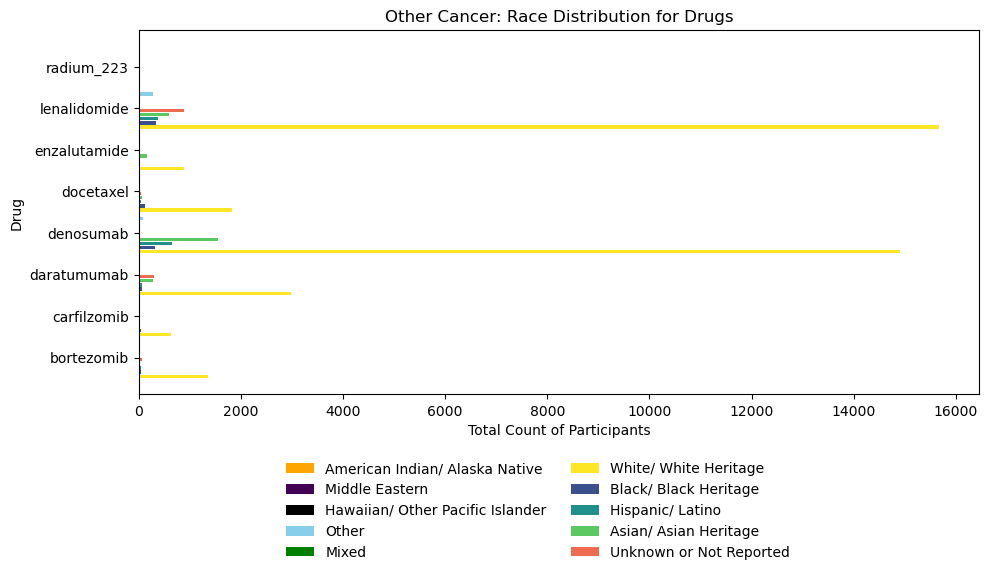

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Total Count of Participants')

Text(0, 0.5, 'Drug')

Text(0.5, 1.0, 'myeloma Cancer: Race Distribution for Drugs')

[Text(0, 0, 'bortezomib'),
 Text(0, 1, 'carfilzomib'),
 Text(0, 2, 'daratumumab'),
 Text(0, 3, 'lenalidomide')]

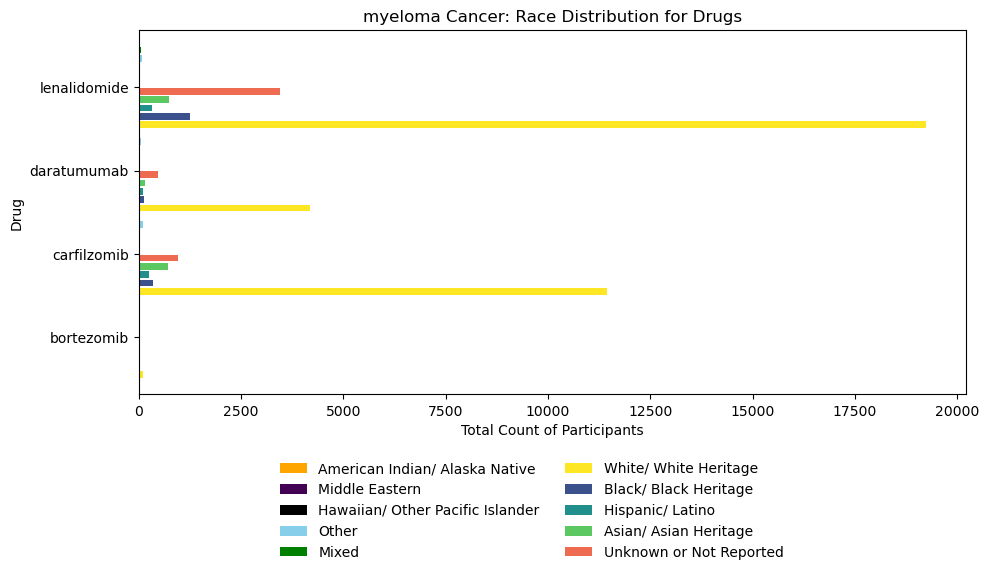

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

Text(0.5, 0, 'Total Count of Participants')

Text(0, 0.5, 'Drug')

Text(0.5, 1.0, 'prostate Cancer: Race Distribution for Drugs')

[Text(0, 0, 'bortezomib'),
 Text(0, 1, 'carfilzomib'),
 Text(0, 2, 'degarelix'),
 Text(0, 3, 'docetaxel'),
 Text(0, 4, 'enzalutamide'),
 Text(0, 5, 'lenalidomide'),
 Text(0, 6, 'radium_223')]

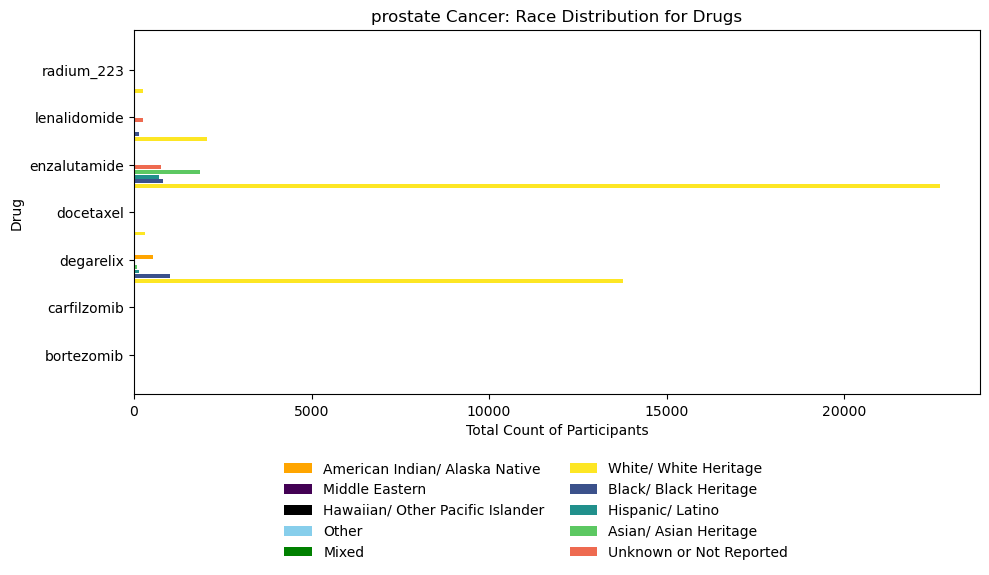

In [283]:
# Define the race group colors and order
race_colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', '#EE6A50', 'orange', '#430154', 'black', 'skyblue', 'green']
race_order = ['White/ White Heritage', 'Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage',
              'Unknown or Not Reported', 'American Indian/ Alaska Native', 'Middle Eastern',
              'Hawaiian/ Other Pacific Islander', 'Other', 'Mixed']

# Plot side-by-side horizontal bar charts for each cancer type
cancer_types = race_cancer_groups['cancer'].unique()
num_race_groups = len(race_order)
bar_width = 0.08
spacing = 0.02

for cancer_type in cancer_types:
    fig, ax = plt.subplots(figsize=(10, 6))
    cancer_df = race_cancer_groups[race_cancer_groups['cancer'] == cancer_type]
    drugs = cancer_df['drug']
    
    # Calculate the center position for each group of bars
    center_positions = np.arange(len(drugs))
    bar_positions = [
        center_positions - ((num_race_groups - 1) / 2) * (bar_width + spacing) + i * (bar_width + spacing)
        for i in range(num_race_groups)
    ]
    
    # Plot the bars for each race group
    for i, race_group in enumerate(race_order):
        values = cancer_df[race_group]
        ax.barh(bar_positions[i], values, height=bar_width, color=race_colors[i], label=race_group)
    
    ax.set_xlabel('Total Count of Participants')
    ax.set_ylabel('Drug')
    ax.set_title(f'{cancer_type} Cancer: Race Distribution for Drugs')
    ax.set_yticks(center_positions)
    ax.set_yticklabels(drugs)
    
    # Place the legend below the chart with 2 columns and 5 rows
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, mode='expand', frameon=False)
    
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(r'/project/approved_drugs_charts_data/'f'{cancer_type}_race_distribution.png')
    
    plt.show()

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

Text(0.5, 0, 'Total Count of Participants')

Text(0, 0.5, 'Drug')

Text(0.5, 1.0, 'Other Cancer: Race Distribution for Drugs')

[Text(0, 0, 'bortezomib'),
 Text(0, 1, 'carfilzomib'),
 Text(0, 2, 'daratumumab'),
 Text(0, 3, 'denosumab'),
 Text(0, 4, 'docetaxel'),
 Text(0, 5, 'enzalutamide'),
 Text(0, 6, 'lenalidomide'),
 Text(0, 7, 'radium_223')]

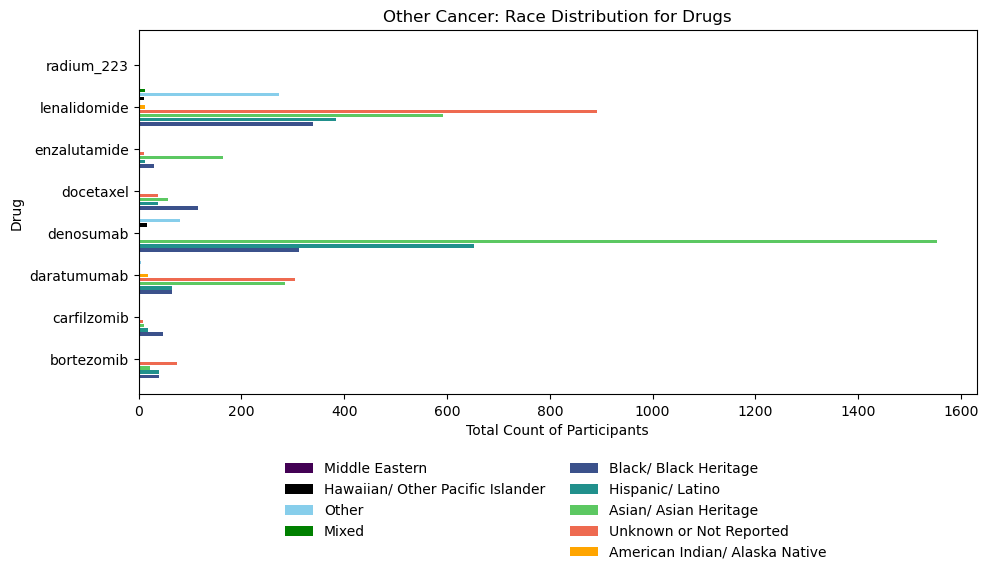

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Total Count of Participants')

Text(0, 0.5, 'Drug')

Text(0.5, 1.0, 'myeloma Cancer: Race Distribution for Drugs')

[Text(0, 0, 'bortezomib'),
 Text(0, 1, 'carfilzomib'),
 Text(0, 2, 'daratumumab'),
 Text(0, 3, 'lenalidomide')]

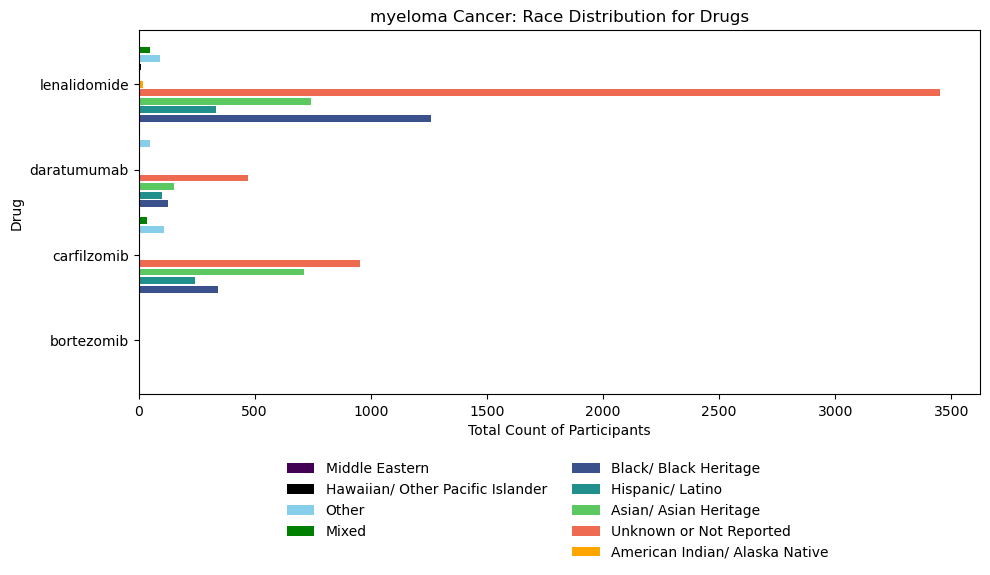

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

Text(0.5, 0, 'Total Count of Participants')

Text(0, 0.5, 'Drug')

Text(0.5, 1.0, 'prostate Cancer: Race Distribution for Drugs')

[Text(0, 0, 'bortezomib'),
 Text(0, 1, 'carfilzomib'),
 Text(0, 2, 'degarelix'),
 Text(0, 3, 'docetaxel'),
 Text(0, 4, 'enzalutamide'),
 Text(0, 5, 'lenalidomide'),
 Text(0, 6, 'radium_223')]

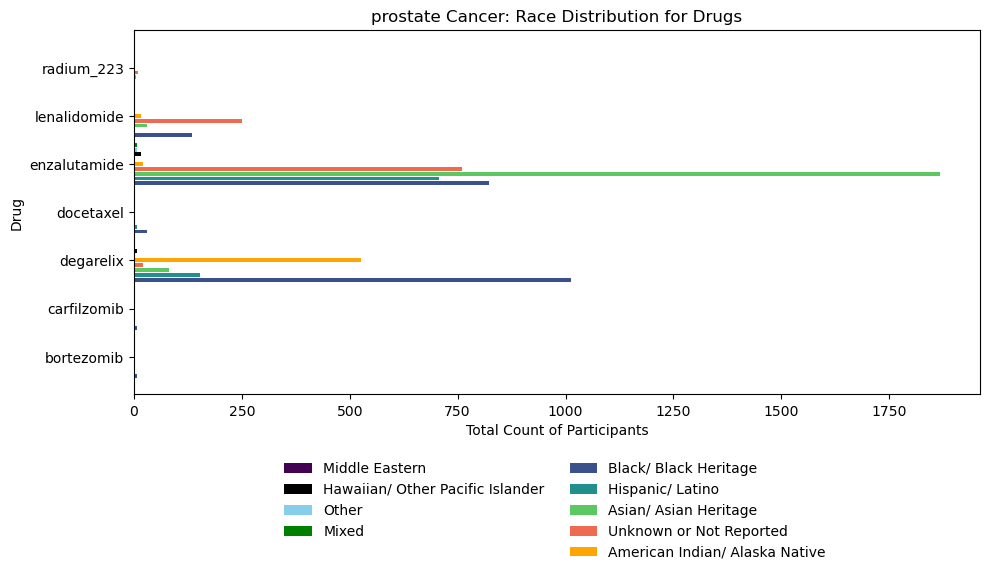

In [284]:
# Define the race group colors and order (excluding "White/ White Heritage")
race_colors = ['#3b518b', '#21908c', '#5cc862', '#EE6A50', 'orange', '#430154', 'black', 'skyblue', 'green']
race_order = ['Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage',
              'Unknown or Not Reported', 'American Indian/ Alaska Native', 'Middle Eastern',
              'Hawaiian/ Other Pacific Islander', 'Other', 'Mixed']

# Plot side-by-side horizontal bar charts for each cancer type
cancer_types = race_cancer_groups['cancer'].unique()
num_race_groups = len(race_order)
bar_width = 0.08
spacing = 0.02

for cancer_type in cancer_types:
    fig, ax = plt.subplots(figsize=(10, 6))
    cancer_df = race_cancer_groups[race_cancer_groups['cancer'] == cancer_type]
    drugs = cancer_df['drug']
    
    # Calculate the center position for each group of bars
    center_positions = np.arange(len(drugs))
    bar_positions = [
        center_positions - ((num_race_groups - 1) / 2) * (bar_width + spacing) + i * (bar_width + spacing)
        for i in range(num_race_groups)
    ]
    
    # Plot the bars for each race group (excluding "White/ White Heritage")
    for i, race_group in enumerate(race_order):
        values = cancer_df[race_group]
        ax.barh(bar_positions[i], values, height=bar_width, color=race_colors[i], label=race_group)
    
    ax.set_xlabel('Total Count of Participants')
    ax.set_ylabel('Drug')
    ax.set_title(f'{cancer_type} Cancer: Race Distribution for Drugs')
    ax.set_yticks(center_positions)
    ax.set_yticklabels(drugs)
    
    # Place the legend below the chart with 2 columns and 5 rows
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, mode='expand', frameon=False)
    
    plt.tight_layout()
    plt.show()

In [285]:
black_year_cancer = race_columns_drugs.groupby(['cancer','year']).sum()

/tmp/ipykernel_268/3418553897.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  black_year_cancer = race_columns_drugs.groupby(['cancer','year']).sum()


In [286]:
black_year_cancer.head()

American Indian/ Alaska Native  Asian/ Asian Heritage  \
cancer year                                                          
Other  2002                             0.0                   10.0   
       2003                             1.0                  105.0   
       2004                             0.0                    3.0   
       2005                             0.0                   46.0   
       2006                             2.0                   38.0   

             Black/ Black Heritage  Hawaiian/ Other Pacific Islander  \
cancer year                                                            
Other  2002                    6.0                               0.0   
       2003                   50.0                               0.0   
       2004                   17.0                               0.0   
       2005                   63.0                               0.0   
       2006                   36.0                               4.0   

             Hispanic/ Latino  Middle Eastern  Mixed  Other  \
cancer year                                                   
Other  2002               0.0             0.0    0.0    0.0   
       2003               1.0             0.0    0.0    0.0   
       2004              13.0             0.0    0.0    0.0   
       2005              31.0             0.0    0.0    0.0   
       2006              42.0             0.0    0.0    0.0   

             Unknown or Not Reported  White/ White Heritage  
cancer year                                                  
Other  2002                      2.0                  182.0  
       2003                      8.0                  930.0  
       2004                      6.0                  230.0  
       2005                     40.0                 1088.0  
       2006                     75.0                 7983.0

In [287]:
# Calculate the total for each row
black_year_cancer['total participants'] = black_year_cancer.sum(axis=1)

In [288]:
black_year_cancer.to_csv('/project/approved_drugs_charts_data/black_prostate_myeloma_count.csv')

In [289]:
# Calculate the ratio for each race/ethnic group
black_year_cancer_ratio = black_year_cancer.div(black_year_cancer['total participants'], axis=0)

# Drop the 'total participants' column
black_year_cancer_ratio.drop('total participants', axis=1, inplace=True)

# Multiply each value by 100
black_year_cancer_ratio = black_year_cancer_ratio.multiply(100)

# Round the values to 2 decimal places
black_year_cancer_ratio = black_year_cancer_ratio.round(2)

black_year_cancer_ratio.reset_index(inplace=True)
black_year_cancer_ratio.head()

,cancer,year,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage
0,Other,2002,0.00,5.00,3.00,0.00,0.00,0.0,0.0,0.0,1.00,91.00
1,Other,2003,0.09,9.59,4.57,0.00,0.09,0.0,0.0,0.0,0.73,84.93
2,Other,2004,0.00,1.12,6.32,0.00,4.83,0.0,0.0,0.0,2.23,85.50
3,Other,2005,0.00,3.63,4.97,0.00,2.44,0.0,0.0,0.0,3.15,85.80
4,Other,2006,0.02,0.46,0.44,0.05,0.51,0.0,0.0,0.0,0.92,97.59


Text(0.5, 1.0, 'Other: Black/ Black Heritage Ratio Over the Years')

Text(0, 0.5, 'Black/ Black Heritage Ratio')

(2002.0, 2019.0)

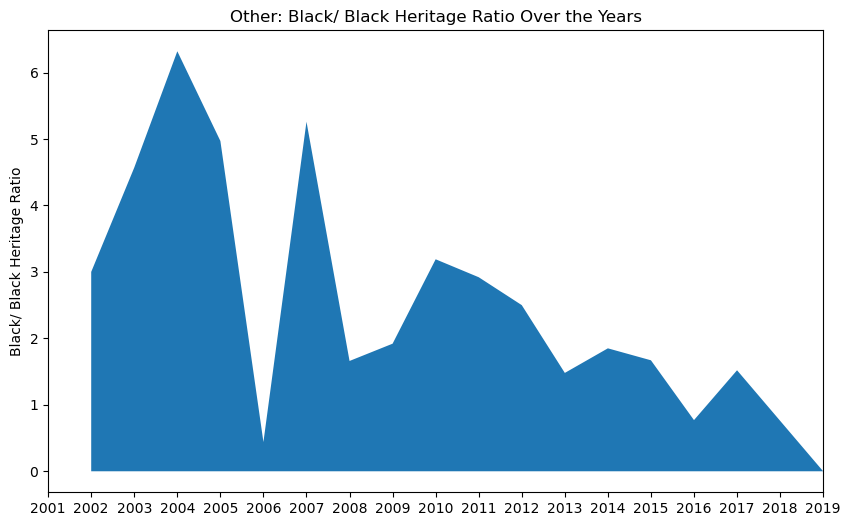

Text(0.5, 1.0, 'myeloma: Black/ Black Heritage Ratio Over the Years')

Text(0, 0.5, 'Black/ Black Heritage Ratio')

(2005.0, 2018.0)

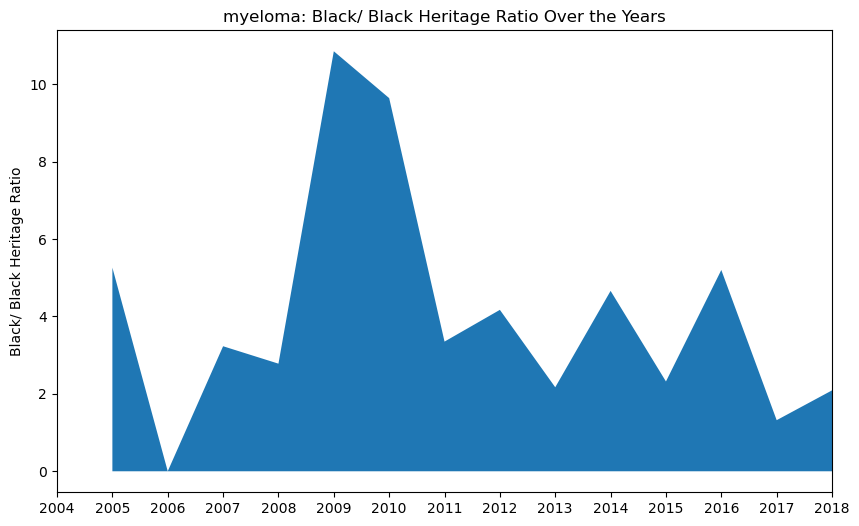

Text(0.5, 1.0, 'prostate: Black/ Black Heritage Ratio Over the Years')

Text(0, 0.5, 'Black/ Black Heritage Ratio')

(2003.0, 2019.0)

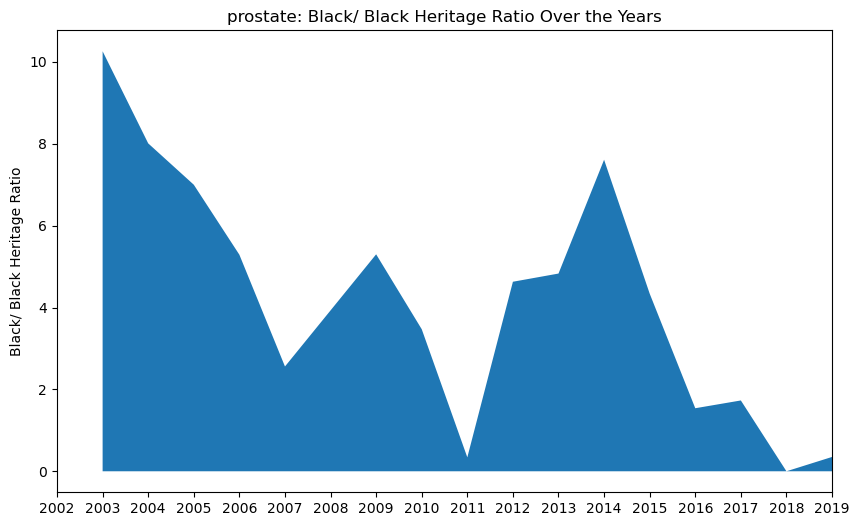

In [290]:
# Set the "year" column as the index
black_year_cancer_ratio.set_index('year', inplace=True)

# Get the unique list of cancers
cancers = black_year_cancer_ratio['cancer'].unique()

# Plot separate area graphs for each cancer
for cancer in cancers:
    fig, ax = plt.subplots(figsize=(10, 6))
    data = black_year_cancer_ratio[black_year_cancer_ratio['cancer'] == cancer]
    ax.fill_between(data.index, data['Black/ Black Heritage'])
    ax.set_title(f'{cancer}: Black/ Black Heritage Ratio Over the Years')
    ax.set_ylabel('Black/ Black Heritage Ratio')
    
    # Set x-axis limits and ticks based on the data for the specific cancer
    min_year = data.index.min()
    max_year = data.index.max()
    ax.set_xlim(min_year, max_year)
    ax.set_xticks(np.arange(min_year-1, max_year+1))
    
    # Save the figure
    plt.savefig(r'/project/approved_drugs_charts_data/'f'black_heritage_ratio_{cancer}.png')
    
    plt.show()

In [291]:
race_cancer_2 = race_cancer_groups.groupby(['cancer']).sum()

/tmp/ipykernel_268/1357259274.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  race_cancer_2 = race_cancer_groups.groupby(['cancer']).sum()


In [292]:
race_cancer_2.drop(['year'],axis=1,inplace=True)

In [293]:
# Calculate the total for each row
race_cancer_2['total participants'] = race_cancer_2.sum(axis=1)

In [294]:
race_cancer_2

,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,total participants
cancer,,,,,,,,,,,
Other,35.0,2686.0,947.0,34.0,1208.0,0.0,15.0,362.0,1329.0,38267.0,44883.0
myeloma,25.0,1611.0,1727.0,20.0,680.0,0.0,82.0,253.0,4881.0,34983.0,44262.0
prostate,563.0,1981.0,2014.0,26.0,871.0,2.0,9.0,7.0,1042.0,39169.0,45684.0


In [295]:
# Calculate the ratio for each race/ethnic group
race_cancer_2_ratio = race_cancer_2.div(race_cancer_2['total participants'], axis=0)

# Drop the 'total participants' column
race_cancer_2_ratio.drop('total participants', axis=1, inplace=True)

# Multiply each value by 100
race_cancer_2_ratio = race_cancer_2_ratio.multiply(100)

# Round the values to 2 decimal places
race_cancer_2_ratio = race_cancer_2_ratio.round(2)

race_cancer_2_ratio.reset_index(inplace=True)
race_cancer_2_ratio.head()

,cancer,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage
0,Other,0.08,5.98,2.11,0.08,2.69,0.0,0.03,0.81,2.96,85.26
1,myeloma,0.06,3.64,3.90,0.05,1.54,0.0,0.19,0.57,11.03,79.04
2,prostate,1.23,4.34,4.41,0.06,1.91,0.0,0.02,0.02,2.28,85.74


In [296]:
# Calculate the ratios
race_cancer_2_ratio['black_white_ratio'] = race_cancer_2_ratio['Black/ Black Heritage'] / race_cancer_2_ratio['White/ White Heritage']
race_cancer_2_ratio['asian_white_ratio'] = race_cancer_2_ratio['Asian/ Asian Heritage'] / race_cancer_2_ratio['White/ White Heritage']

In [297]:
race_cancer_2_ratio

,cancer,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,black_white_ratio,asian_white_ratio
0,Other,0.08,5.98,2.11,0.08,2.69,0.0,0.03,0.81,2.96,85.26,0.024748,0.070138
1,myeloma,0.06,3.64,3.90,0.05,1.54,0.0,0.19,0.57,11.03,79.04,0.049342,0.046053
2,prostate,1.23,4.34,4.41,0.06,1.91,0.0,0.02,0.02,2.28,85.74,0.051435,0.050618


In [298]:
race_to_white = race_cancer_2_ratio[['cancer','black_white_ratio', 'asian_white_ratio']]

In [299]:
race_to_white

,cancer,black_white_ratio,asian_white_ratio
0,Other,0.024748,0.070138
1,myeloma,0.049342,0.046053
2,prostate,0.051435,0.050618


In [300]:
# Rename the columns
race_to_white.rename(columns={'black_white_ratio': 'black_trials', 'asian_white_ratio': 'asian_trials'}, inplace=True)

/tmp/ipykernel_268/2137843853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_to_white.rename(columns={'black_white_ratio': 'black_trials', 'asian_white_ratio': 'asian_trials'}, inplace=True)


In [301]:
# Drop the row with the "Other" cancer type
race_to_white = race_to_white[race_to_white['cancer'] != 'Other']

In [302]:
# Define the values for black_cancer and asian_cancer
black_cancer_values = {'prostate': 2.10, 'myeloma': 2.80}
asian_cancer_values = {'prostate': 0.54, 'myeloma': 0.92}

# Add the black_cancer and asian_cancer columns
race_to_white['black_cancer'] = race_to_white['cancer'].map(black_cancer_values)
race_to_white['asian_cancer'] = race_to_white['cancer'].map(asian_cancer_values)

/tmp/ipykernel_268/2672048182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_to_white['black_cancer'] = race_to_white['cancer'].map(black_cancer_values)
/tmp/ipykernel_268/2672048182.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_to_white['asian_cancer'] = race_to_white['cancer'].map(asian_cancer_values)


In [303]:
race_to_white

,cancer,black_trials,asian_trials,black_cancer,asian_cancer
1,myeloma,0.049342,0.046053,2.8,0.92
2,prostate,0.051435,0.050618,2.1,0.54


In [304]:
# Create the dataframe
myeloma_ratios = pd.DataFrame({
    'race': ['black', 'asian'],
    'trials': [0.049342, 0.046053],
    'diagnosed': [2.8, 0.92]
})

# Create the dataframe
prostate_ratios = pd.DataFrame({
    'race': ['black', 'asian'],
    'trials': [0.051435, 0.050618],
    'diagnosed': [2.1, 0.54]
})

[Text(0, 0.0, 'asian'), Text(0, 0.3, 'black')]

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')]

Text(0.5, 0, 'Ratio')

Text(0, 0.5, 'Race')

Text(0.5, 1.0, 'Myeloma Ratios')

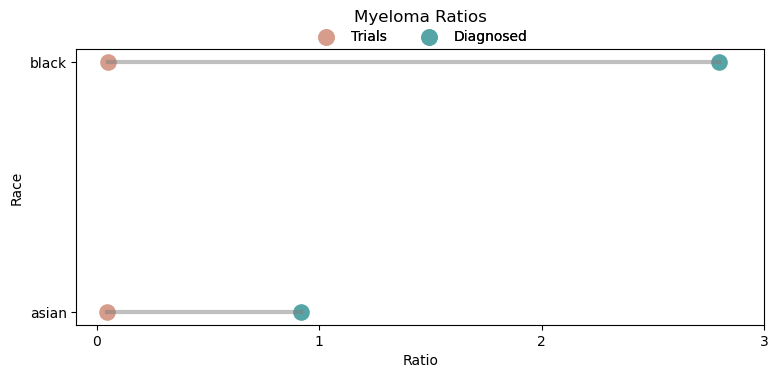

In [305]:
# Reverse the order of rows to match the desired y-axis order
myeloma_ratios = myeloma_ratios.iloc[::-1]

# Extract the race categories
categories = myeloma_ratios['race']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Define the positions for each category
positions = [0, 0.3]

# Plot the "trials" and "diagnosed" values for each category with larger dots
ax.scatter(myeloma_ratios['trials'], positions, color='#d69c8c', label='Trials', s=120)
ax.scatter(myeloma_ratios['diagnosed'], positions, color='#55a4a6', label='Diagnosed', s=120)

# Connect the dots with a faded grey line for each category
for category, pos in zip(categories, positions):
    ax.plot([myeloma_ratios.loc[myeloma_ratios['race'] == category, 'trials'].values[0],
             myeloma_ratios.loc[myeloma_ratios['race'] == category, 'diagnosed'].values[0]],
            [pos, pos], color='grey', alpha=0.5, linewidth=3)

# Set the y-axis ticks and labels
ax.set_yticks(positions)
ax.set_yticklabels(categories)

# Set the x-axis ticks and labels
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([0, 1, 2, 3])

# Set the axis labels and title
ax.set_xlabel('Ratio')
ax.set_ylabel('Race')
ax.set_title('Myeloma Ratios', pad=20)

# Move the legend between the title and the plot
legend = ax.legend(['Trials', 'Diagnosed'], loc='upper center', bbox_to_anchor=(0.5, 1.117), ncol=2, frameon=False)
ax.add_artist(legend)

# Adjust the layout and margins
plt.tight_layout(pad=1.5)

# Save the chart as an image file
plt.savefig('/project/approved_drugs_charts_data/charts_myeloma_ratios_dot_plot.png', dpi=300)

# Display the plot
plt.show()


[Text(0, 0.0, 'asian'), Text(0, 0.3, 'black')]

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')]

Text(0.5, 0, 'Ratio')

Text(0, 0.5, 'Race')

Text(0.5, 1.0, 'Prostate Ratios')

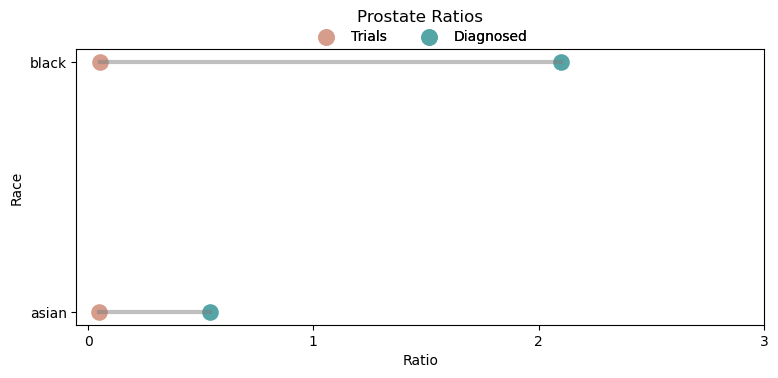

In [306]:
# Reverse the order of rows to match the desired y-axis order
prostate_ratios = prostate_ratios.iloc[::-1]

# Extract the race categories
categories = prostate_ratios['race']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Define the positions for each category
positions = [0, 0.3]

# Plot the "trials" and "diagnosed" values for each category with larger dots
ax.scatter(prostate_ratios['trials'], positions, color='#d69c8c', label='Trials', s=120)
ax.scatter(prostate_ratios['diagnosed'], positions, color='#55a4a6', label='Diagnosed', s=120)

# Connect the dots with a faded grey line for each category
for category, pos in zip(categories, positions):
    ax.plot([prostate_ratios.loc[prostate_ratios['race'] == category, 'trials'].values[0],
             prostate_ratios.loc[prostate_ratios['race'] == category, 'diagnosed'].values[0]],
            [pos, pos], color='grey', alpha=0.5, linewidth=3)

# Set the y-axis ticks and labels
ax.set_yticks(positions)
ax.set_yticklabels(categories)

# Set the x-axis ticks and labels
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([0, 1, 2, 3])

# Set the axis labels and title
ax.set_xlabel('Ratio')
ax.set_ylabel('Race')
ax.set_title('Prostate Ratios', pad=20)

# Move the legend between the title and the plot
legend = ax.legend(['Trials', 'Diagnosed'], loc='upper center', bbox_to_anchor=(0.5, 1.117), ncol=2, frameon=False)
ax.add_artist(legend)

# Adjust the layout and margins
plt.tight_layout(pad=1.5)

# Save the chart as an image file
plt.savefig('/project/approved_drugs_charts_data/charts_prostate_ratios_dot_plot.png', dpi=300)

# Display the plot
plt.show()


In [307]:
race_drugs_cancer =  race_columns_drugs.groupby(['cancer','drug']).sum()

/tmp/ipykernel_268/157122580.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  race_drugs_cancer =  race_columns_drugs.groupby(['cancer','drug']).sum()


In [308]:
race_drugs_cancer.reset_index(inplace=True)

In [309]:
# List of columns to sum
ethnic_group_columns = [
    'American Indian/ Alaska Native',
    'Asian/ Asian Heritage',
    'Hawaiian/ Other Pacific Islander',
    'Hispanic/ Latino',
    'Middle Eastern',
    'Mixed',
    'Other',
    'Unknown or Not Reported'
]

# Sum the ethnic group columns along axis=1 to get the total for each row
race_drugs_cancer['Remaining Ethnic Groups'] = race_drugs_cancer[ethnic_group_columns].sum(axis=1)

In [310]:
race_drugs_cancer.head()

,cancer,drug,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,year,Remaining Ethnic Groups
0,Other,bortezomib,2.0,23.0,40.0,2.0,39.0,0.0,0.0,0.0,74.0,1351.0,26070,140.0
1,Other,carfilzomib,0.0,10.0,47.0,1.0,19.0,0.0,0.0,2.0,9.0,632.0,24168,41.0
2,Other,daratumumab,18.0,285.0,64.0,2.0,64.0,0.0,2.0,4.0,304.0,2984.0,18148,679.0
3,Other,denosumab,2.0,1553.0,312.0,16.0,652.0,0.0,0.0,80.0,3.0,14910.0,14058,2306.0
4,Other,docetaxel,1.0,58.0,115.0,0.0,37.0,0.0,0.0,0.0,38.0,1822.0,30058,134.0


In [311]:
race_drugs_cancer.to_csv('/project/approved_drugs_charts_data/race_drugs_cancer.csv')

The above data is to be used to create a chart for the website.

In [312]:
race_drugs_groups = race_columns_drugs.groupby('drug').sum()

/tmp/ipykernel_268/2458795950.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  race_drugs_groups = race_columns_drugs.groupby('drug').sum()


In [313]:
race_drugs_groups.reset_index(inplace=True)

In [314]:
race_drugs_groups.drop(['year'], axis=1, inplace=True)

In [315]:
race_drugs_groups.head()

,drug,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage
0,bortezomib,2.0,26.0,50.0,2.0,43.0,0.0,0.0,0.0,79.0,1509.0
1,carfilzomib,7.0,723.0,393.0,7.0,261.0,0.0,35.0,112.0,961.0,12085.0
2,daratumumab,18.0,437.0,189.0,4.0,165.0,0.0,2.0,54.0,777.0,7175.0
3,degarelix,526.0,80.0,1013.0,8.0,152.0,0.0,0.0,0.0,20.0,13787.0
4,denosumab,2.0,1553.0,312.0,16.0,652.0,0.0,0.0,80.0,3.0,14910.0


In [316]:
race_drugs_groups.to_csv('/project/approved_drugs_charts_data/cancer_black_asian_drugs_race.csv')

Text(0.5, 1.0, 'Race Distribution by Drug')

Text(0.5, 0, 'Drug')

Text(0, 0.5, 'Count')

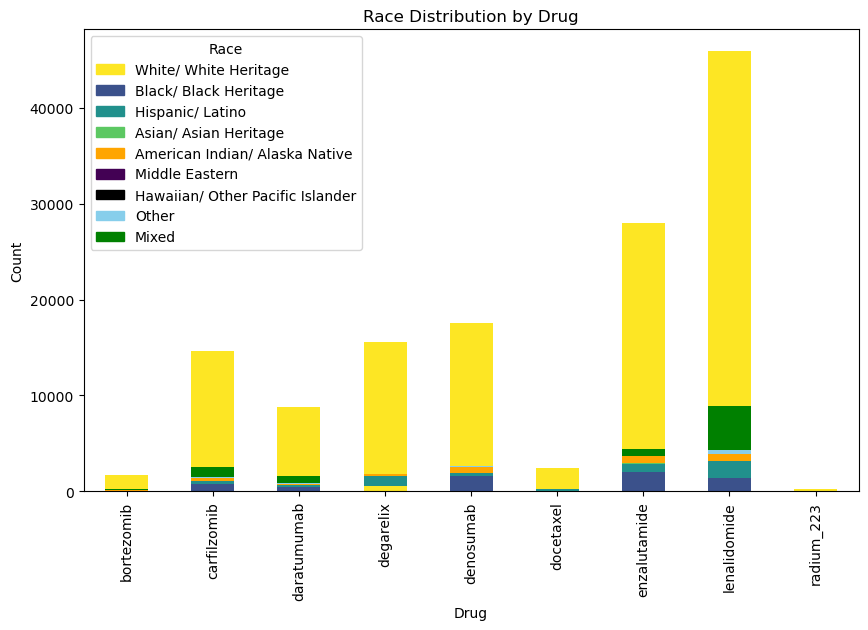

In [317]:
# Define the race group colors and order
race_colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154', 'black', 'skyblue', 'green']
race_order = ['White/ White Heritage', 'Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage',
              'American Indian/ Alaska Native', 'Middle Eastern', 'Hawaiian/ Other Pacific Islander',
              'Other', 'Mixed', 'Unknown or Not Reported']

# Set the drug column as the index
race_drugs_groups.set_index('drug', inplace=True)

# Plot the stacked bar chart with custom colors
ax = race_drugs_groups.plot(kind='bar', stacked=True, figsize=(10, 6), color=race_colors)

# Set the title and labels
plt.title('Race Distribution by Drug')
plt.xlabel('Drug')
plt.ylabel('Count')

# Display the legend with custom race labels and colors
legend_labels = [race_order[i] for i in range(len(race_order)) if race_order[i] in race_drugs_groups.columns]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=race_colors[i]) for i in range(len(race_colors)) if race_order[i] in race_drugs_groups.columns]
plt.legend(legend_handles, legend_labels, title='Race')

# Save the chart as an image file
plt.savefig('/project/approved_drugs_charts_data//all_races_matched_drugs.png', dpi=300)

# Show the plot
plt.show()


<Figure size 800x600 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Representation Comparison: Black/Black, Asian/Asian, and White/White')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Race Category')

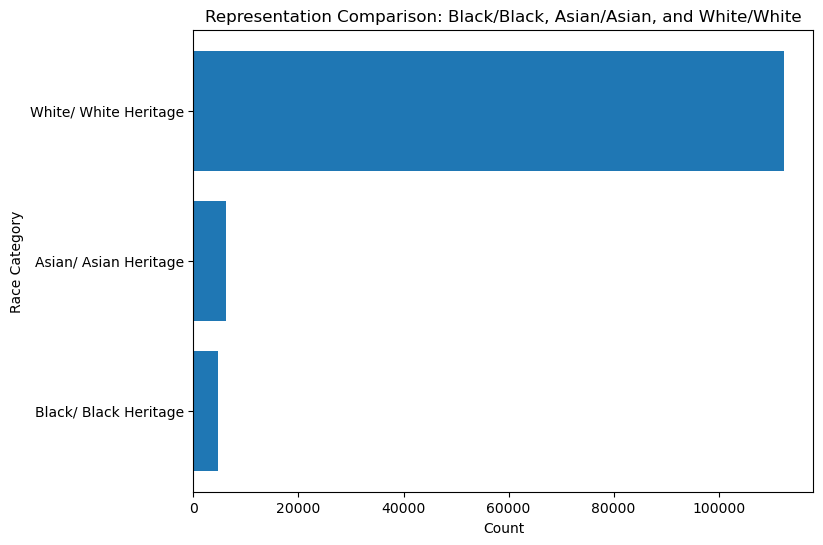

In [319]:
# Define the race categories to compare
race_categories = ['Black/ Black Heritage', 'Asian/ Asian Heritage', 'White/ White Heritage']

# Subset the data for the specified race categories
subset_data = race_drugs_groups[race_categories]

# Calculate the total count for each race category
total_counts = subset_data.sum()

# Create the horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(race_categories, total_counts)

# Set the title and labels
plt.title('Representation Comparison: Black/Black, Asian/Asian, and White/White')
plt.xlabel('Count')
plt.ylabel('Race Category')

# Save the chart as an image file
plt.savefig('/project/approved_drugs_charts_data/comparison_black_asian_white.png', dpi=300)

# Show the plot
plt.show()

In [320]:
race_drugs_groups

,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage
drug,,,,,,,,,,
bortezomib,2.0,26.0,50.0,2.0,43.0,0.0,0.0,0.0,79.0,1509.0
carfilzomib,7.0,723.0,393.0,7.0,261.0,0.0,35.0,112.0,961.0,12085.0
daratumumab,18.0,437.0,189.0,4.0,165.0,0.0,2.0,54.0,777.0,7175.0
degarelix,526.0,80.0,1013.0,8.0,152.0,0.0,0.0,0.0,20.0,13787.0
denosumab,2.0,1553.0,312.0,16.0,652.0,0.0,0.0,80.0,3.0,14910.0
docetaxel,1.0,58.0,145.0,0.0,45.0,0.0,0.0,0.0,40.0,2131.0
enzalutamide,21.0,2031.0,852.0,19.0,719.0,2.0,8.0,10.0,770.0,23589.0
lenalidomide,46.0,1365.0,1731.0,24.0,719.0,0.0,60.0,366.0,4593.0,36981.0
radium_223,0.0,5.0,3.0,0.0,3.0,0.0,1.0,0.0,9.0,252.0


In [321]:
# Calculate the total for each row
race_drugs_groups['total participants'] = race_drugs_groups.sum(axis=1)

In [322]:
# Calculate the ratio for each race/ethnic group
race_drugs_groups_ratio = race_drugs_groups.div(race_drugs_groups['total participants'], axis=0)

# Drop the 'total participants' column
race_drugs_groups_ratio.drop('total participants', axis=1, inplace=True)

# Multiply each value by 100
race_drugs_groups_ratio = race_drugs_groups_ratio.multiply(100)

# Round the values to 2 decimal places
race_drugs_groups_ratio = race_drugs_groups_ratio.round(2)

race_drugs_groups_ratio

,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage
drug,,,,,,,,,,
bortezomib,0.12,1.52,2.92,0.12,2.51,0.00,0.00,0.00,4.62,88.19
carfilzomib,0.05,4.96,2.69,0.05,1.79,0.00,0.24,0.77,6.59,82.86
daratumumab,0.20,4.95,2.14,0.05,1.87,0.00,0.02,0.61,8.81,81.34
degarelix,3.37,0.51,6.50,0.05,0.98,0.00,0.00,0.00,0.13,88.46
denosumab,0.01,8.86,1.78,0.09,3.72,0.00,0.00,0.46,0.02,85.06
docetaxel,0.04,2.40,5.99,0.00,1.86,0.00,0.00,0.00,1.65,88.06
enzalutamide,0.07,7.25,3.04,0.07,2.57,0.01,0.03,0.04,2.75,84.18
lenalidomide,0.10,2.97,3.77,0.05,1.57,0.00,0.13,0.80,10.01,80.59
radium_223,0.00,1.83,1.10,0.00,1.10,0.00,0.37,0.00,3.30,92.31


<Figure size 1000x600 with 0 Axes>

<AxesSubplot:ylabel='drug'>

Text(0.5, 1.0, 'Race/Ethnicity Distribution')

Text(0.5, 0, 'Ratio (%)')

Text(0, 0.5, 'Drug')

<Figure size 1000x600 with 0 Axes>

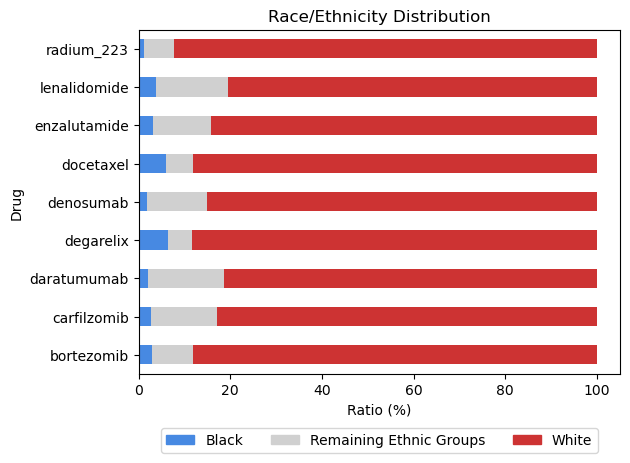

In [323]:
# Define the colors for each race/ethnicity
colors = ['#4789e2', '#d0d0d0', '#d0d0d0', '#d0d0d0', '#d0d0d0', '#d0d0d0', '#d0d0d0', '#d0d0d0', '#d0d0d0', '#CD3333']

# Reorder the columns in the DataFrame to have black and asian first and white last
race_order = ['Black/ Black Heritage', 'Asian/ Asian Heritage', 'American Indian/ Alaska Native',
              'Hawaiian/ Other Pacific Islander', 'Hispanic/ Latino', 'Middle Eastern', 'Mixed', 'Other',
              'Unknown or Not Reported', 'White/ White Heritage']
race_drugs_groups_ratio_ordered = race_drugs_groups_ratio[race_order]

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
race_drugs_groups_ratio_ordered.plot.barh(stacked=True, color=colors)

# Set the title and labels
plt.title('Race/Ethnicity Distribution')
plt.xlabel('Ratio (%)')
plt.ylabel('Drug')

# Update the legend colors
# Update the legend colors
legend_colors = {'Black/ Black Heritage': '#4789e2', 'Asian/ Asian Heritage': '#d0d0d0',
                 'American Indian/ Alaska Native': '#d0d0d0', 'Hawaiian/ Other Pacific Islander': '#d0d0d0',
                 'Hispanic/ Latino': '#d0d0d0', 'Middle Eastern': '#d0d0d0', 'Mixed': '#d0d0d0', 'Other': '#d0d0d0',
                 'Unknown or Not Reported': '#d0d0d0', 'White/ White Heritage': '#CD3333'}

# Create new legend handles and labels for grouping
grouped_legend_handles = []
grouped_legend_labels = []

# Group "Black/ Black Heritage" and "Asian/ Asian Heritage" as "Black and Asian"
grouped_legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=legend_colors['Black/ Black Heritage']))
grouped_legend_labels.append('Black')

# Group "Other" labels together
grouped_legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=legend_colors['Other']))
grouped_legend_labels.append('Remaining Ethnic Groups')

# Group "White/ White Heritage" as "White"
grouped_legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=legend_colors['White/ White Heritage']))
grouped_legend_labels.append('White')

# Show the updated legend
plt.legend(grouped_legend_handles, grouped_legend_labels, loc='lower center',  bbox_to_anchor=(0.5, -0.25), ncol=3)

# Adjust the layout to prevent cutoff
plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/approved_drugs_charts_data/100_hbar_comparison_black_asian_white.png', dpi=300)

# Show the plot
plt.show()